# Example `R` notebook to run the data

In an ideal world, I would have preferred to do everything through python but that's probably not possible. So here is an example notebook on how to run the analysis through R.

### load up the necessary packages

In [1]:
library(Seurat)
library(tidyverse)
library(reticulate)

Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Check python configurations.

We are using the `scanpy` modules to do PCA, construct neighborhood graph (through bbknn), leiden clustering and UMAP. For all these, we will use `reticulate` to wrap the functions.

Check that the python paths are set up correctly. In this case, I'm pointing it to my conda virtual environment called `mypython3`. The path to the python is thus `/home/jovyan/my-conda-envs/mypython3/bin/python`.

In [2]:
Sys.setenv(RETICULATE_PYTHON = '/Users/matthewcoates/opt/anaconda3/envs/naspython/bin/python')

In [3]:
reticulate::use_condaenv('naspython')

In [2]:
reticulate::py_config()

python:         /Users/matthewcoates/opt/anaconda3/envs/naspython/bin/python
libpython:      /Users/matthewcoates/opt/anaconda3/envs/naspython/lib/libpython3.8.dylib
pythonhome:     /Users/matthewcoates/opt/anaconda3/envs/naspython:/Users/matthewcoates/opt/anaconda3/envs/naspython
version:        3.8.10 (default, May 19 2021, 11:01:55)  [Clang 10.0.0 ]
numpy:          /Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/numpy
numpy_version:  1.20.3
leidenalg:      /Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/leidenalg

NOTE: Python version was forced by RETICULATE_PYTHON

In [2]:
theme_set(
    theme_classic(base_size = 18)
)

In [2]:
setwd = '/home/jovyan/data/ClatCov/'

To simplify matters, I added `Sys.setenv(RETICULATE_PYTHON = '/home/jovyan/my-conda-envs/mypython3/bin/python')` to my `~/.Rprofile` (a file that is automatically run everytime R is booted up). This is a requirement for working through RStudio otherwise it won't find the right python.

### Read in data (already saved as Seurat object)

In [3]:
data <- readRDS('/home/jovyan/data/ClatCov/COV_subsetanno1_raw_120721.rds') 
#This is data that has already been preprocessed by  me
data

An object of class Seurat 
25675 features across 292189 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [4]:
datand <- subset(data, subset = subset_annotations %in% c('B FO',
                                                          'B Naive',
                                                          'Basal epithelial',
                                                          'Basophil',
                                                          'Bmem non-switched',
                                                          'Bmem switched',
                                                          'CD4 Act',
                                                          'CD4 Tcm',
                                                          'CD4 Tem',
                                                          'CD4 Th2',
                                                          'CD4 Th17',
                                                          'CD4 Tn',
                                                          'CD4 Trm',
                                                          'CD8 CTL',
                                                          'CD8 Tn',
                                                          'CD8 Trm',
                                                          'Ciliated epithelial',
                                                          'Endothelial-Stromal',
                                                          'Erythrocyte',
                                                          'Follicular DC',
                                                          'ILC',
                                                          'Ionocyte',
                                                          'MAIT',
                                                          'Macrophage non-resident',
                                                          'Macrophage resident',
                                                          'Mast',
                                                          'Megakaryocyte',
                                                          'Monocyte classical',
                                                          'Monocyte non-classical',
                                                          'NK CD16+',
                                                          'NK CD56+',
                                                          'Plasma',
                                                          'Plasmablast IgM+',
                                                          'Secretory epithelial',
                                                          'Squamous epithelial',
                                                          'Tfh',
                                                          'Treg',
                                                          'aNK KLRC2+',
                                                          'cDC CD1c+',
                                                          'cDC CD141+',
                                                          'gdT vd1',
                                                          'gdT vd2',
                                                          'gdT vd3',
                                                          'pDC'))
datand

An object of class Seurat 
25675 features across 267844 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [5]:
datand

An object of class Seurat 
25675 features across 267844 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [10]:
datand@meta.data

latent_RT_efficiency latent_cell_probability
CGCTTCACAAGAAGAG-1-0-0 9.639492             1.0000000              
GGACATTCATAGACTC-1-0-0 5.833257             1.0000000              
GCACATAGTAAGGATT-1-0-0 8.461997             1.0000000              
GACGTGCTCGTAGATC-1-0-0 8.653172             1.0000000              
CTCTGGTAGTACGTAA-1-0-0 7.128809             1.0000000              
TCCCGATCAAGTAGTA-1-0-0 7.757183             1.0000000              
TATCTCACAGATTGCT-1-0-0 9.283535             1.0000000              
GATGAAAAGCGCCTCA-1-0-0 8.028753             1.0000000              
CATGACATCCAGTATG-1-0-0 7.232700             1.0000000              
AAAGTAGGTTCAGACT-1-0-0 7.210078             1.0000000              
CAGAATCTCCGATATG-1-0-0 6.187824             1.0000000              
CGGAGCTAGGAGCGAG-1-0-0 5.181709             1.0000000              
CCCTCCTAGTGAAGTT-1-0-0 5.068830             1.0000000              
ATCGAGTCACAGAGGT-1-0-0 3.604010             0.9997603              
CGGTTAATCTTACCTA-1-0-0 5.216625             1.0000000              
ACGCAGCCACGCGAAA-1-0-0 3.384279             0.9999229              
GCATGCGCAAACGCGA-1-0-0 3.560922             0.9999095              
CGATCGGGTTGGTAAA-1-0-0 3.764012             0.9999659              
GGGAATGGTATCGCAT-1-0-0 3.507053             0.9999226              
TTAACTCGTTGACGTT-1-0-0 3.403012             0.9997582              
AAGCCGCGTCATCCCT-1-0-0 3.432607             0.9998242              
GATGCTAGTCAAAGCG-1-0-0 3.476771             0.9998247              
TACTCATCACCACCAG-1-0-0 3.471695             0.9998515              
AGGCCACAGCGTAGTG-1-0-0 3.927148             0.9999892              
CTCGAGGAGGAGTCTG-1-0-0 3.381853             0.9999299              
TCAGCAAGTCCAGTTA-1-0-0 3.561635             0.9997494              
TCGGGACAGGGTTCCC-1-0-0 3.291062             0.9997742              
ACATGGTGTAAACACA-1-0-0 5.259748             1.0000000              
CCACTACCATATGGTC-1-0-0 3.464855             0.9997458              
GCATGTAGTACTTAGC-1-0-0 3.313223             0.9998412              
⋮                      ⋮                    ⋮                      
TTTGCGCCATGATCCA-1-7-1 NaN                  NaN                    
TTTGCGCGTCTGCCAG-1-7-1 NaN                  NaN                    
TTTGCGCGTTACGACT-1-7-1 NaN                  NaN                    
TTTGCGCTCGATAGAA-1-7-1 NaN                  NaN                    
TTTGCGCTCGCCTGAG-1-7-1 NaN                  NaN                    
TTTGGTTAGAGGTTAT-1-7-1 NaN                  NaN                    
TTTGGTTAGCCGATTT-1-7-1 NaN                  NaN                    
TTTGGTTAGCTAACTC-1-7-1 NaN                  NaN                    
TTTGGTTAGTGCAAGC-1-7-1 NaN                  NaN                    
TTTGGTTCAATACGCT-1-7-1 NaN                  NaN                    
TTTGGTTGTGATGTGG-1-7-1 NaN                  NaN                    
TTTGGTTTCGGGAGTA-1-7-1 NaN                  NaN                    
TTTGGTTTCTATCGCC-1-7-1 NaN                  NaN                    
TTTGTCAAGAGCTATA-1-7-1 NaN                  NaN                    
TTTGTCAAGCACCGCT-1-7-1 NaN                  NaN                    
TTTGTCAAGCTTTGGT-1-7-1 NaN                  NaN                    
TTTGTCAAGGAGTCTG-1-7-1 NaN                  NaN                    
TTTGTCAAGGTAAACT-1-7-1 NaN                  NaN                    
TTTGTCAAGTCTCAAC-1-7-1 NaN                  NaN                    
TTTGTCACAAGCGAGT-1-7-1 NaN                  NaN                    
TTTGTCACAAGGCTCC-1-7-1 NaN                  NaN                    
TTTGTCACAATGGACG-1-7-1 NaN                  NaN                    
TTTGTCACACACTGCG-1-7-1 NaN                  NaN                    
TTTGTCACATAGACTC-1-7-1 NaN                  NaN                    
TTTGTCAGTCACTGGC-1-7-1 NaN                  NaN                    
TTTGTCAGTCCTCTTG-1-7-1 NaN                  NaN                    
TTTGTCAGTCTAGGTT-1-7-1 NaN                  NaN                    
TTTGTCAGTGG

Most of the slots in this seurat object are just place holders. The only meaningful slots currently are the metadata, raw counts, normalized counts, PCA and UMAP embeddings.

### Visualise the embedding and clusters

We can use Seurat's plotting tools to visualise the embedding.

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


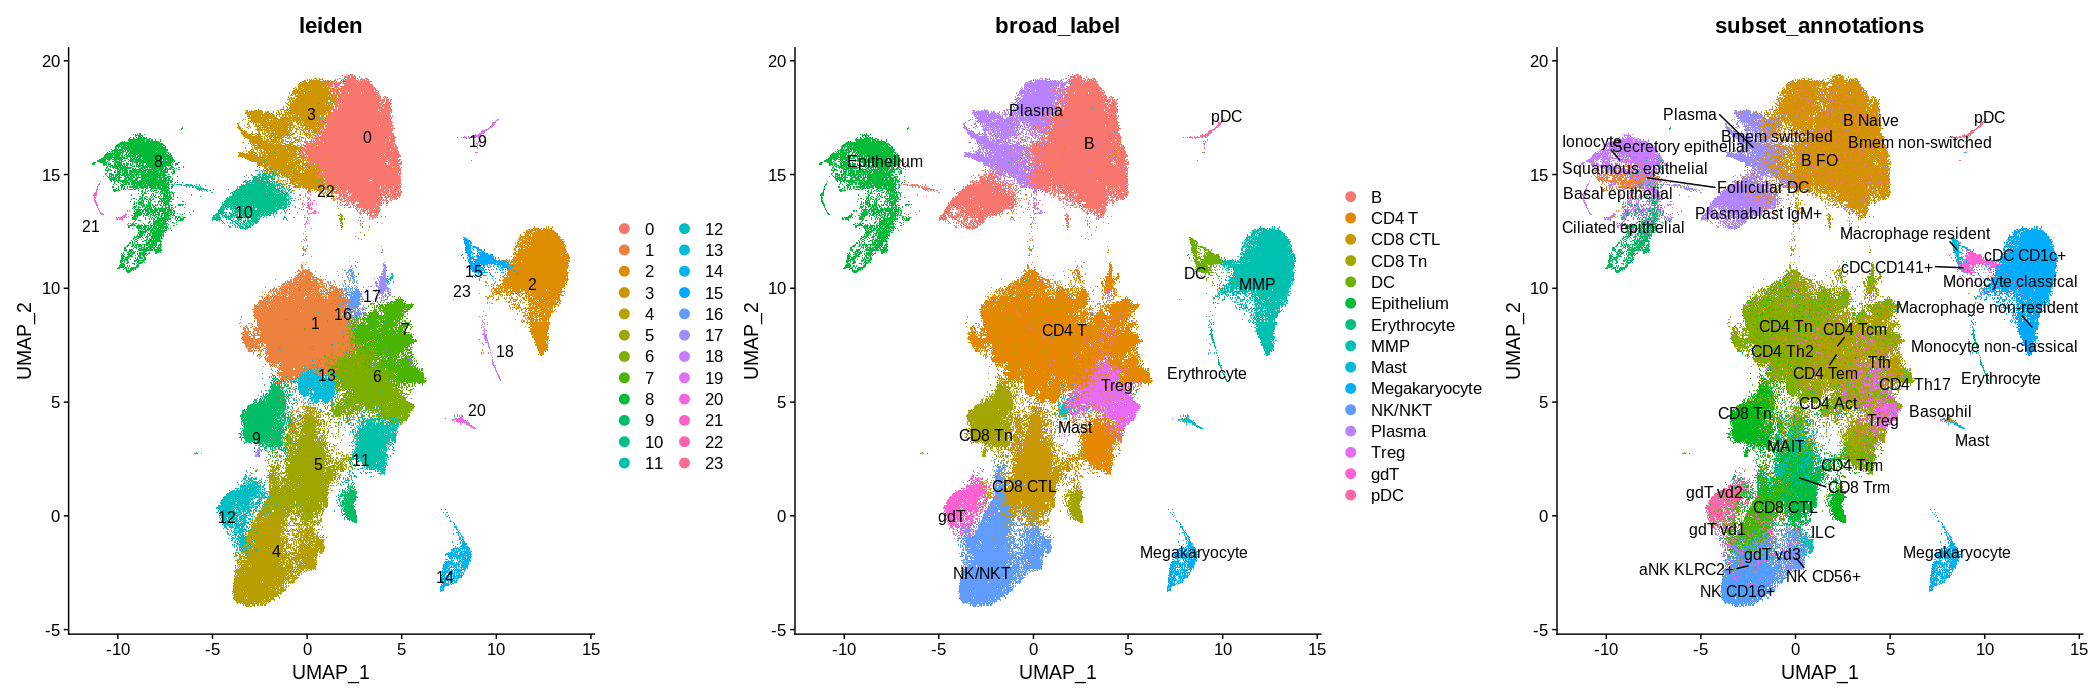

In [6]:
# use this line to adjust the plot size in the notebook
options(repr.plot.width = 21, repr.plot.height = 7, repr.plot.res = 100)
#Plot data
DimPlot(datand, group.by = c('leiden', 'broad_label', 'subset_annotations'), label = TRUE, repel =T) + NoLegend()

# Charts 

In [9]:
library(tidyverse)

In [12]:
Idents(datand) <- datand@meta.data$subset_annotations
levels(Idents(datand))

[1] "B FO"                    "B Naive"                
 [3] "Basal epithelial"        "Basophil"               
 [5] "Bmem non-switched"       "Bmem switched"          
 [7] "CD4 Act"                 "CD4 Tcm"                
 [9] "CD4 Tem"                 "CD4 Th2"                
[11] "CD4 Th17"                "CD4 Tn"                 
[13] "CD4 Trm"                 "CD8 CTL"                
[15] "CD8 Tn"                  "CD8 Trm"                
[17] "Ciliated epithelial"     "Endothelial-Stromal"    
[19] "Erythrocyte"             "Follicular DC"          
[21] "ILC"                     "Ionocyte"               
[23] "MAIT"                    "Macrophage non-resident"
[25] "Macrophage resident"     "Mast"                   
[27] "Megakaryocyte"           "Monocyte classical"     
[29] "Monocyte non-classical"  "NK CD16+"               
[31] "NK CD56+"                "Plasma"                 
[33] "Plasmablast IgM+"        "Secretory epithelial"   
[35] "Squamous epithelial"     "Tfh"                    
[37] "Treg"                    "aNK KLRC2+"             
[39] "cDC CD1c+"               "cDC CD141+"             
[41] "gdT vd1"                 "gdT vd2"                
[43] "gdT vd3"                 "pDC"

In [11]:
data@meta.data

sampleid    patient sampletype age_group gender
Sample_Fq_4_AAACCTGAGTTTGCGT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAACCTGGTAAGTGGC-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAACCTGGTATGGTTC-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAACCTGTCAGAGCTT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAACCTGTCGCTGATA-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAACGGGAGATAGGAG-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAACGGGAGTTCCACA-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAACGGGCACTGTCGG-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGATGAGTCTTGCA-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGATGCAAATCCGT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGATGCATTATCTC-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGATGGTCGGCACT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGATGGTTCCCTTG-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGATGTCGCGTTTC-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAAAGCACAGGT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAAAGCACCGCT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAAAGTGGTAAT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAACAGGTGGAT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAACATACGCTA-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAACATGACGGA-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAAGTCCGAGTC-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAAGTGTGACGA-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAAGTTCCACAA-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAATCACCGGGT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAATCACGATGT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGCAATCCCAAGAT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGTAGAGCGATAGC-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGTAGCAGTAAGAT-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGTAGCAGTGAGTG-0 Sample_Fq_4 C20     Blood      Young     M     
Sample_Fq_4_AAAGTAGGTCGAAAGC-0 Sample_Fq_4 C20     Blood      Young     M     
⋮                              ⋮           ⋮       ⋮          ⋮         ⋮     
Sample_Fq6_TTTGCGCAGTACGTTC-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGCGCAGTAGCGGT-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGCGCCAATCCGAT-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGCGCCAGACAAGC-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGCGCGTAGGAGTC-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGCGCGTCTTTCAT-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGCGCTCAGAGACG-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGCGCTCGCCAAAT-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGCGCTCGCGGATC-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTAGAAGATTC-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTAGACCTTTG-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTAGGTGTTAA-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTAGTTGAGTA-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTCAAGGACTG-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTGTCTCATCC-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTTCCTGCAGG-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTTCGCAAGCC-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGGTTTCTGTTTGT-1  Sample_Fq6  3       Blood      Young     F     
Sample_Fq6_TTTGTCAAGATTACCC-1  Sample_Fq6  3       Blood      Young     F     
Sa

In [38]:
covidpiechartdata <- data.frame(table(Idents(datand), datand@meta.data$Cohort, datand@meta.data$Sampletype, datand@meta.data$Diseasetype))

In [39]:
covidpiechartdata

Var1                    Var2    Var3  Var4            Freq
1   B FO                    COVID   Blood Active COV       104
2   B Naive                 COVID   Blood Active COV        11
3   Basal epithelial        COVID   Blood Active COV         0
4   Basophil                COVID   Blood Active COV        34
5   Bmem non-switched       COVID   Blood Active COV        91
6   Bmem switched           COVID   Blood Active COV      1225
7   CD4 Act                 COVID   Blood Active COV       106
8   CD4 Tcm                 COVID   Blood Active COV       159
9   CD4 Tem                 COVID   Blood Active COV        18
10  CD4 Th2                 COVID   Blood Active COV      1802
11  CD4 Th17                COVID   Blood Active COV        27
12  CD4 Tn                  COVID   Blood Active COV      4633
13  CD4 Trm                 COVID   Blood Active COV        12
14  CD8 CTL                 COVID   Blood Active COV      2068
15  CD8 Tn                  COVID   Blood Active COV      1778
16  CD8 Trm                 COVID   Blood Active COV       788
17  Ciliated epithelial     COVID   Blood Active COV         0
18  Endothelial-Stromal     COVID   Blood Active COV         0
19  Erythrocyte             COVID   Blood Active COV        21
20  Follicular DC           COVID   Blood Active COV         0
21  ILC                     COVID   Blood Active COV         3
22  Ionocyte                COVID   Blood Active COV         0
23  MAIT                    COVID   Blood Active COV       735
24  Macrophage non-resident COVID   Blood Active COV       157
25  Macrophage resident     COVID   Blood Active COV        10
26  Mast                    COVID   Blood Active COV         5
27  Megakaryocyte           COVID   Blood Active COV       309
28  Monocyte classical      COVID   Blood Active COV      5965
29  Monocyte non-classical  COVID   Blood Active COV       573
30  NK CD16+                COVID   Blood Active COV      2292
⋮   ⋮                       ⋮       ⋮     ⋮               ⋮   
675 CD8 Tn                  Control Nasal Healthy control  700
676 CD8 Trm                 Control Nasal Healthy control 2125
677 Ciliated epithelial     Control Nasal Healthy control  307
678 Endothelial-Stromal     Control Nasal Healthy control   34
679 Erythrocyte             Control Nasal Healthy control    1
680 Follicular DC           Control Nasal Healthy control   11
681 ILC                     Control Nasal Healthy control  130
682 Ionocyte                Control Nasal Healthy control    1
683 MAIT                    Control Nasal Healthy control   98
684 Macrophage non-resident Control Nasal Healthy control    0
685 Macrophage resident     Control Nasal Healthy control  157
686 Mast                    Control Nasal Healthy control   49
687 Megakaryocyte           Control Nasal Healthy control    1
688 Monocyte classical      Control Nasal Healthy control   84
689 Monocyte non-classical  Control Nasal Healthy control    1
690 NK CD16+                Control Nasal Healthy control   21
691 NK CD56+                Control Nasal Healthy control  201
692 Plasma                  Control Nasal Healthy control 1175
693 Plasmablast IgM+        Control Nasal Healthy control  509
694 Secretory epithelial    Control Nasal Healthy control  199
695 Squamous epithelial     Control Nasal Healthy control   16
696 Tfh                     Control Nasal Healthy control  914
697 Treg                    Control Nasal Healthy control  802
698 aNK KLRC2+              Control Nasal Healthy control    4
699 cDC CD1c+               Control Nasal Healthy control  276
700 cDC CD141+              Control Nasal Healthy control   63
701 gdT vd1                 Control Nasal Healthy control    3
702 gdT vd2                 Control Nasal Healthy control   86
703 gdT vd3                 Control Nasal Healthy control    1
704 pDC                     Control Nasal Healthy control  228

In [40]:
colnames(covidpiechartdata) <- c("Celltype", "Cohort","Sampletype","Subcohort","Cellcount")

In [41]:
covidpiechartdata

Celltype                Cohort  Sampletype Subcohort       Cellcount
1   B FO                    COVID   Blood      Active COV       104     
2   B Naive                 COVID   Blood      Active COV        11     
3   Basal epithelial        COVID   Blood      Active COV         0     
4   Basophil                COVID   Blood      Active COV        34     
5   Bmem non-switched       COVID   Blood      Active COV        91     
6   Bmem switched           COVID   Blood      Active COV      1225     
7   CD4 Act                 COVID   Blood      Active COV       106     
8   CD4 Tcm                 COVID   Blood      Active COV       159     
9   CD4 Tem                 COVID   Blood      Active COV        18     
10  CD4 Th2                 COVID   Blood      Active COV      1802     
11  CD4 Th17                COVID   Blood      Active COV        27     
12  CD4 Tn                  COVID   Blood      Active COV      4633     
13  CD4 Trm                 COVID   Blood      Active COV        12     
14  CD8 CTL                 COVID   Blood      Active COV      2068     
15  CD8 Tn                  COVID   Blood      Active COV      1778     
16  CD8 Trm                 COVID   Blood      Active COV       788     
17  Ciliated epithelial     COVID   Blood      Active COV         0     
18  Endothelial-Stromal     COVID   Blood      Active COV         0     
19  Erythrocyte             COVID   Blood      Active COV        21     
20  Follicular DC           COVID   Blood      Active COV         0     
21  ILC                     COVID   Blood      Active COV         3     
22  Ionocyte                COVID   Blood      Active COV         0     
23  MAIT                    COVID   Blood      Active COV       735     
24  Macrophage non-resident COVID   Blood      Active COV       157     
25  Macrophage resident     COVID   Blood      Active COV        10     
26  Mast                    COVID   Blood      Active COV         5     
27  Megakaryocyte           COVID   Blood      Active COV       309     
28  Monocyte classical      COVID   Blood      Active COV      5965     
29  Monocyte non-classical  COVID   Blood      Active COV       573     
30  NK CD16+                COVID   Blood      Active COV      2292     
⋮   ⋮                       ⋮       ⋮          ⋮               ⋮        
675 CD8 Tn                  Control Nasal      Healthy control  700     
676 CD8 Trm                 Control Nasal      Healthy control 2125     
677 Ciliated epithelial     Control Nasal      Healthy control  307     
678 Endothelial-Stromal     Control Nasal      Healthy control   34     
679 Erythrocyte             Control Nasal      Healthy control    1     
680 Follicular DC           Control Nasal      Healthy control   11     
681 ILC                     Control Nasal      Healthy control  130     
682 Ionocyte                Control Nasal      Healthy control    1     
683 MAIT                    Control Nasal      Healthy control   98     
684 Macrophage non-resident Control Nasal      Healthy control    0     
685 Macrophage resident     Control Nasal      Healthy control  157     
686 Mast                    Control Nasal      Healthy control   49     
687 Megakaryocyte           Control Nasal      Healthy control    1     
688 Monocyte classical      Control Nasal      Healthy control   84     
689 Monocyte non-classical  Control Nasal      Healthy control    1     
690 NK CD16+                Control Nasal      Healthy control   21     
691 NK CD56+                Control Nasal      Healthy control  201     
692 Plasma                  Control Nasal      Healthy control 1175     
693 Plasmablast IgM+        Control Nasal      Healthy control  509     
694 Secretory epithelial    Control Nasal      Healthy control  199     
695 Squamous epithelial     Control Nasal      Healthy control   16     
696 Tfh                     Control Nasal      Healthy control  914     
697 Treg                    Control Nasal      Healthy control

In [42]:
covidpiechartdata$broadcelltype <- rep(c('B','B','Epithelial','Myeloid','B','B','T','T','T','T','T',
                                         'T','T','T','T','T','Epithelial','Endothelial-Stromal',
                                         'Erythrocyte','APC','ILC','Epithelial','T','MMP','MMP','Myeloid',
                                         'Megakaryocyte','MMP','MMP','NK','NK','Plasma','Plasma',
                                         'Epithelial','Epithelial','T','T','NK','APC','APC','T','T','T','APC'),4)

In [43]:
colnames(covidpiechartdata) <- c("Celltype", "Cohort","Sampletype",'Subcohort',"Cellcount",'Broadcelltype')

In [44]:
covidpiechartdata

Celltype                Cohort  Sampletype Subcohort       Cellcount
1   B FO                    COVID   Blood      Active COV       104     
2   B Naive                 COVID   Blood      Active COV        11     
3   Basal epithelial        COVID   Blood      Active COV         0     
4   Basophil                COVID   Blood      Active COV        34     
5   Bmem non-switched       COVID   Blood      Active COV        91     
6   Bmem switched           COVID   Blood      Active COV      1225     
7   CD4 Act                 COVID   Blood      Active COV       106     
8   CD4 Tcm                 COVID   Blood      Active COV       159     
9   CD4 Tem                 COVID   Blood      Active COV        18     
10  CD4 Th2                 COVID   Blood      Active COV      1802     
11  CD4 Th17                COVID   Blood      Active COV        27     
12  CD4 Tn                  COVID   Blood      Active COV      4633     
13  CD4 Trm                 COVID   Blood      Active COV        12     
14  CD8 CTL                 COVID   Blood      Active COV      2068     
15  CD8 Tn                  COVID   Blood      Active COV      1778     
16  CD8 Trm                 COVID   Blood      Active COV       788     
17  Ciliated epithelial     COVID   Blood      Active COV         0     
18  Endothelial-Stromal     COVID   Blood      Active COV         0     
19  Erythrocyte             COVID   Blood      Active COV        21     
20  Follicular DC           COVID   Blood      Active COV         0     
21  ILC                     COVID   Blood      Active COV         3     
22  Ionocyte                COVID   Blood      Active COV         0     
23  MAIT                    COVID   Blood      Active COV       735     
24  Macrophage non-resident COVID   Blood      Active COV       157     
25  Macrophage resident     COVID   Blood      Active COV        10     
26  Mast                    COVID   Blood      Active COV         5     
27  Megakaryocyte           COVID   Blood      Active COV       309     
28  Monocyte classical      COVID   Blood      Active COV      5965     
29  Monocyte non-classical  COVID   Blood      Active COV       573     
30  NK CD16+                COVID   Blood      Active COV      2292     
⋮   ⋮                       ⋮       ⋮          ⋮               ⋮        
675 CD8 Tn                  Control Nasal      Healthy control  700     
676 CD8 Trm                 Control Nasal      Healthy control 2125     
677 Ciliated epithelial     Control Nasal      Healthy control  307     
678 Endothelial-Stromal     Control Nasal      Healthy control   34     
679 Erythrocyte             Control Nasal      Healthy control    1     
680 Follicular DC           Control Nasal      Healthy control   11     
681 ILC                     Control Nasal      Healthy control  130     
682 Ionocyte                Control Nasal      Healthy control    1     
683 MAIT                    Control Nasal      Healthy control   98     
684 Macrophage non-resident Control Nasal      Healthy control    0     
685 Macrophage resident     Control Nasal      Healthy control  157     
686 Mast                    Control Nasal      Healthy control   49     
687 Megakaryocyte           Control Nasal      Healthy control    1     
688 Monocyte classical      Control Nasal      Healthy control   84     
689 Monocyte non-classical  Control Nasal      Healthy control    1     
690 NK CD16+                Control Nasal      Healthy control   21     
691 NK CD56+                Control Nasal      Healthy control  201     
692 Plasma                  Control Nasal      Healthy control 1175     
693 Plasmablast IgM+        Control Nasal      Healthy control  509     
694 Secretory epithelial    Control Nasal      Healthy control  199     
695 Squamous epithelial     Control Nasal      Healthy control   16     
696 Tfh                     Control Nasal      Healthy control  914     
697 Treg                    Control Nasal      Healthy control

In [45]:
covidpiechartacov <- subset(covidpiechartdata, Subcohort == "Active COV")
covidpiechartacov

Celltype                Cohort  Sampletype Subcohort  Cellcount
1   B FO                    COVID   Blood      Active COV  104     
2   B Naive                 COVID   Blood      Active COV   11     
3   Basal epithelial        COVID   Blood      Active COV    0     
4   Basophil                COVID   Blood      Active COV   34     
5   Bmem non-switched       COVID   Blood      Active COV   91     
6   Bmem switched           COVID   Blood      Active COV 1225     
7   CD4 Act                 COVID   Blood      Active COV  106     
8   CD4 Tcm                 COVID   Blood      Active COV  159     
9   CD4 Tem                 COVID   Blood      Active COV   18     
10  CD4 Th2                 COVID   Blood      Active COV 1802     
11  CD4 Th17                COVID   Blood      Active COV   27     
12  CD4 Tn                  COVID   Blood      Active COV 4633     
13  CD4 Trm                 COVID   Blood      Active COV   12     
14  CD8 CTL                 COVID   Blood      Active COV 2068     
15  CD8 Tn                  COVID   Blood      Active COV 1778     
16  CD8 Trm                 COVID   Blood      Active COV  788     
17  Ciliated epithelial     COVID   Blood      Active COV    0     
18  Endothelial-Stromal     COVID   Blood      Active COV    0     
19  Erythrocyte             COVID   Blood      Active COV   21     
20  Follicular DC           COVID   Blood      Active COV    0     
21  ILC                     COVID   Blood      Active COV    3     
22  Ionocyte                COVID   Blood      Active COV    0     
23  MAIT                    COVID   Blood      Active COV  735     
24  Macrophage non-resident COVID   Blood      Active COV  157     
25  Macrophage resident     COVID   Blood      Active COV   10     
26  Mast                    COVID   Blood      Active COV    5     
27  Megakaryocyte           COVID   Blood      Active COV  309     
28  Monocyte classical      COVID   Blood      Active COV 5965     
29  Monocyte non-classical  COVID   Blood      Active COV  573     
30  NK CD16+                COVID   Blood      Active COV 2292     
⋮   ⋮                       ⋮       ⋮          ⋮          ⋮        
147 CD8 Tn                  Control Nasal      Active COV 0        
148 CD8 Trm                 Control Nasal      Active COV 0        
149 Ciliated epithelial     Control Nasal      Active COV 0        
150 Endothelial-Stromal     Control Nasal      Active COV 0        
151 Erythrocyte             Control Nasal      Active COV 0        
152 Follicular DC           Control Nasal      Active COV 0        
153 ILC                     Control Nasal      Active COV 0        
154 Ionocyte                Control Nasal      Active COV 0        
155 MAIT                    Control Nasal      Active COV 0        
156 Macrophage non-resident Control Nasal      Active COV 0        
157 Macrophage resident     Control Nasal      Active COV 0        
158 Mast                    Control Nasal      Active COV 0        
159 Megakaryocyte           Control Nasal      Active COV 0        
160 Monocyte classical      Control Nasal      Active COV 0        
161 Monocyte non-classical  Control Nasal      Active COV 0        
162 NK CD16+                Control Nasal      Active COV 0        
163 NK CD56+                Control Nasal      Active COV 0        
164 Plasma                  Control Nasal      Active COV 0        
165 Plasmablast IgM+        Control Nasal      Active COV 0        
166 Secretory epithelial    Control Nasal      Active COV 0        
167 Squamous epithelial     Control Nasal      Active COV 0        
168 Tfh                     Control Nasal      Active COV 0        
169 Treg                    Control Nasal      Active COV 0        
170 aNK KLRC2+              Control Nasal      Active COV 0        
171 cDC CD1c+               Control Nasal      Active COV 0        
172 cDC CD141+              Control Nasal      Active COV 0        
173 gdT vd1                 Control Nasal      Active COV 0 

In [50]:
covidpiechartccov <- subset(covidpiechartdata, Subcohort == "Conval COV")
covidpiechartccov

Celltype                Cohort  Sampletype Subcohort  Cellcount
177 B FO                    COVID   Blood      Conval COV  231     
178 B Naive                 COVID   Blood      Conval COV   30     
179 Basal epithelial        COVID   Blood      Conval COV    6     
180 Basophil                COVID   Blood      Conval COV   85     
181 Bmem non-switched       COVID   Blood      Conval COV  172     
182 Bmem switched           COVID   Blood      Conval COV 2122     
183 CD4 Act                 COVID   Blood      Conval COV  133     
184 CD4 Tcm                 COVID   Blood      Conval COV  389     
185 CD4 Tem                 COVID   Blood      Conval COV  141     
186 CD4 Th2                 COVID   Blood      Conval COV 2683     
187 CD4 Th17                COVID   Blood      Conval COV   27     
188 CD4 Tn                  COVID   Blood      Conval COV 5923     
189 CD4 Trm                 COVID   Blood      Conval COV   31     
190 CD8 CTL                 COVID   Blood      Conval COV 1924     
191 CD8 Tn                  COVID   Blood      Conval COV 3920     
192 CD8 Trm                 COVID   Blood      Conval COV 1210     
193 Ciliated epithelial     COVID   Blood      Conval COV    0     
194 Endothelial-Stromal     COVID   Blood      Conval COV    0     
195 Erythrocyte             COVID   Blood      Conval COV  115     
196 Follicular DC           COVID   Blood      Conval COV    0     
197 ILC                     COVID   Blood      Conval COV    9     
198 Ionocyte                COVID   Blood      Conval COV    0     
199 MAIT                    COVID   Blood      Conval COV  922     
200 Macrophage non-resident COVID   Blood      Conval COV   52     
201 Macrophage resident     COVID   Blood      Conval COV    1     
202 Mast                    COVID   Blood      Conval COV    6     
203 Megakaryocyte           COVID   Blood      Conval COV  371     
204 Monocyte classical      COVID   Blood      Conval COV 2881     
205 Monocyte non-classical  COVID   Blood      Conval COV  682     
206 NK CD16+                COVID   Blood      Conval COV 3135     
⋮   ⋮                       ⋮       ⋮          ⋮          ⋮        
323 CD8 Tn                  Control Nasal      Conval COV 0        
324 CD8 Trm                 Control Nasal      Conval COV 0        
325 Ciliated epithelial     Control Nasal      Conval COV 0        
326 Endothelial-Stromal     Control Nasal      Conval COV 0        
327 Erythrocyte             Control Nasal      Conval COV 0        
328 Follicular DC           Control Nasal      Conval COV 0        
329 ILC                     Control Nasal      Conval COV 0        
330 Ionocyte                Control Nasal      Conval COV 0        
331 MAIT                    Control Nasal      Conval COV 0        
332 Macrophage non-resident Control Nasal      Conval COV 0        
333 Macrophage resident     Control Nasal      Conval COV 0        
334 Mast                    Control Nasal      Conval COV 0        
335 Megakaryocyte           Control Nasal      Conval COV 0        
336 Monocyte classical      Control Nasal      Conval COV 0        
337 Monocyte non-classical  Control Nasal      Conval COV 0        
338 NK CD16+                Control Nasal      Conval COV 0        
339 NK CD56+                Control Nasal      Conval COV 0        
340 Plasma                  Control Nasal      Conval COV 0        
341 Plasmablast IgM+        Control Nasal      Conval COV 0        
342 Secretory epithelial    Control Nasal      Conval COV 0        
343 Squamous epithelial     Control Nasal      Conval COV 0        
344 Tfh                     Control Nasal      Conval COV 0        
345 Treg                    Control Nasal      Conval COV 0        
346 aNK KLRC2+              Control Nasal      Conval COV 0        
347 cDC CD1c+               Control Nasal      Conval COV 0        
348 cDC CD141+              Control Nasal      Conval COV 0        
349 gdT vd1                 Control Nasal      Conval COV 0 

In [46]:
covidpiecharth <- subset(covidpiechartdata, Subcohort == "Healthy control")
covidpiecharth

Celltype                Cohort  Sampletype Subcohort       Cellcount
529 B FO                    COVID   Blood      Healthy control 0        
530 B Naive                 COVID   Blood      Healthy control 0        
531 Basal epithelial        COVID   Blood      Healthy control 0        
532 Basophil                COVID   Blood      Healthy control 0        
533 Bmem non-switched       COVID   Blood      Healthy control 0        
534 Bmem switched           COVID   Blood      Healthy control 0        
535 CD4 Act                 COVID   Blood      Healthy control 0        
536 CD4 Tcm                 COVID   Blood      Healthy control 0        
537 CD4 Tem                 COVID   Blood      Healthy control 0        
538 CD4 Th2                 COVID   Blood      Healthy control 0        
539 CD4 Th17                COVID   Blood      Healthy control 0        
540 CD4 Tn                  COVID   Blood      Healthy control 0        
541 CD4 Trm                 COVID   Blood      Healthy control 0        
542 CD8 CTL                 COVID   Blood      Healthy control 0        
543 CD8 Tn                  COVID   Blood      Healthy control 0        
544 CD8 Trm                 COVID   Blood      Healthy control 0        
545 Ciliated epithelial     COVID   Blood      Healthy control 0        
546 Endothelial-Stromal     COVID   Blood      Healthy control 0        
547 Erythrocyte             COVID   Blood      Healthy control 0        
548 Follicular DC           COVID   Blood      Healthy control 0        
549 ILC                     COVID   Blood      Healthy control 0        
550 Ionocyte                COVID   Blood      Healthy control 0        
551 MAIT                    COVID   Blood      Healthy control 0        
552 Macrophage non-resident COVID   Blood      Healthy control 0        
553 Macrophage resident     COVID   Blood      Healthy control 0        
554 Mast                    COVID   Blood      Healthy control 0        
555 Megakaryocyte           COVID   Blood      Healthy control 0        
556 Monocyte classical      COVID   Blood      Healthy control 0        
557 Monocyte non-classical  COVID   Blood      Healthy control 0        
558 NK CD16+                COVID   Blood      Healthy control 0        
⋮   ⋮                       ⋮       ⋮          ⋮               ⋮        
675 CD8 Tn                  Control Nasal      Healthy control  700     
676 CD8 Trm                 Control Nasal      Healthy control 2125     
677 Ciliated epithelial     Control Nasal      Healthy control  307     
678 Endothelial-Stromal     Control Nasal      Healthy control   34     
679 Erythrocyte             Control Nasal      Healthy control    1     
680 Follicular DC           Control Nasal      Healthy control   11     
681 ILC                     Control Nasal      Healthy control  130     
682 Ionocyte                Control Nasal      Healthy control    1     
683 MAIT                    Control Nasal      Healthy control   98     
684 Macrophage non-resident Control Nasal      Healthy control    0     
685 Macrophage resident     Control Nasal      Healthy control  157     
686 Mast                    Control Nasal      Healthy control   49     
687 Megakaryocyte           Control Nasal      Healthy control    1     
688 Monocyte classical      Control Nasal      Healthy control   84     
689 Monocyte non-classical  Control Nasal      Healthy control    1     
690 NK CD16+                Control Nasal      Healthy control   21     
691 NK CD56+                Control Nasal      Healthy control  201     
692 Plasma                  Control Nasal      Healthy control 1175     
693 Plasmablast IgM+        Control Nasal      Healthy control  509     
694 Secretory epithelial    Control Nasal      Healthy control  199     
695 Squamous epithelial     Control Nasal      Healthy control   16     
696 Tfh                     Control Nasal      Healthy control  914     
697 Treg                    Control Nasal      Healthy control

In [30]:
theme_set(
    theme_classic(base_size = 24)
)

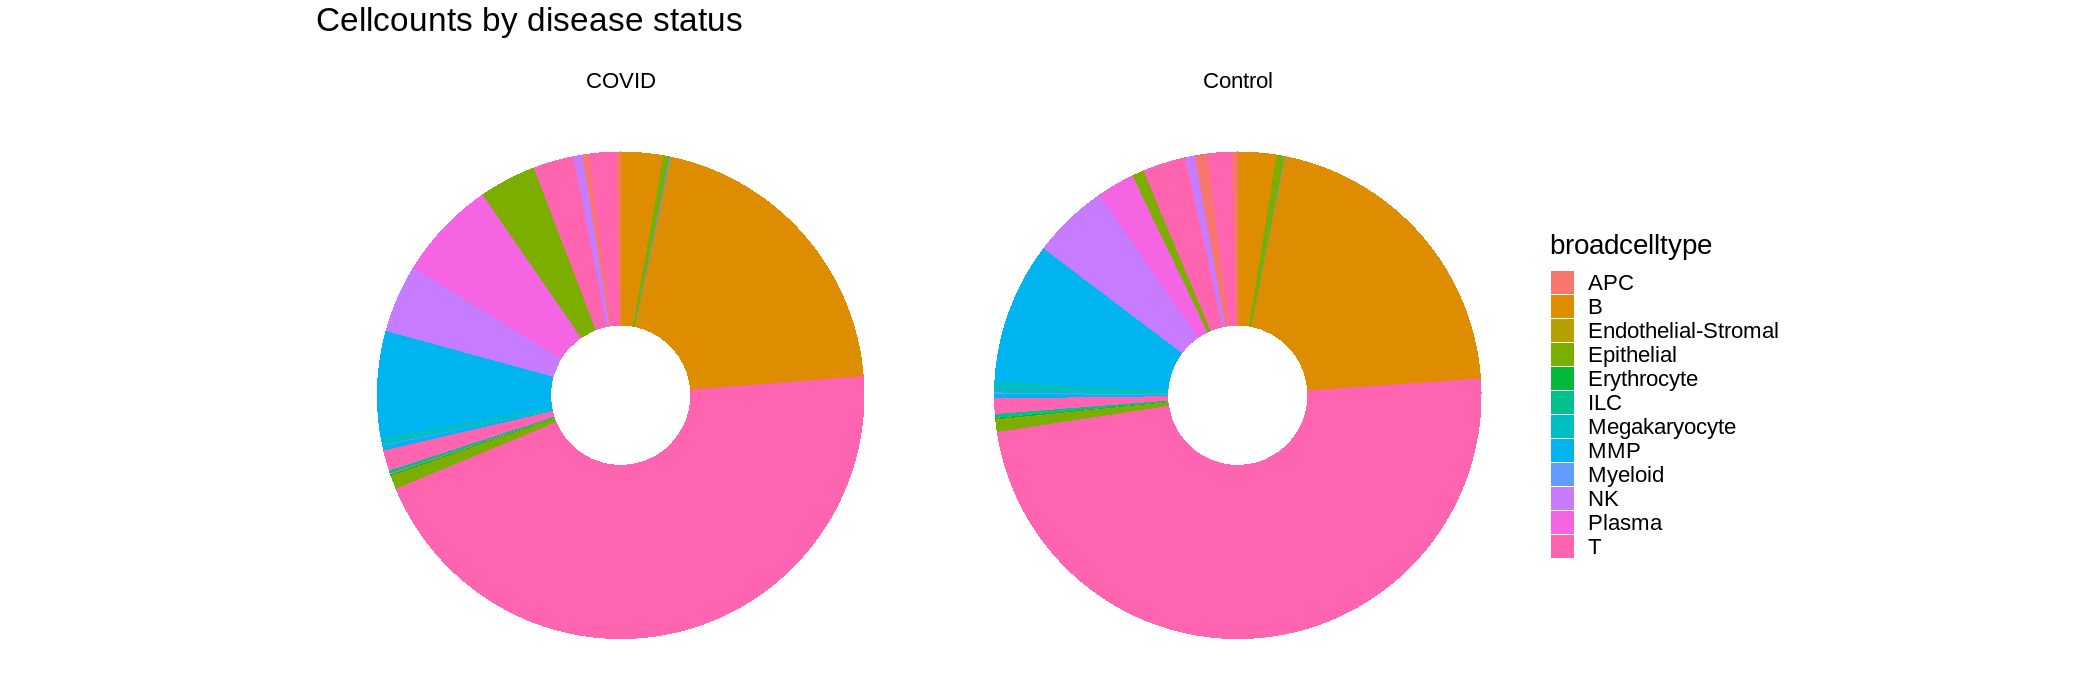

In [34]:

# Data for plot
pdat = covidpiechartdata %>% 
  group_by(Cohort) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p1 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=broadcelltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~Cohort) + ggtitle("Cellcounts by disease status", subtitle = "") + theme(text = element_text(size = 20))
p1

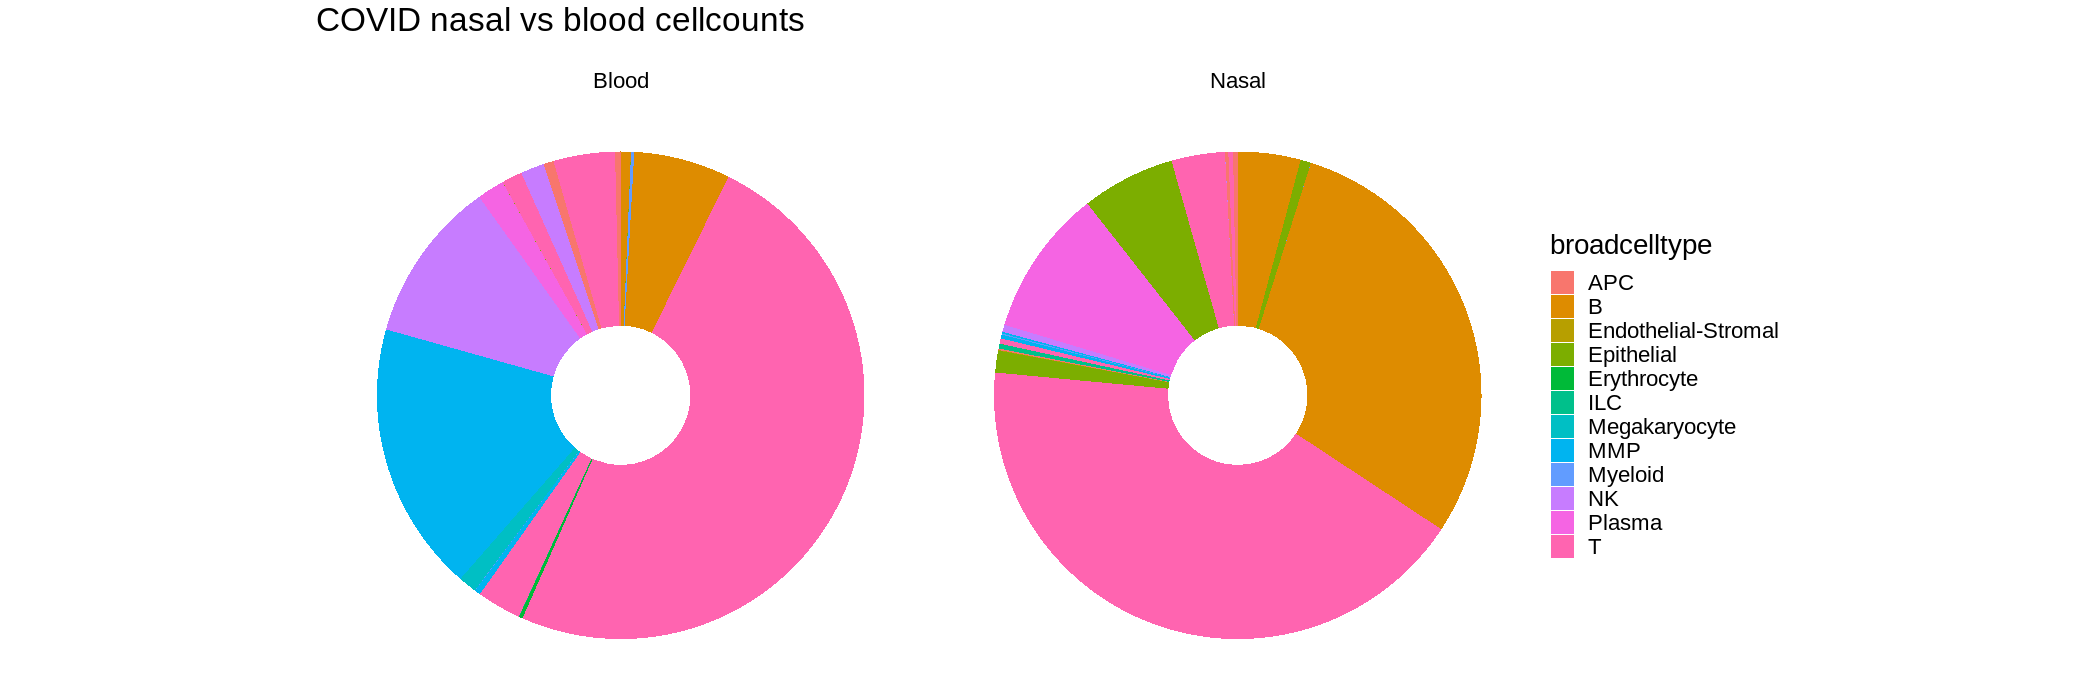

In [36]:

# Data for plot
pdat = covidpiechartcov %>% 
  group_by(Sampletype) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p2 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=broadcelltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~Sampletype) + ggtitle("COVID nasal vs blood cellcounts", subtitle = "") + theme(text = element_text(size = 20))
p2

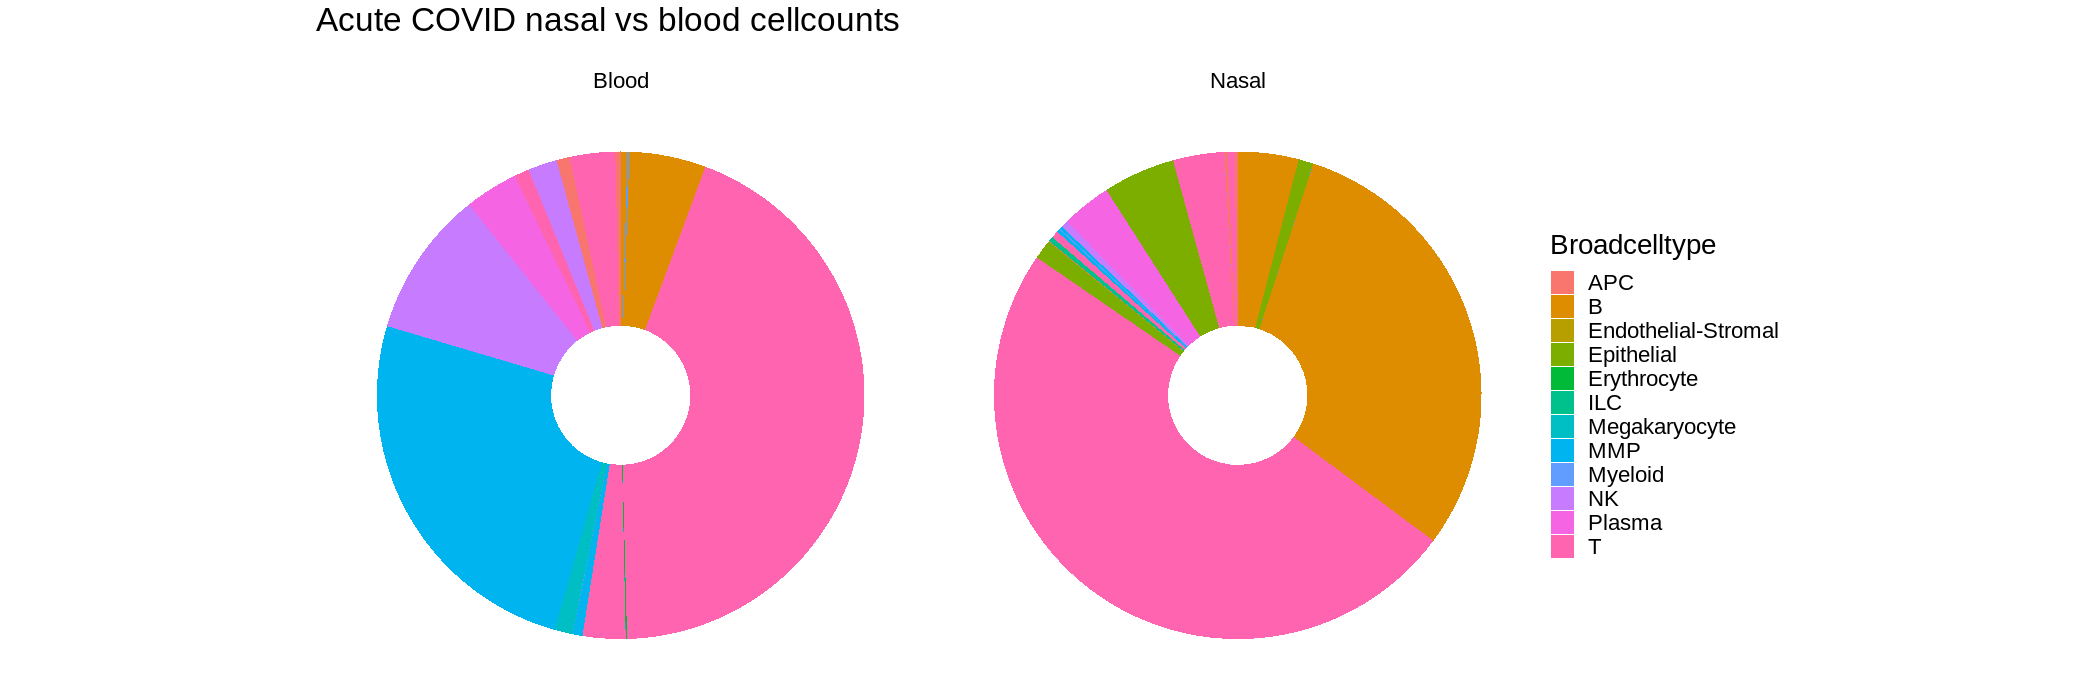

In [48]:

# Data for plot
pdat = covidpiechartacov %>% 
  group_by(Sampletype) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p2 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=Broadcelltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~Sampletype) + ggtitle("Acute COVID nasal vs blood cellcounts", subtitle = "") + theme(text = element_text(size = 20))
p2

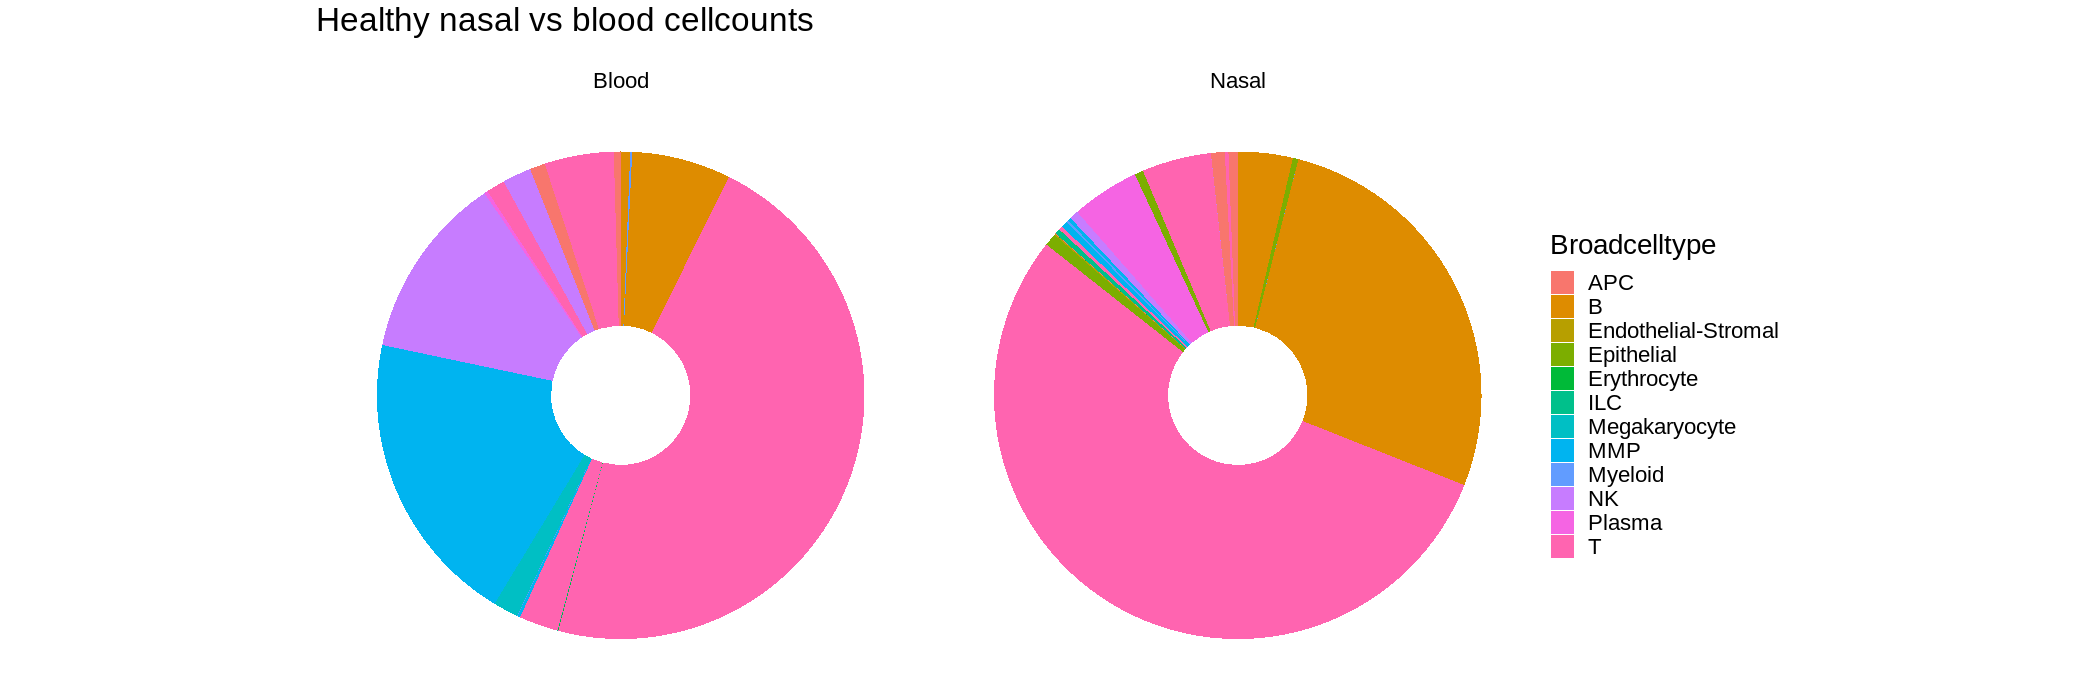

In [49]:

# Data for plot
pdat = covidpiecharth %>% 
  group_by(Sampletype) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p2 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=Broadcelltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~Sampletype) + ggtitle("Healthy nasal vs blood cellcounts", subtitle = "") + theme(text = element_text(size = 20))
p2

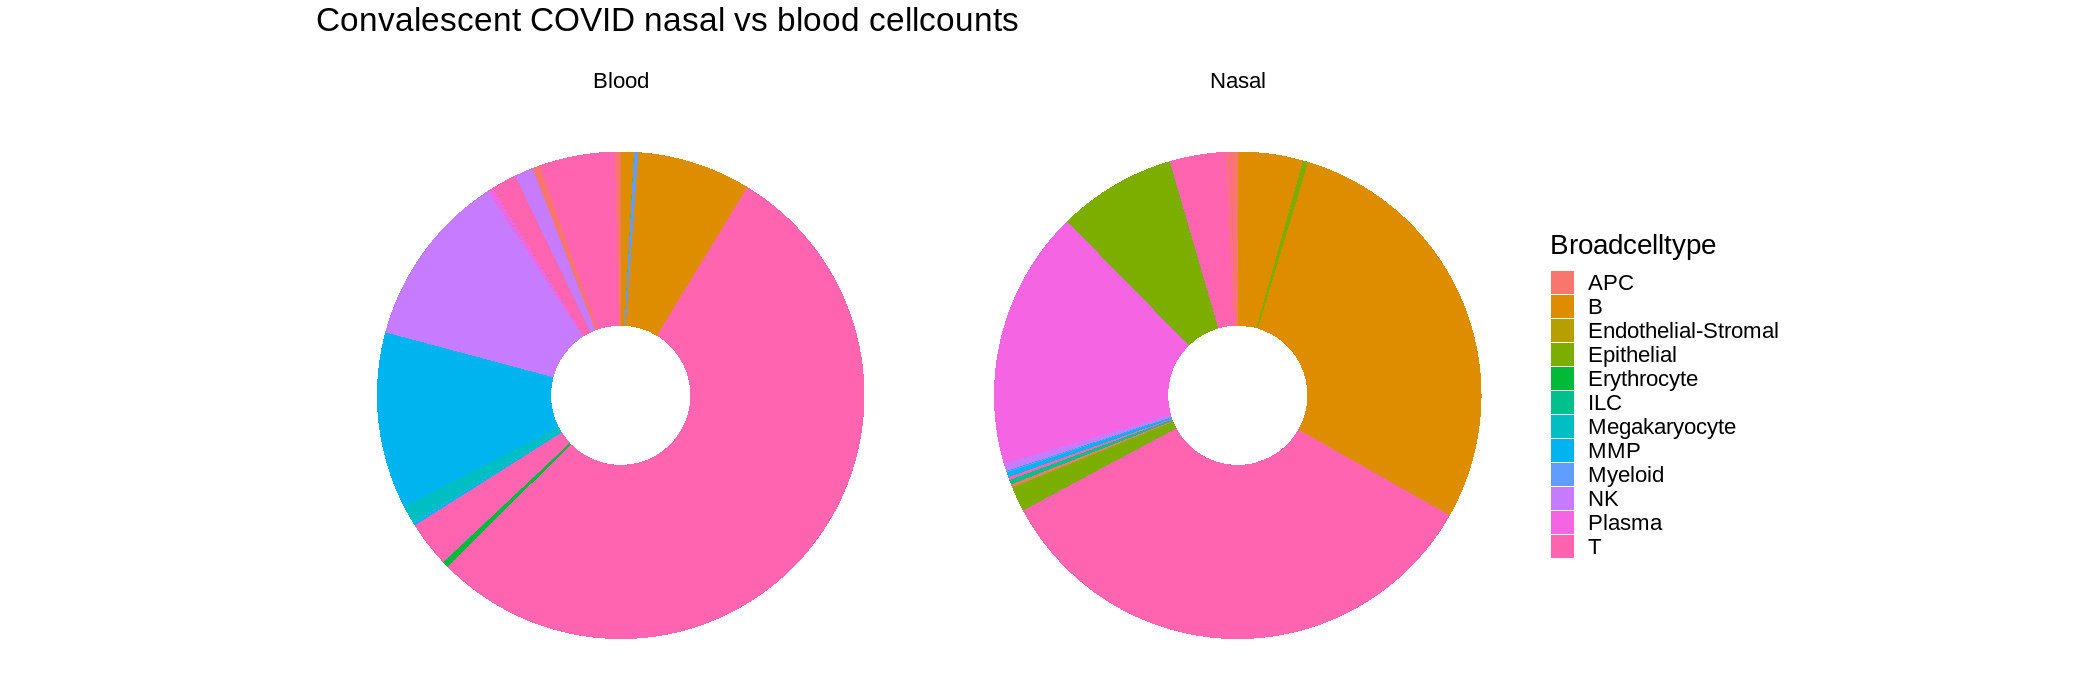

In [52]:

# Data for plot
pdat = covidpiechartccov %>% 
  group_by(Sampletype) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p3 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=Broadcelltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~Sampletype) + ggtitle("Convalescent COVID nasal vs blood cellcounts", subtitle = "") + theme(text = element_text(size = 20))
p3

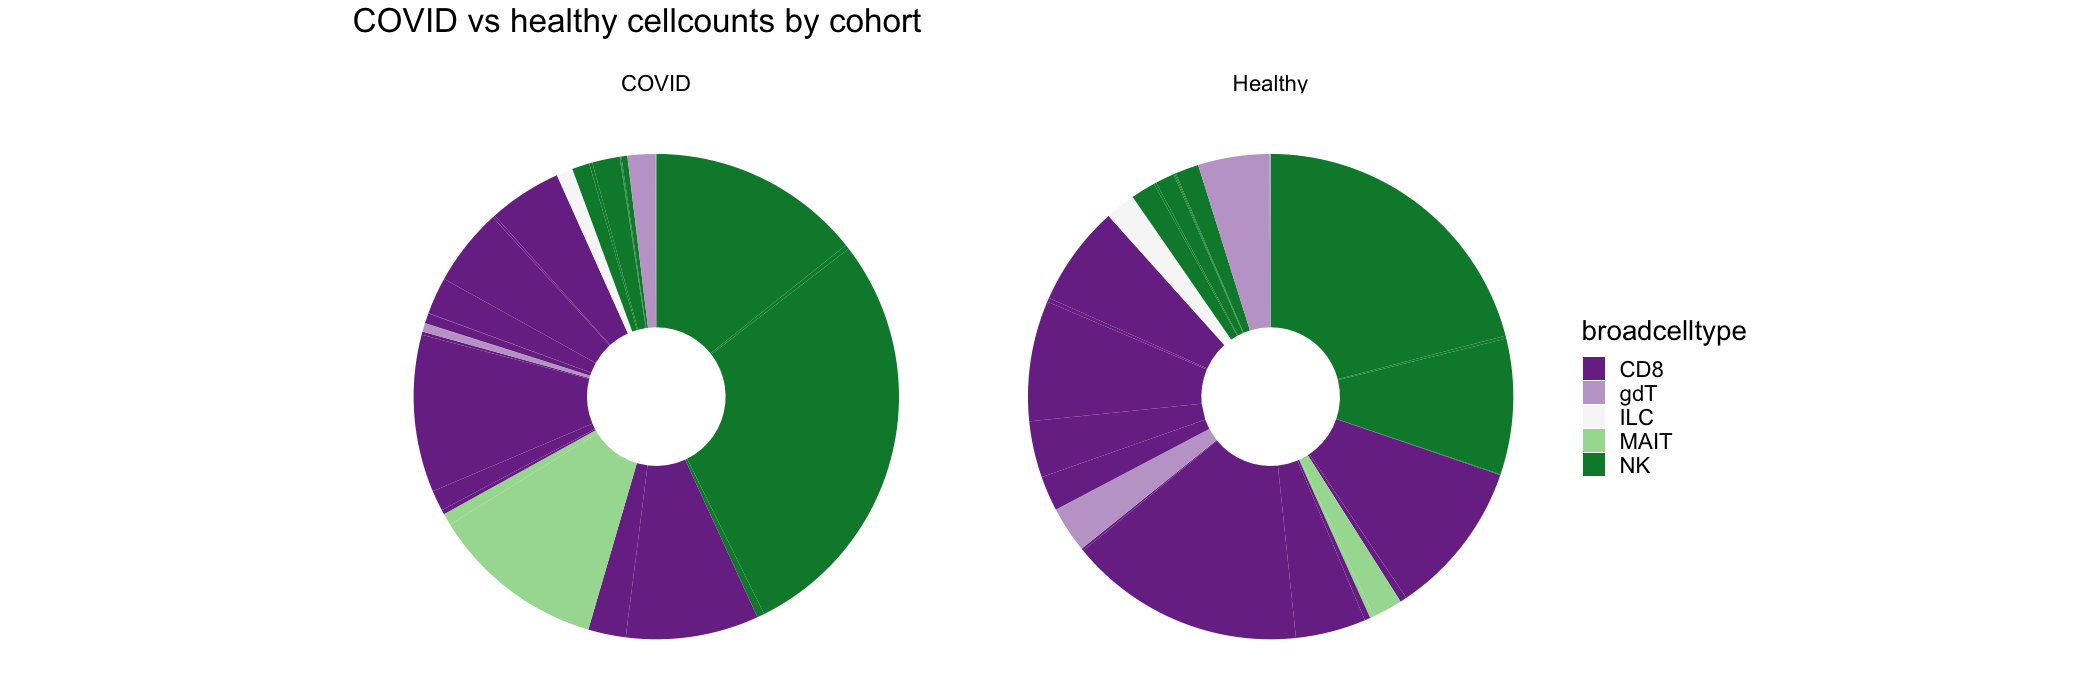

In [24]:

# Data for plot
pdat = covidpiechartdata %>% 
  group_by(cohort) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p4 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=broadcelltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~cohort) + ggtitle("COVID vs healthy cellcounts by cohort", subtitle = "") + theme(text = element_text(size = 20))
p4

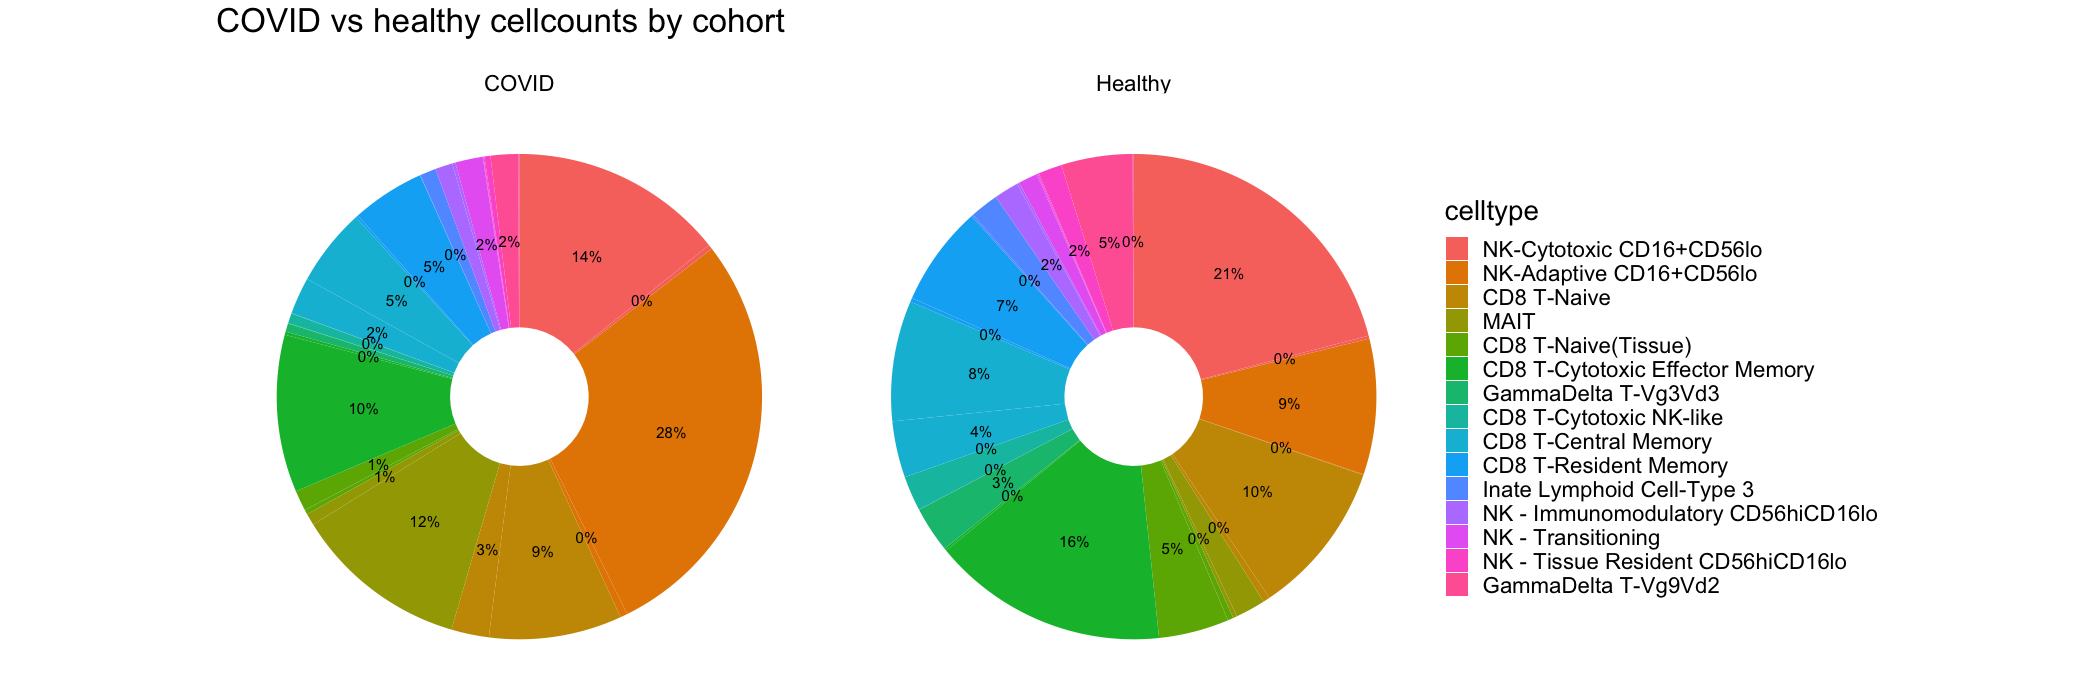

In [25]:
# Data for plot
pdat = covidpiechartdata %>% 
  group_by(cohort) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p5 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + geom_text(aes(label = paste((round(cc*100)), "%", sep = "")), check_overlap=T) +
  theme_void() + facet_wrap(~cohort) + ggtitle("COVID vs healthy cellcounts by cohort", subtitle = "")+theme(text = element_text(size = 20))
p5

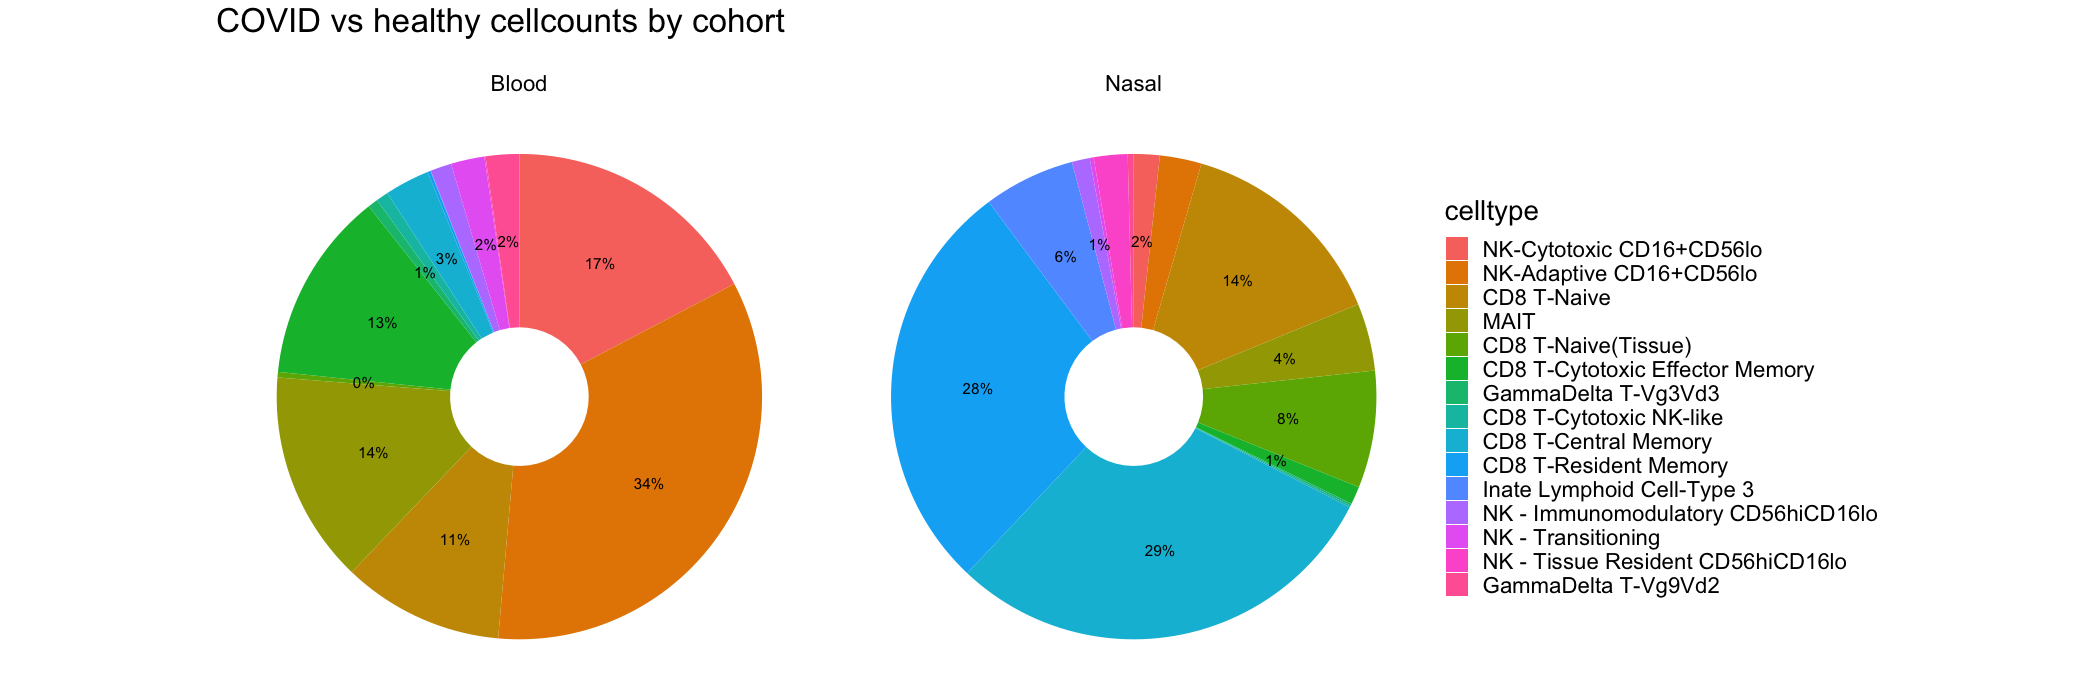

In [26]:
# Data for plot
pdat = covidpiechartcov %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p6 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + geom_text(aes(label = paste((round(cc*100)), "%", sep = "")), check_overlap=T) +
  theme_void() + facet_wrap(~sampletype) + ggtitle("COVID vs healthy cellcounts by cohort", subtitle = "")+theme(text = element_text(size = 20))
p6

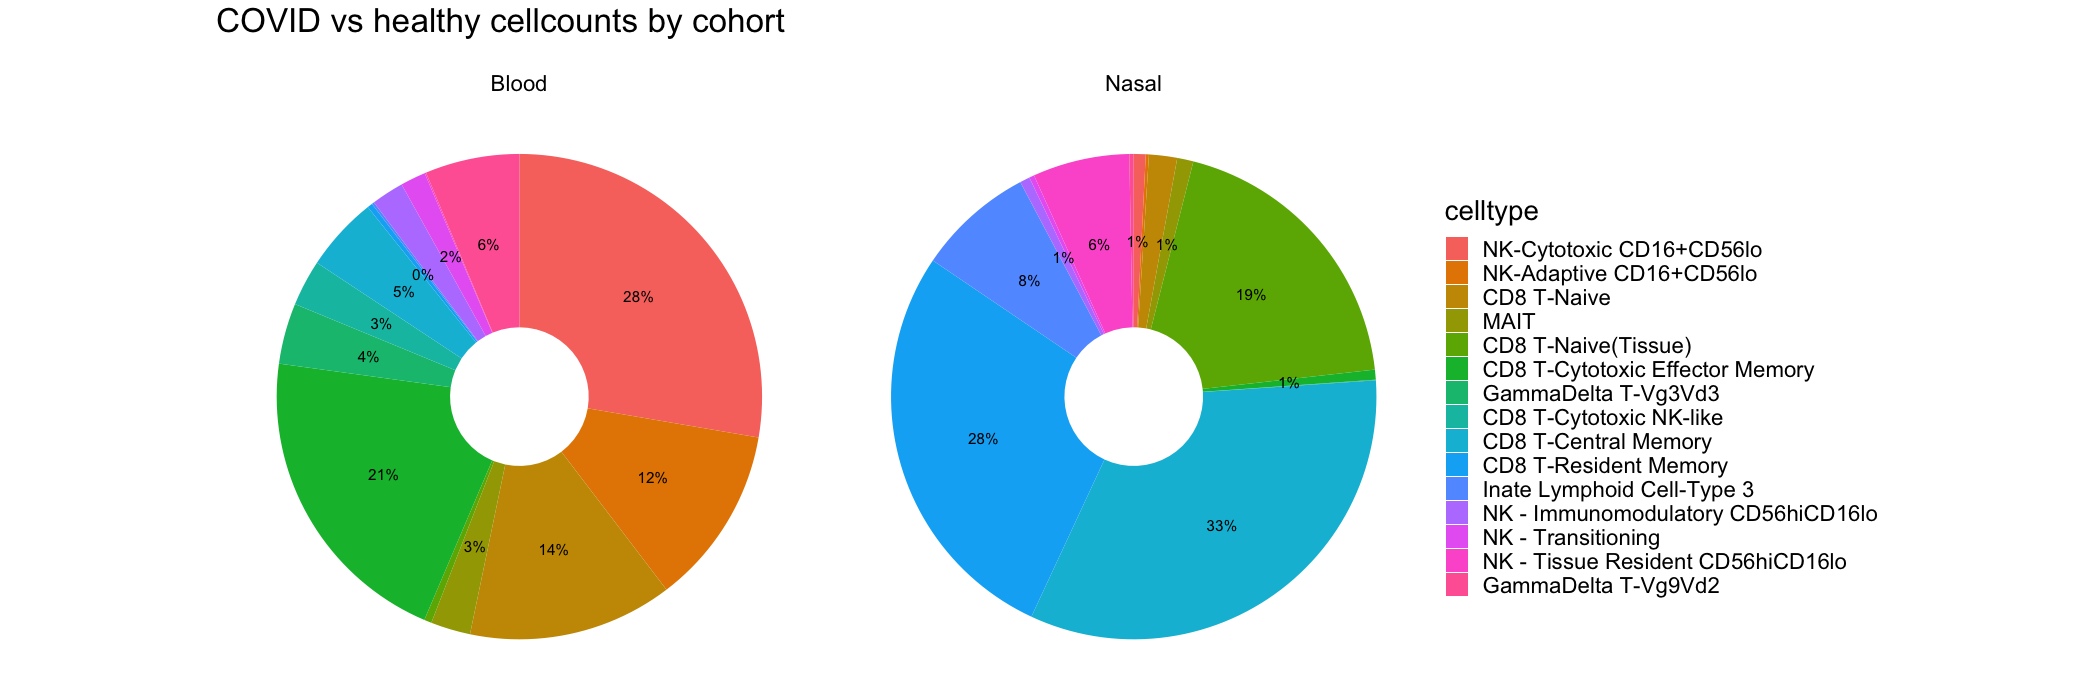

In [27]:
# Data for plot
pdat = covidpiecharth %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p7 <- ggplot(pdat, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + geom_text(aes(label = paste((round(cc*100)), "%", sep = "")), check_overlap=T) +
  theme_void() + facet_wrap(~sampletype) + ggtitle("COVID vs healthy cellcounts by cohort", subtitle = "")+theme(text = element_text(size = 20))
p7

In [28]:
pdat
geom_text(aes(label=(scales::percent(cc))))

celltype                           cohort  sampletype cellcount
1  NK-Cytotoxic CD16+CD56lo           Healthy Blood      2071     
2  NK-Cytotoxic CD16+CD56lo           Healthy Nasal        19     
3  NK-Adaptive CD16+CD56lo            Healthy Blood       893     
4  NK-Adaptive CD16+CD56lo            Healthy Nasal         5     
5  CD8 T-Naive                        Healthy Blood      1019     
6  CD8 T-Naive                        Healthy Nasal        45     
7  MAIT                               Healthy Blood       198     
8  MAIT                               Healthy Nasal        26     
9  CD8 T-Naive(Tissue)                Healthy Blood        37     
10 CD8 T-Naive(Tissue)                Healthy Nasal       463     
11 CD8 T-Cytotoxic Effector Memory    Healthy Blood      1553     
12 CD8 T-Cytotoxic Effector Memory    Healthy Nasal        16     
13 GammaDelta T-Vg3Vd3                Healthy Blood       303     
14 GammaDelta T-Vg3Vd3                Healthy Nasal         1     
15 CD8 T-Cytotoxic NK-like            Healthy Blood       230     
16 CD8 T-Cytotoxic NK-like            Healthy Nasal         0     
17 CD8 T-Central Memory               Healthy Blood       371     
18 CD8 T-Central Memory               Healthy Nasal       793     
19 CD8 T-Resident Memory              Healthy Blood        26     
20 CD8 T-Resident Memory              Healthy Nasal       662     
21 Inate Lymphoid Cell-Type 3         Healthy Blood        12     
22 Inate Lymphoid Cell-Type 3         Healthy Nasal       187     
23 NK - Immunomodulatory CD56hiCD16lo Healthy Blood       162     
24 NK - Immunomodulatory CD56hiCD16lo Healthy Nasal        16     
25 NK - Transitioning                 Healthy Blood       126     
26 NK - Transitioning                 Healthy Nasal         8     
27 NK - Tissue Resident CD56hiCD16lo  Healthy Blood         7     
28 NK - Tissue Resident CD56hiCD16lo  Healthy Nasal       155     
29 GammaDelta T-Vg9Vd2                Healthy Blood       470     
30 GammaDelta T-Vg9Vd2                Healthy Nasal         7     
   broadcelltype cc           cc_cum     
1  NK            0.2769457074 0.138472854
2  NK            0.0079067832 0.003953392
3  NK            0.1194169564 0.336654186
4  NK            0.0020807324 0.008947149
5  CD8           0.1362663814 0.464495855
6  CD8           0.0187265918 0.019350811
7  MAIT          0.0264776678 0.545867879
8  MAIT          0.0108198086 0.034124012
9  CD8           0.0049478470 0.561580637
10 CD8           0.1926758219 0.135871827
11 CD8           0.2076758492 0.667892485
12 CD8           0.0066583437 0.235538910
13 gdT           0.0405188553 0.791989837
14 gdT           0.0004161465 0.239076155
15 CD8           0.0307568869 0.827627708
16 CD8           0.0000000000 0.239284228
17 CD8           0.0496121958 0.867812249
18 CD8           0.3300041615 0.404286309
19 CD8           0.0034768655 0.894356780
20 CD8           0.2754889721 0.707032876
21 ILC           0.0016047071 0.896897566
22 ILC           0.0778193924 0.883687058
23 NK            0.0216635464 0.908531693
24 NK            0.0066583437 0.925925926
25 NK            0.0168494250 0.927788179
26 NK            0.0033291719 0.930919684
27 NK            0.0009360792 0.936680931
28 NK            0.0645027050 0.964835622
29 gdT           0.0628510297 0.968574485
30 gdT           0.0029130254 0.998543487

mapping: label = ~(scales::percent(cc)) 
geom_text: parse = FALSE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

In [53]:
covidpiechartNK <- subset(covidpiechartdata, Broadcelltype == "NK")
covidpiechartNK

Celltype   Cohort  Sampletype Subcohort       Cellcount Broadcelltype
30  NK CD16+   COVID   Blood      Active COV      2292      NK           
31  NK CD56+   COVID   Blood      Active COV       228      NK           
38  aNK KLRC2+ COVID   Blood      Active COV       500      NK           
74  NK CD16+   Control Blood      Active COV         0      NK           
75  NK CD56+   Control Blood      Active COV         0      NK           
82  aNK KLRC2+ Control Blood      Active COV         0      NK           
118 NK CD16+   COVID   Nasal      Active COV        25      NK           
119 NK CD56+   COVID   Nasal      Active COV       194      NK           
126 aNK KLRC2+ COVID   Nasal      Active COV         4      NK           
162 NK CD16+   Control Nasal      Active COV         0      NK           
163 NK CD56+   Control Nasal      Active COV         0      NK           
170 aNK KLRC2+ Control Nasal      Active COV         0      NK           
206 NK CD16+   COVID   Blood      Conval COV      3135      NK           
207 NK CD56+   COVID   Blood      Conval COV       417      NK           
214 aNK KLRC2+ COVID   Blood      Conval COV       380      NK           
250 NK CD16+   Control Blood      Conval COV         0      NK           
251 NK CD56+   Control Blood      Conval COV         0      NK           
258 aNK KLRC2+ Control Blood      Conval COV         0      NK           
294 NK CD16+   COVID   Nasal      Conval COV         3      NK           
295 NK CD56+   COVID   Nasal      Conval COV       202      NK           
302 aNK KLRC2+ COVID   Nasal      Conval COV         1      NK           
338 NK CD16+   Control Nasal      Conval COV         0      NK           
339 NK CD56+   Control Nasal      Conval COV         0      NK           
346 aNK KLRC2+ Control Nasal      Conval COV         0      NK           
382 NK CD16+   COVID   Blood      GPA control        0      NK           
383 NK CD56+   COVID   Blood      GPA control        0      NK           
390 aNK KLRC2+ COVID   Blood      GPA control        0      NK           
426 NK CD16+   Control Blood      GPA control     2492      NK           
427 NK CD56+   Control Blood      GPA control      349      NK           
434 aNK KLRC2+ Control Blood      GPA control      329      NK           
470 NK CD16+   COVID   Nasal      GPA control        0      NK           
471 NK CD56+   COVID   Nasal      GPA control        0      NK           
478 aNK KLRC2+ COVID   Nasal      GPA control        0      NK           
514 NK CD16+   Control Nasal      GPA control       60      NK           
515 NK CD56+   Control Nasal      GPA control      210      NK           
522 aNK KLRC2+ Control Nasal      GPA control        5      NK           
558 NK CD16+   COVID   Blood      Healthy control    0      NK           
559 NK CD56+   COVID   Blood      Healthy control    0      NK           
566 aNK KLRC2+ COVID   Blood      Healthy control    0      NK           
602 NK CD16+   Control Blood      Healthy control 2693      NK           
603 NK CD56+   Control Blood      Healthy control  253      NK           
610 aNK KLRC2+ Control Blood      Healthy control  457      NK           
646 NK CD16+   COVID   Nasal      Healthy control    0      NK           
647 NK CD56+   COVID   Nasal      Healthy control    0      NK           
654 aNK KLRC2+ COVID   Nasal      Healthy control    0      NK           
690 NK CD16+   Control Nasal      Healthy control   21      NK           
691 NK CD56+   Control Nasal      Healthy control  201      NK           
698 aNK KLRC2+ Control Nasal      Healthy control    4      NK

In [54]:
covidpiechartT <- subset(covidpiechartdata, Broadcelltype == "T")
covidpiechartT

Celltype Cohort  Sampletype Subcohort       Cellcount Broadcelltype
7   CD4 Act  COVID   Blood      Active COV       106      T            
8   CD4 Tcm  COVID   Blood      Active COV       159      T            
9   CD4 Tem  COVID   Blood      Active COV        18      T            
10  CD4 Th2  COVID   Blood      Active COV      1802      T            
11  CD4 Th17 COVID   Blood      Active COV        27      T            
12  CD4 Tn   COVID   Blood      Active COV      4633      T            
13  CD4 Trm  COVID   Blood      Active COV        12      T            
14  CD8 CTL  COVID   Blood      Active COV      2068      T            
15  CD8 Tn   COVID   Blood      Active COV      1778      T            
16  CD8 Trm  COVID   Blood      Active COV       788      T            
23  MAIT     COVID   Blood      Active COV       735      T            
36  Tfh      COVID   Blood      Active COV        12      T            
37  Treg     COVID   Blood      Active COV       250      T            
41  gdT vd1  COVID   Blood      Active COV        64      T            
42  gdT vd2  COVID   Blood      Active COV       650      T            
43  gdT vd3  COVID   Blood      Active COV        67      T            
51  CD4 Act  Control Blood      Active COV         0      T            
52  CD4 Tcm  Control Blood      Active COV         0      T            
53  CD4 Tem  Control Blood      Active COV         0      T            
54  CD4 Th2  Control Blood      Active COV         0      T            
55  CD4 Th17 Control Blood      Active COV         0      T            
56  CD4 Tn   Control Blood      Active COV         0      T            
57  CD4 Trm  Control Blood      Active COV         0      T            
58  CD8 CTL  Control Blood      Active COV         0      T            
59  CD8 Tn   Control Blood      Active COV         0      T            
60  CD8 Trm  Control Blood      Active COV         0      T            
67  MAIT     Control Blood      Active COV         0      T            
80  Tfh      Control Blood      Active COV         0      T            
81  Treg     Control Blood      Active COV         0      T            
85  gdT vd1  Control Blood      Active COV         0      T            
⋮   ⋮        ⋮       ⋮          ⋮               ⋮         ⋮            
625 CD4 Tem  COVID   Nasal      Healthy control    0      T            
626 CD4 Th2  COVID   Nasal      Healthy control    0      T            
627 CD4 Th17 COVID   Nasal      Healthy control    0      T            
628 CD4 Tn   COVID   Nasal      Healthy control    0      T            
629 CD4 Trm  COVID   Nasal      Healthy control    0      T            
630 CD8 CTL  COVID   Nasal      Healthy control    0      T            
631 CD8 Tn   COVID   Nasal      Healthy control    0      T            
632 CD8 Trm  COVID   Nasal      Healthy control    0      T            
639 MAIT     COVID   Nasal      Healthy control    0      T            
652 Tfh      COVID   Nasal      Healthy control    0      T            
653 Treg     COVID   Nasal      Healthy control    0      T            
657 gdT vd1  COVID   Nasal      Healthy control    0      T            
658 gdT vd2  COVID   Nasal      Healthy control    0      T            
659 gdT vd3  COVID   Nasal      Healthy control    0      T            
667 CD4 Act  Control Nasal      Healthy control  100      T            
668 CD4 Tcm  Control Nasal      Healthy control 6305      T            
669 CD4 Tem  Control Nasal      Healthy control 4047      T            
670 CD4 Th2  Control Nasal      Healthy control  764      T            
671 CD4 Th17 Control Nasal      Healthy control  439      T            
672 CD4 Tn   Control Nasal      Healthy control 5220      T            
673 CD4 Trm  Control Nasal      Healthy control  635      T            
674 CD8 CTL  Control Nasal      Healthy control   64      T            
675 CD8 Tn   Control Nasal      Healthy control  700      T            
676 CD8 Trm  Control Nasal      Healthy cont

In [55]:
covidpiechartBPlasma <- subset(covidpiechartdata, Broadcelltype %in% c("B","Plasma"))
covidpiechartBPlasma

Celltype          Cohort  Sampletype Subcohort       Cellcount
1   B FO              COVID   Blood      Active COV        104    
2   B Naive           COVID   Blood      Active COV         11    
5   Bmem non-switched COVID   Blood      Active COV         91    
6   Bmem switched     COVID   Blood      Active COV       1225    
32  Plasma            COVID   Blood      Active COV        689    
33  Plasmablast IgM+  COVID   Blood      Active COV        225    
45  B FO              Control Blood      Active COV          0    
46  B Naive           Control Blood      Active COV          0    
49  Bmem non-switched Control Blood      Active COV          0    
50  Bmem switched     Control Blood      Active COV          0    
76  Plasma            Control Blood      Active COV          0    
77  Plasmablast IgM+  Control Blood      Active COV          0    
89  B FO              COVID   Nasal      Active COV       1702    
90  B Naive           COVID   Nasal      Active COV        196    
93  Bmem non-switched COVID   Nasal      Active COV       1323    
94  Bmem switched     COVID   Nasal      Active COV      12910    
120 Plasma            COVID   Nasal      Active COV       1310    
121 Plasmablast IgM+  COVID   Nasal      Active COV        250    
133 B FO              Control Nasal      Active COV          0    
134 B Naive           Control Nasal      Active COV          0    
137 Bmem non-switched Control Nasal      Active COV          0    
138 Bmem switched     Control Nasal      Active COV          0    
164 Plasma            Control Nasal      Active COV          0    
165 Plasmablast IgM+  Control Nasal      Active COV          0    
177 B FO              COVID   Blood      Conval COV        231    
178 B Naive           COVID   Blood      Conval COV         30    
181 Bmem non-switched COVID   Blood      Conval COV        172    
182 Bmem switched     COVID   Blood      Conval COV       2122    
208 Plasma            COVID   Blood      Conval COV        103    
209 Plasmablast IgM+  COVID   Blood      Conval COV          4    
⋮   ⋮                 ⋮       ⋮          ⋮               ⋮        
485 B FO              Control Nasal      GPA control      1290    
486 B Naive           Control Nasal      GPA control       206    
489 Bmem non-switched Control Nasal      GPA control      1120    
490 Bmem switched     Control Nasal      GPA control     11017    
516 Plasma            Control Nasal      GPA control       816    
517 Plasmablast IgM+  Control Nasal      GPA control       455    
529 B FO              COVID   Blood      Healthy control     0    
530 B Naive           COVID   Blood      Healthy control     0    
533 Bmem non-switched COVID   Blood      Healthy control     0    
534 Bmem switched     COVID   Blood      Healthy control     0    
560 Plasma            COVID   Blood      Healthy control     0    
561 Plasmablast IgM+  COVID   Blood      Healthy control     0    
573 B FO              Control Blood      Healthy control   139    
574 B Naive           Control Blood      Healthy control    11    
577 Bmem non-switched Control Blood      Healthy control   116    
578 Bmem switched     Control Blood      Healthy control  1463    
604 Plasma            Control Blood      Healthy control    50    
605 Plasmablast IgM+  Control Blood      Healthy control     6    
617 B FO              COVID   Nasal      Healthy control     0    
618 B Naive           COVID   Nasal      Healthy control     0    
621 Bmem non-switched COVID   Nasal      Healthy control     0    
622 Bmem switched     COVID   Nasal      Healthy control     0    
648 Plasma            COVID   Nasal      Healthy control     0    
649 Plasmablast IgM+  COVID   Nasal      Healthy control     0    
661 B FO              Control Nasal      Healthy control  1190    
662 B Naive           Control Nasal      Healthy control   167    
665 Bmem non-switched Control Nasal      Healthy control  1203    
666 Bmem switched     Control Nasal      Healthy co

In [78]:
covidpiechartMMP <- subset(covidpiechartdata, Broadcelltype %in% c("MMP", "APC"))
covidpiechartMMP

Celltype                Cohort  Sampletype Subcohort       Cellcount
20  Follicular DC           COVID   Blood      Active COV         0     
24  Macrophage non-resident COVID   Blood      Active COV       157     
25  Macrophage resident     COVID   Blood      Active COV        10     
28  Monocyte classical      COVID   Blood      Active COV      5965     
29  Monocyte non-classical  COVID   Blood      Active COV       573     
39  cDC CD1c+               COVID   Blood      Active COV       207     
40  cDC CD141+              COVID   Blood      Active COV        19     
44  pDC                     COVID   Blood      Active COV        92     
64  Follicular DC           Control Blood      Active COV         0     
68  Macrophage non-resident Control Blood      Active COV         0     
69  Macrophage resident     Control Blood      Active COV         0     
72  Monocyte classical      Control Blood      Active COV         0     
73  Monocyte non-classical  Control Blood      Active COV         0     
83  cDC CD1c+               Control Blood      Active COV         0     
84  cDC CD141+              Control Blood      Active COV         0     
88  pDC                     Control Blood      Active COV         0     
108 Follicular DC           COVID   Nasal      Active COV        16     
112 Macrophage non-resident COVID   Nasal      Active COV         0     
113 Macrophage resident     COVID   Nasal      Active COV        93     
116 Monocyte classical      COVID   Nasal      Active COV        81     
117 Monocyte non-classical  COVID   Nasal      Active COV         1     
127 cDC CD1c+               COVID   Nasal      Active COV        82     
128 cDC CD141+              COVID   Nasal      Active COV        15     
132 pDC                     COVID   Nasal      Active COV        91     
152 Follicular DC           Control Nasal      Active COV         0     
156 Macrophage non-resident Control Nasal      Active COV         0     
157 Macrophage resident     Control Nasal      Active COV         0     
160 Monocyte classical      Control Nasal      Active COV         0     
161 Monocyte non-classical  Control Nasal      Active COV         0     
171 cDC CD1c+               Control Nasal      Active COV         0     
⋮   ⋮                       ⋮       ⋮          ⋮               ⋮        
553 Macrophage resident     COVID   Blood      Healthy control    0     
556 Monocyte classical      COVID   Blood      Healthy control    0     
557 Monocyte non-classical  COVID   Blood      Healthy control    0     
567 cDC CD1c+               COVID   Blood      Healthy control    0     
568 cDC CD141+              COVID   Blood      Healthy control    0     
572 pDC                     COVID   Blood      Healthy control    0     
592 Follicular DC           Control Blood      Healthy control    0     
596 Macrophage non-resident Control Blood      Healthy control   43     
597 Macrophage resident     Control Blood      Healthy control    1     
600 Monocyte classical      Control Blood      Healthy control 3946     
601 Monocyte non-classical  Control Blood      Healthy control  777     
611 cDC CD1c+               Control Blood      Healthy control  230     
612 cDC CD141+              Control Blood      Healthy control   16     
616 pDC                     Control Blood      Healthy control  109     
636 Follicular DC           COVID   Nasal      Healthy control    0     
640 Macrophage non-resident COVID   Nasal      Healthy control    0     
641 Macrophage resident     COVID   Nasal      Healthy control    0     
644 Monocyte classical      COVID   Nasal      Healthy control    0     
645 Monocyte non-classical  COVID   Nasal      Healthy control    0     
655 cDC CD1c+               COVID   Nasal      Healthy control    0     
656 cDC CD141+              COVID   Nasal      Healthy control    0     
660 pDC                     COVID   Nasal      Healthy control    0     
680 Follicular DC           Control Nasal      Healthy control

In [30]:
covidpiechartNKCov <- subset(covidpiechartNK, cohort == "COVID")
covidpiechartNKCov

celltype                           cohort sampletype cellcount broadcelltype
1  NK-Cytotoxic CD16+CD56lo           COVID  Blood       614      NK           
2  NK-Adaptive CD16+CD56lo            COVID  Blood      1209      NK           
12 NK - Immunomodulatory CD56hiCD16lo COVID  Blood        50      NK           
13 NK - Transitioning                 COVID  Blood        79      NK           
14 NK - Tissue Resident CD56hiCD16lo  COVID  Blood         3      NK           
31 NK-Cytotoxic CD16+CD56lo           COVID  Nasal        13      NK           
32 NK-Adaptive CD16+CD56lo            COVID  Nasal        21      NK           
42 NK - Immunomodulatory CD56hiCD16lo COVID  Nasal         9      NK           
43 NK - Transitioning                 COVID  Nasal         2      NK           
44 NK - Tissue Resident CD56hiCD16lo  COVID  Nasal        17      NK

In [31]:
covidpiechartNKh <- subset(covidpiechartNK, cohort == "Healthy")
covidpiechartNKh

celltype                           cohort  sampletype cellcount
16 NK-Cytotoxic CD16+CD56lo           Healthy Blood      2071     
17 NK-Adaptive CD16+CD56lo            Healthy Blood       893     
27 NK - Immunomodulatory CD56hiCD16lo Healthy Blood       162     
28 NK - Transitioning                 Healthy Blood       126     
29 NK - Tissue Resident CD56hiCD16lo  Healthy Blood         7     
46 NK-Cytotoxic CD16+CD56lo           Healthy Nasal        19     
47 NK-Adaptive CD16+CD56lo            Healthy Nasal         5     
57 NK - Immunomodulatory CD56hiCD16lo Healthy Nasal        16     
58 NK - Transitioning                 Healthy Nasal         8     
59 NK - Tissue Resident CD56hiCD16lo  Healthy Nasal       155     
   broadcelltype
16 NK           
17 NK           
27 NK           
28 NK           
29 NK           
46 NK           
47 NK           
57 NK           
58 NK           
59 NK

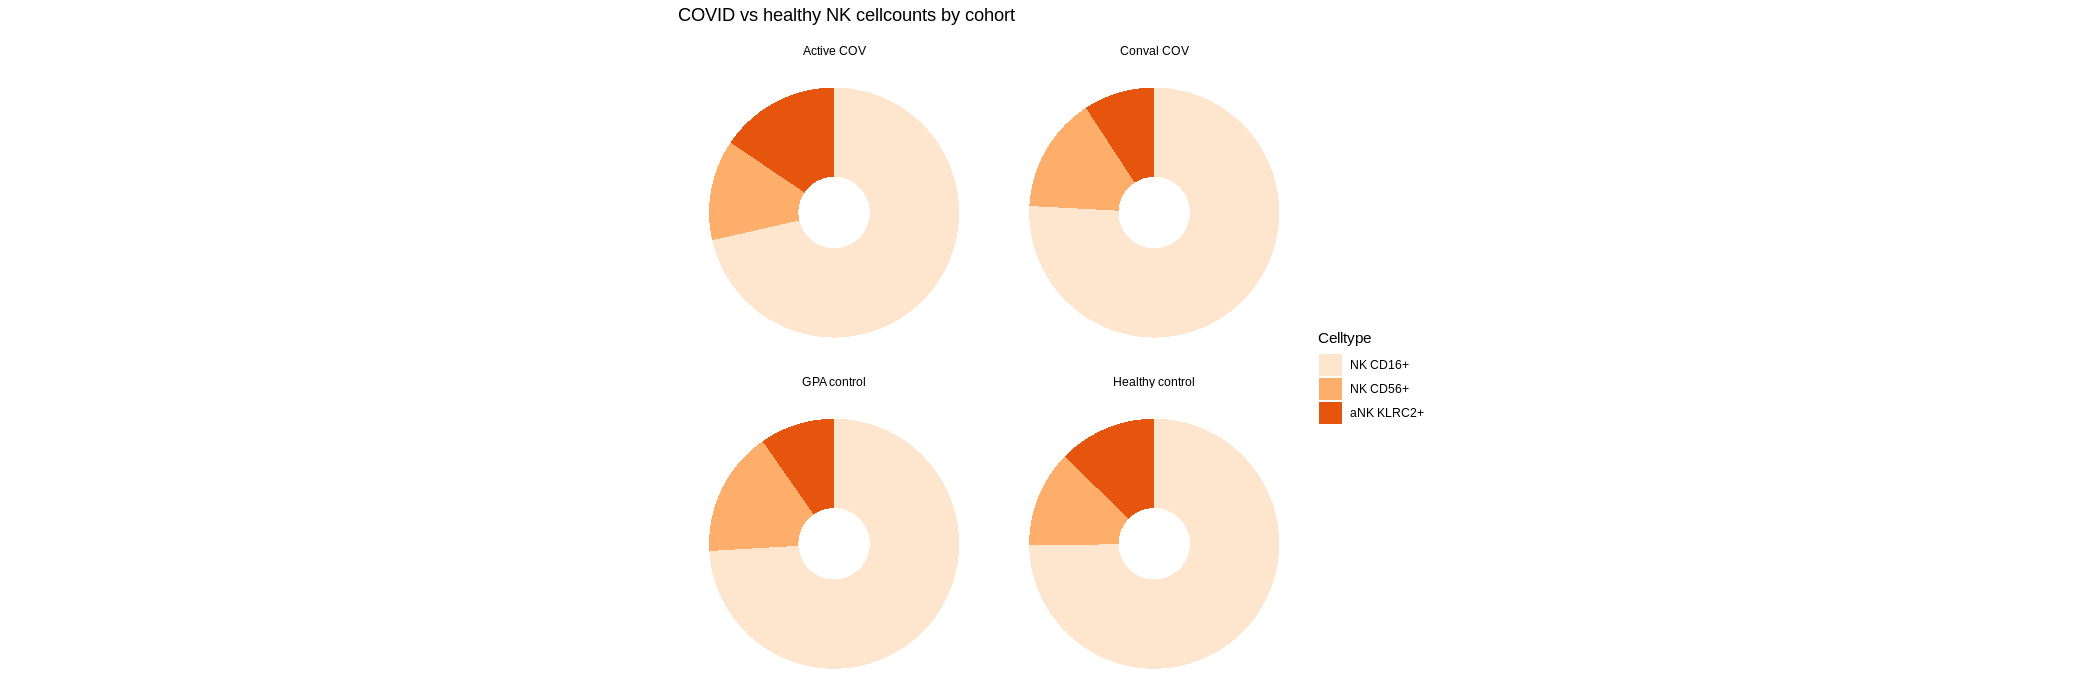

In [65]:
# Data for plot
pdatNK = covidpiechartNK %>% 
  group_by(Subcohort) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p3 <- ggplot(pdatNK, aes(x=cc_cum, y=1, fill=Celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
scale_fill_brewer(palette = "Oranges") +
  theme_void() + facet_wrap(~Subcohort) + ggtitle("COVID vs healthy NK cellcounts by cohort", subtitle = "")
p3

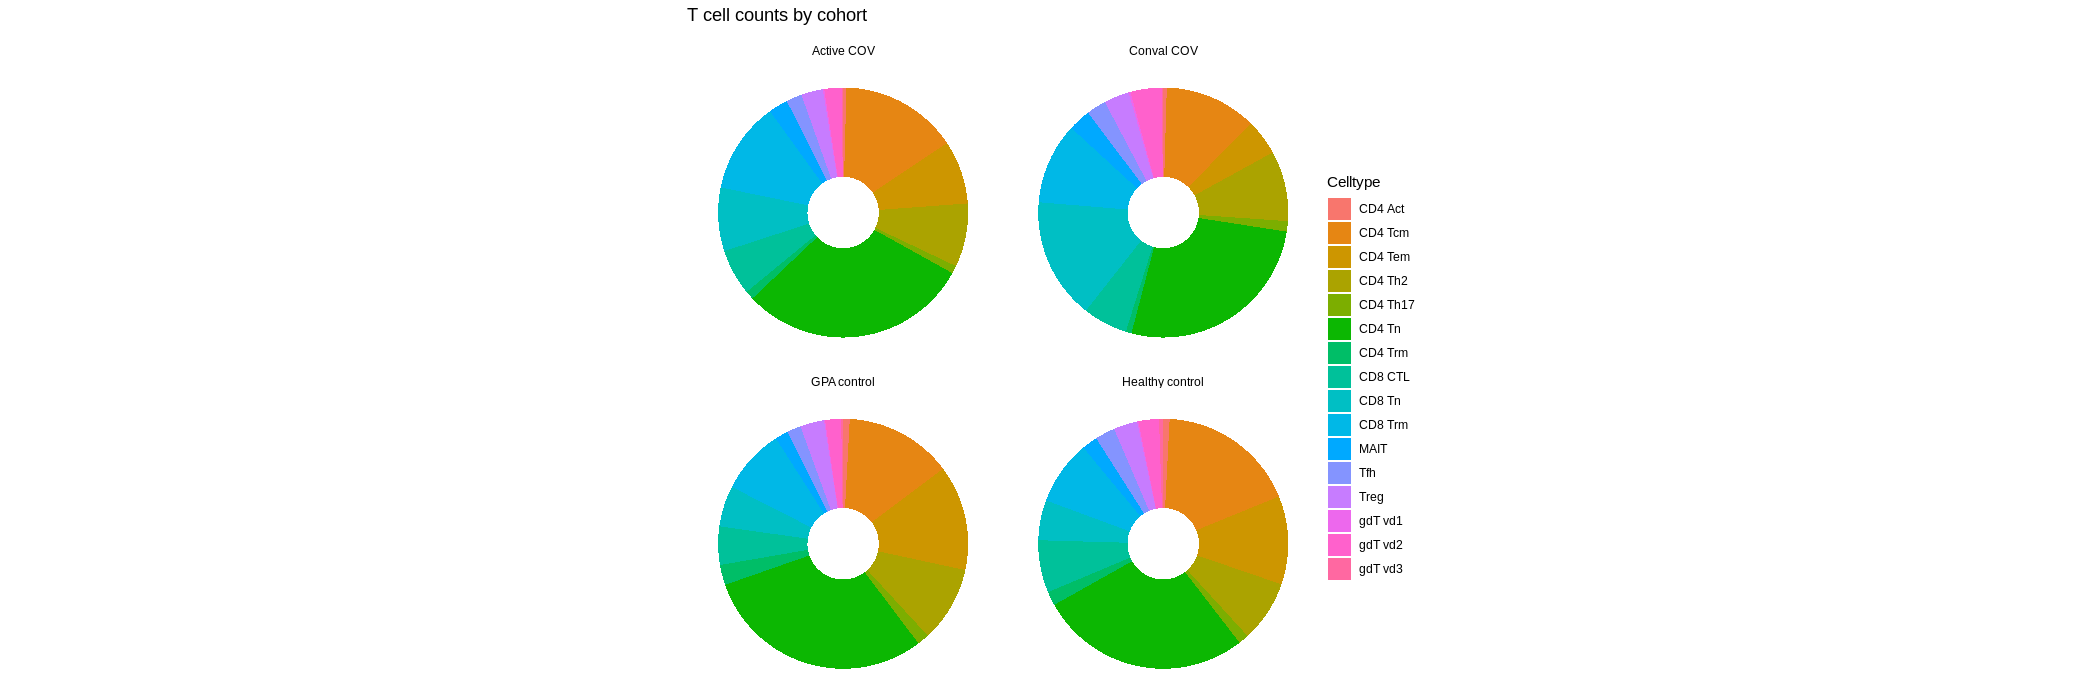

In [76]:
# Data for plot
pdatT = covidpiechartT %>% 
  group_by(Subcohort) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p3 <- ggplot(pdatT, aes(x=cc_cum, y=1, fill=Celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~Subcohort) + ggtitle("T cell counts by cohort", subtitle = "")
p3

In [77]:
pdf('T cell plot COVID 120721.pdf')
p3
dev.off()

png 
  2

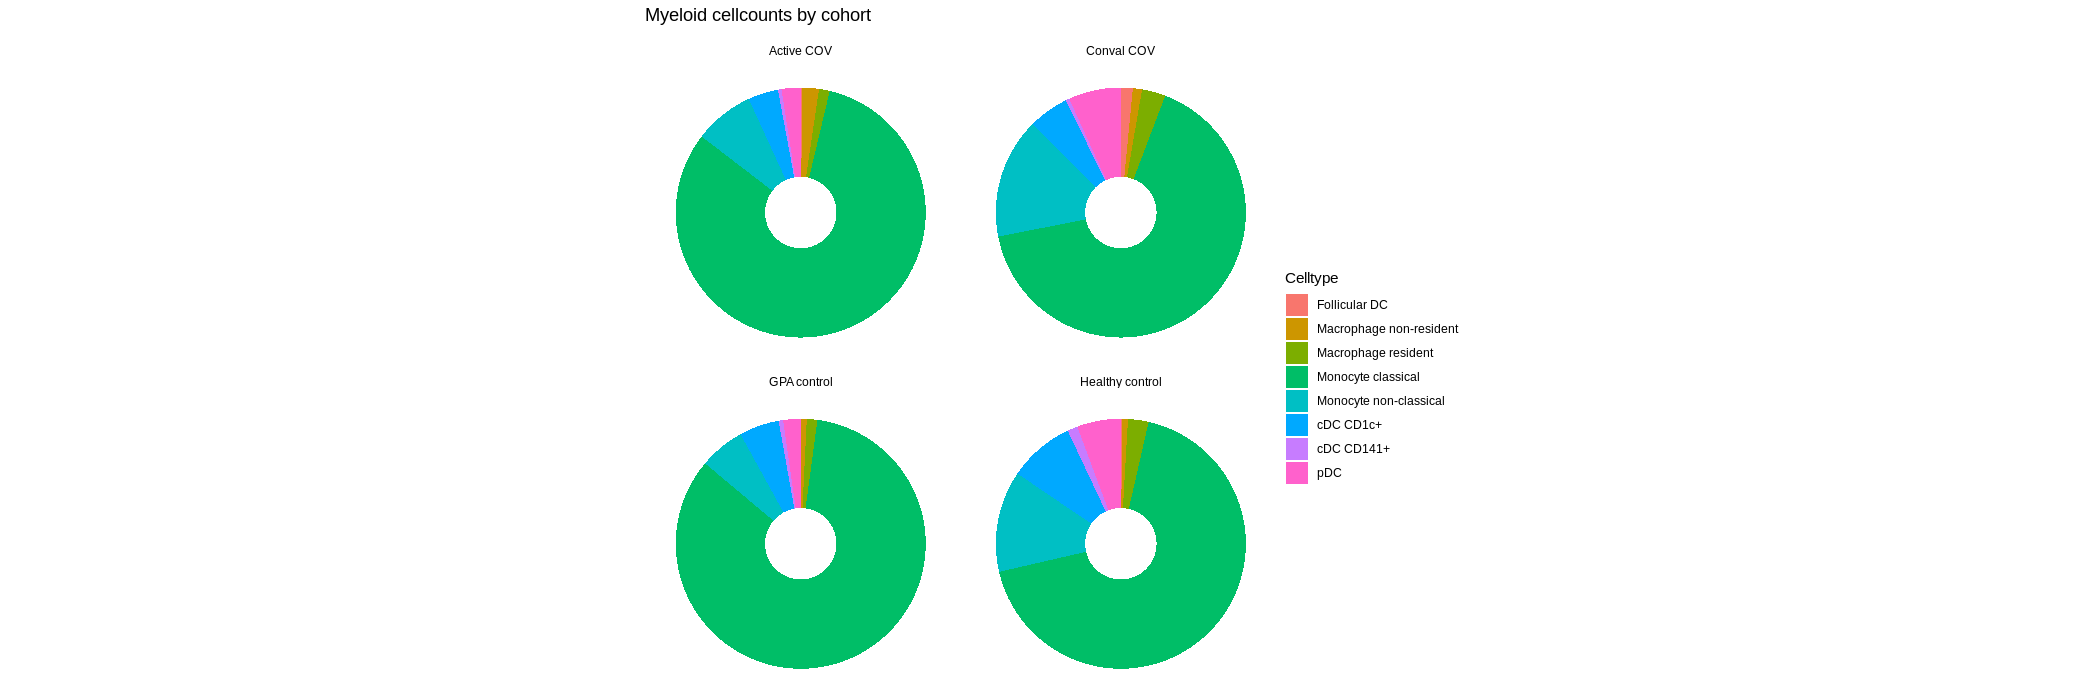

In [81]:
# Data for plot
pdatM = covidpiechartMMP %>% 
  group_by(Subcohort) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p3 <- ggplot(pdatM, aes(x=cc_cum, y=1, fill=Celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~Subcohort) + ggtitle("Myeloid cellcounts by cohort", subtitle = "")
p3

In [82]:
pdf('MMP cell plot COVID 120721.pdf')
p3
dev.off()

png 
  2

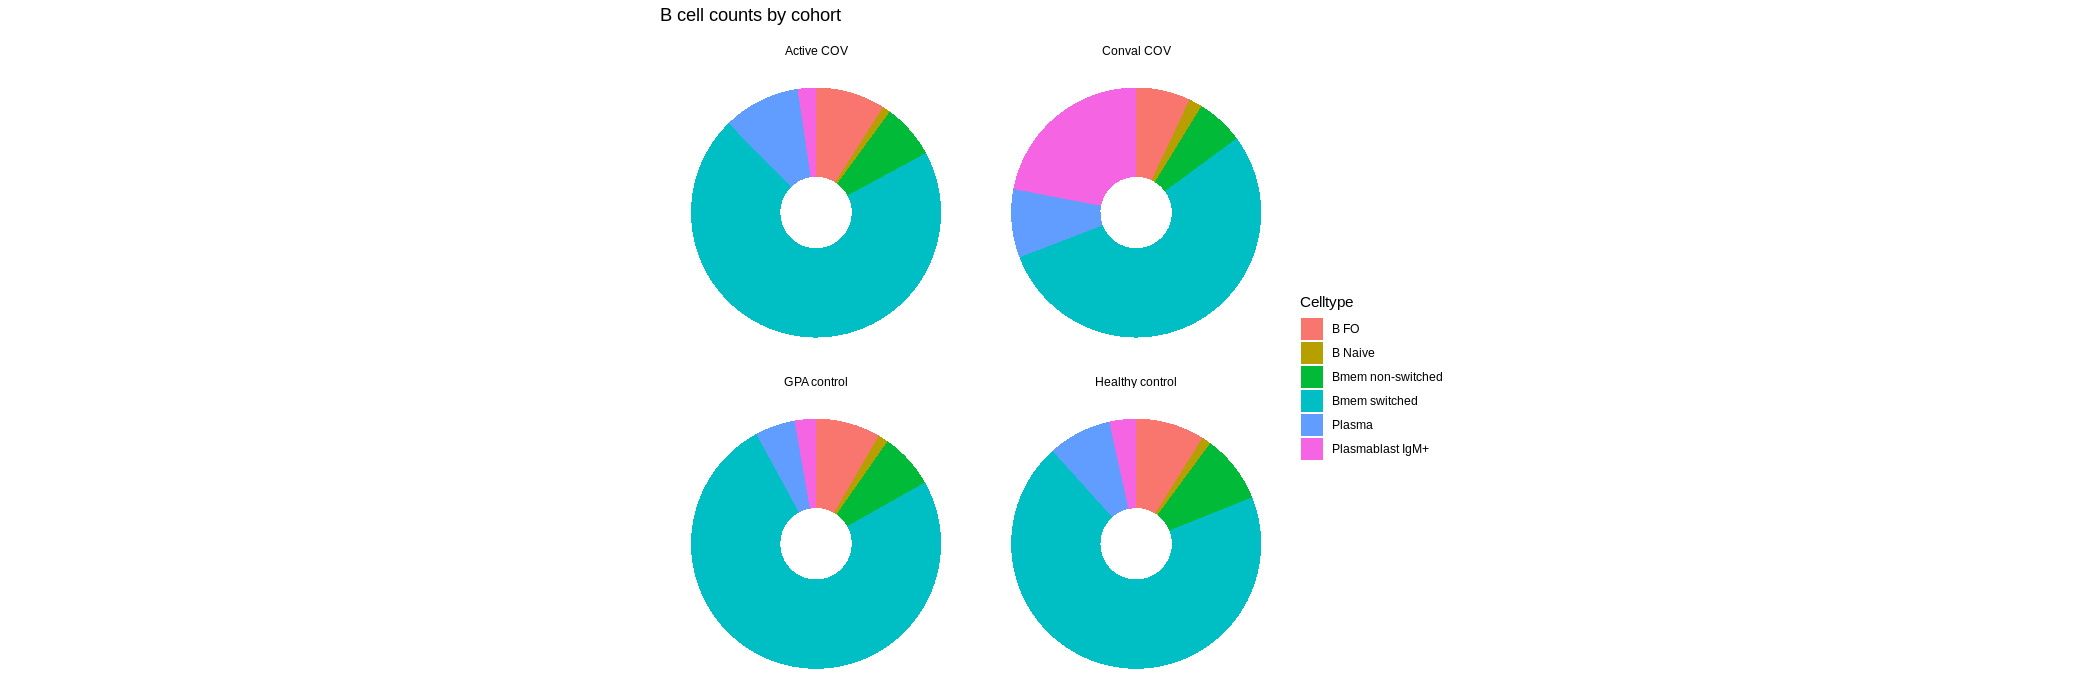

In [75]:
# Data for plot
pdatM = covidpiechartBPlasma %>% 
  group_by(Subcohort) %>% 
  mutate(cc = Cellcount/sum(Cellcount)) %>% 
  arrange(Celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p3 <- ggplot(pdatM, aes(x=cc_cum, y=1, fill=Celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~Subcohort) + ggtitle("B cell counts by cohort", subtitle = "")
p3

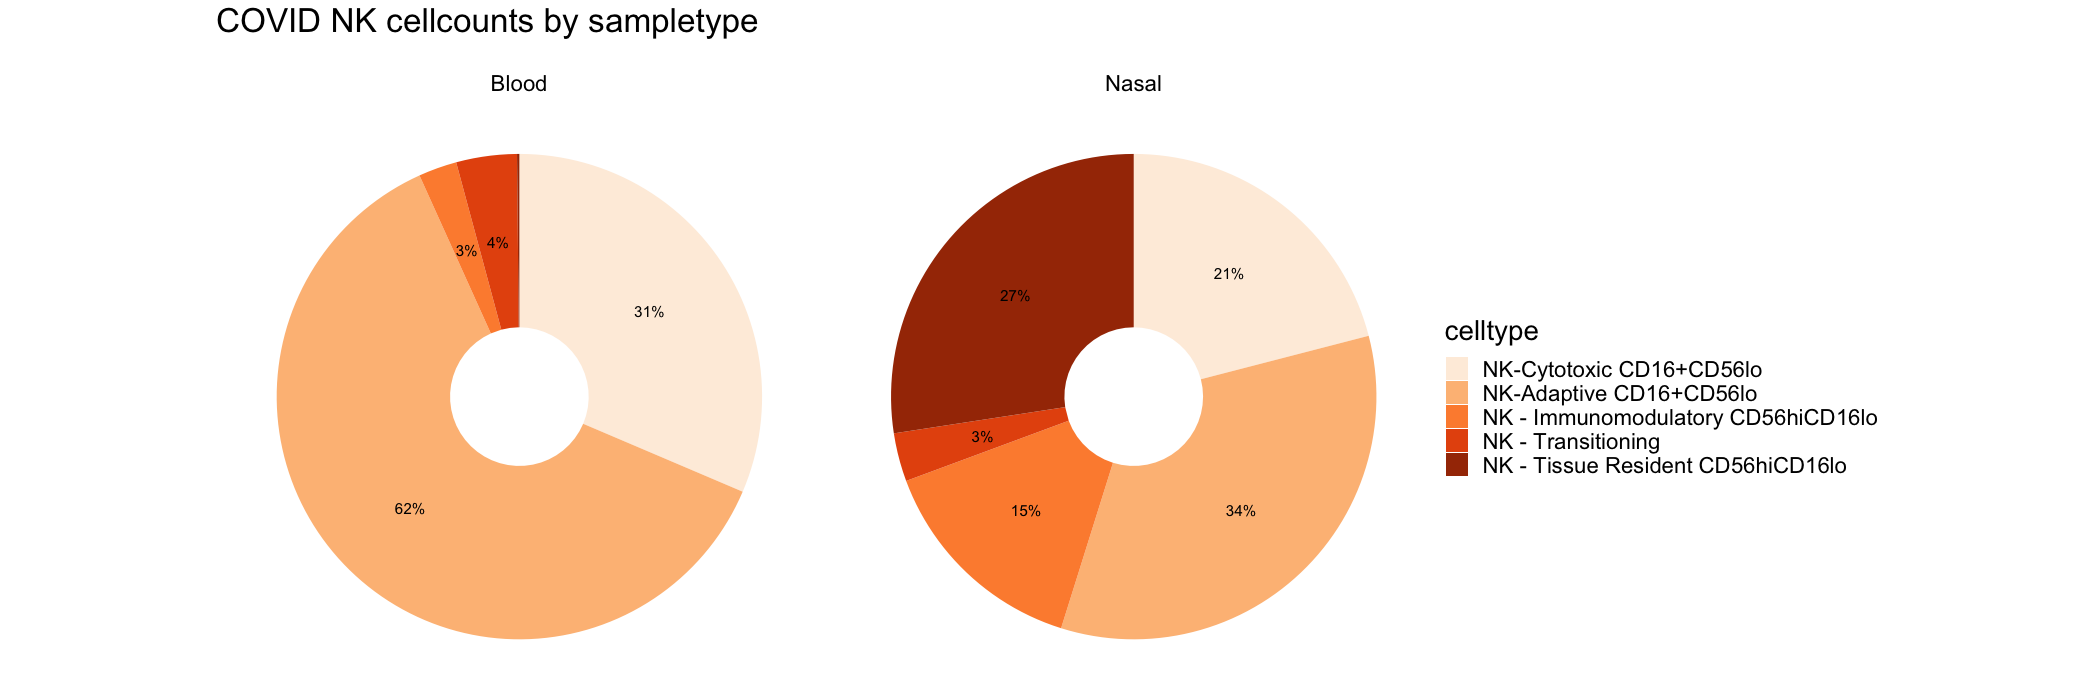

In [33]:
# Data for plot
pdatNK = covidpiechartNKCov %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p1 <- ggplot(pdatNK, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + geom_text(aes(label = paste((round(cc*100)), "%", sep = "")), check_overlap=T) +
scale_fill_brewer(palette = "Oranges") +
  theme_void() + facet_wrap(~sampletype) + ggtitle("COVID NK cellcounts by sampletype", subtitle = "") + theme(text = element_text(size = 20))
p1

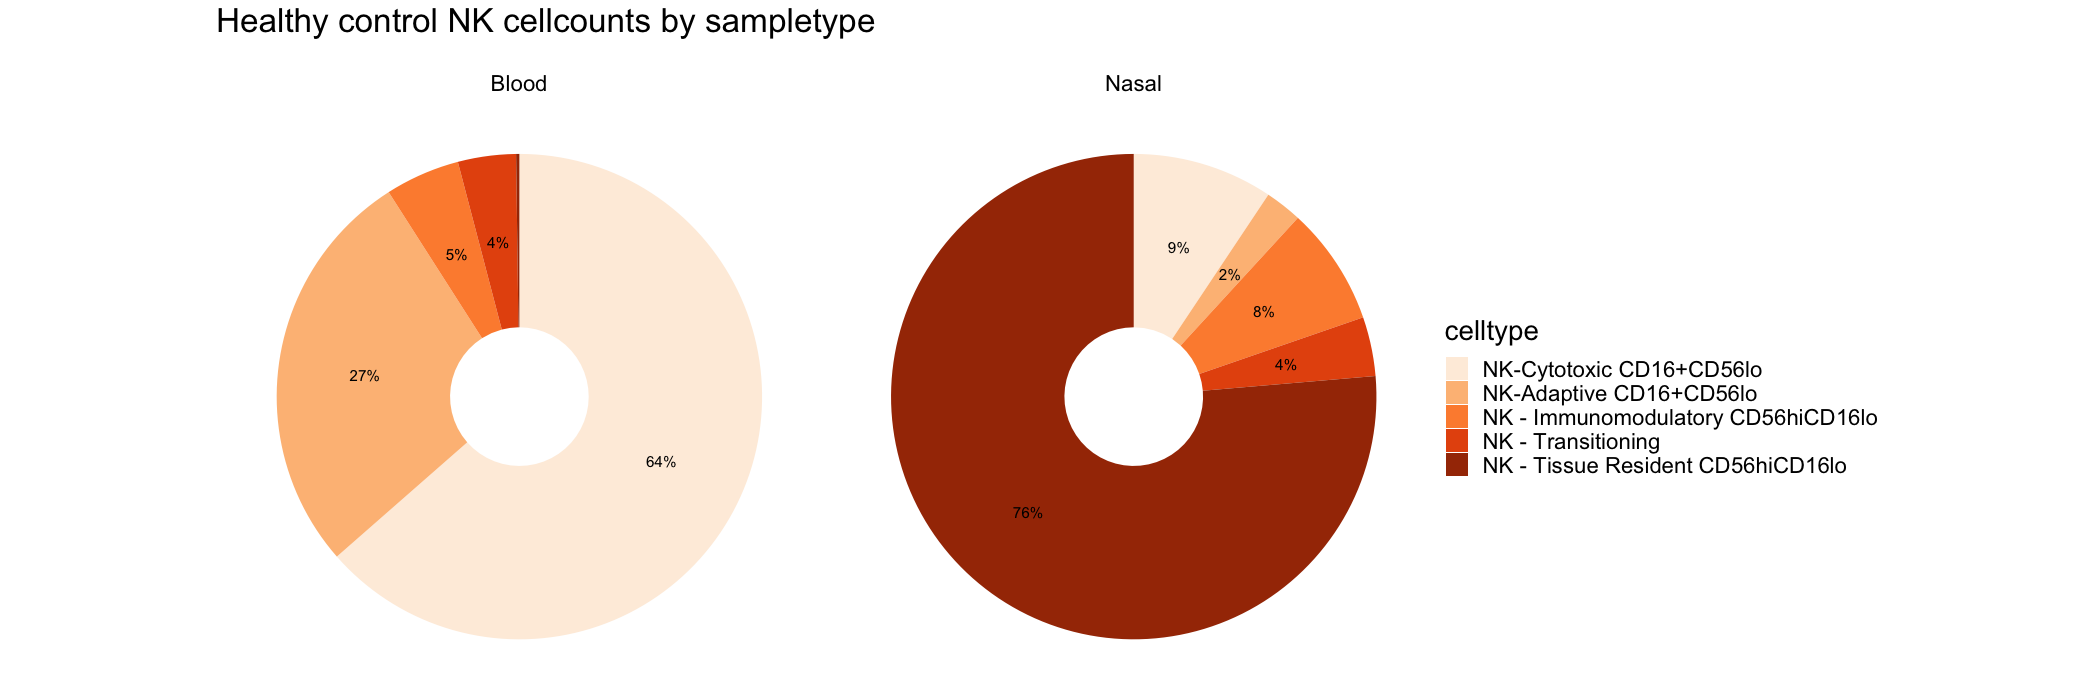

In [34]:
# Data for plot
pdatNK = covidpiechartNKh %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p2 <- ggplot(pdatNK, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + geom_text(aes(label = paste((round(cc*100)), "%", sep = "")), check_overlap=T) +
scale_fill_brewer(palette = "Oranges") +
  theme_void() + facet_wrap(~sampletype) + ggtitle("Healthy control NK cellcounts by sampletype", subtitle = "") + theme(text = element_text(size = 20))
p2

In [35]:
covidpiechartT <- covidpiechartdata %>% filter(broadcelltype %in% c("CD8", "MAIT", "ILC", "gdT"))
covidpiechartT

celltype                        cohort  sampletype cellcount broadcelltype
1  CD8 T-Naive                     COVID   Blood       381      CD8          
2  MAIT                            COVID   Blood       501      MAIT         
3  CD8 T-Naive(Tissue)             COVID   Blood        13      CD8          
4  CD8 T-Cytotoxic Effector Memory COVID   Blood       451      CD8          
5  GammaDelta T-Vg3Vd3             COVID   Blood        24      gdT          
6  CD8 T-Cytotoxic NK-like         COVID   Blood        29      CD8          
7  CD8 T-Central Memory            COVID   Blood       106      CD8          
8  CD8 T-Resident Memory           COVID   Blood         7      CD8          
9  Inate Lymphoid Cell-Type 3      COVID   Blood         1      ILC          
10 GammaDelta T-Vg9Vd2             COVID   Blood        79      gdT          
11 CD8 T-Naive                     Healthy Blood      1019      CD8          
12 MAIT                            Healthy Blood       198      MAIT         
13 CD8 T-Naive(Tissue)             Healthy Blood        37      CD8          
14 CD8 T-Cytotoxic Effector Memory Healthy Blood      1553      CD8          
15 GammaDelta T-Vg3Vd3             Healthy Blood       303      gdT          
16 CD8 T-Cytotoxic NK-like         Healthy Blood       230      CD8          
17 CD8 T-Central Memory            Healthy Blood       371      CD8          
18 CD8 T-Resident Memory           Healthy Blood        26      CD8          
19 Inate Lymphoid Cell-Type 3      Healthy Blood        12      ILC          
20 GammaDelta T-Vg9Vd2             Healthy Blood       470      gdT          
21 CD8 T-Naive                     COVID   Nasal       108      CD8          
22 MAIT                            COVID   Nasal        34      MAIT         
23 CD8 T-Naive(Tissue)             COVID   Nasal        59      CD8          
24 CD8 T-Cytotoxic Effector Memory COVID   Nasal         9      CD8          
25 GammaDelta T-Vg3Vd3             COVID   Nasal         1      gdT          
26 CD8 T-Cytotoxic NK-like         COVID   Nasal         1      CD8          
27 CD8 T-Central Memory            COVID   Nasal       223      CD8          
28 CD8 T-Resident Memory           COVID   Nasal       210      CD8          
29 Inate Lymphoid Cell-Type 3      COVID   Nasal        46      ILC          
30 GammaDelta T-Vg9Vd2             COVID   Nasal         3      gdT          
31 CD8 T-Naive                     Healthy Nasal        45      CD8          
32 MAIT                            Healthy Nasal        26      MAIT         
33 CD8 T-Naive(Tissue)             Healthy Nasal       463      CD8          
34 CD8 T-Cytotoxic Effector Memory Healthy Nasal        16      CD8          
35 GammaDelta T-Vg3Vd3             Healthy Nasal         1      gdT          
36 CD8 T-Cytotoxic NK-like         Healthy Nasal         0      CD8          
37 CD8 T-Central Memory            Healthy Nasal       793      CD8          
38 CD8 T-Resident Memory           Healthy Nasal       662      CD8          
39 Inate Lymphoid Cell-Type 3      Healthy Nasal       187      ILC          
40 GammaDelta T-Vg9Vd2             Healthy Nasal         7      gdT

In [36]:
covidpiechartTCov <- subset(covidpiechartT, cohort == "COVID")
covidpiechartTCov

celltype                        cohort sampletype cellcount broadcelltype
1  CD8 T-Naive                     COVID  Blood      381       CD8          
2  MAIT                            COVID  Blood      501       MAIT         
3  CD8 T-Naive(Tissue)             COVID  Blood       13       CD8          
4  CD8 T-Cytotoxic Effector Memory COVID  Blood      451       CD8          
5  GammaDelta T-Vg3Vd3             COVID  Blood       24       gdT          
6  CD8 T-Cytotoxic NK-like         COVID  Blood       29       CD8          
7  CD8 T-Central Memory            COVID  Blood      106       CD8          
8  CD8 T-Resident Memory           COVID  Blood        7       CD8          
9  Inate Lymphoid Cell-Type 3      COVID  Blood        1       ILC          
10 GammaDelta T-Vg9Vd2             COVID  Blood       79       gdT          
21 CD8 T-Naive                     COVID  Nasal      108       CD8          
22 MAIT                            COVID  Nasal       34       MAIT         
23 CD8 T-Naive(Tissue)             COVID  Nasal       59       CD8          
24 CD8 T-Cytotoxic Effector Memory COVID  Nasal        9       CD8          
25 GammaDelta T-Vg3Vd3             COVID  Nasal        1       gdT          
26 CD8 T-Cytotoxic NK-like         COVID  Nasal        1       CD8          
27 CD8 T-Central Memory            COVID  Nasal      223       CD8          
28 CD8 T-Resident Memory           COVID  Nasal      210       CD8          
29 Inate Lymphoid Cell-Type 3      COVID  Nasal       46       ILC          
30 GammaDelta T-Vg9Vd2             COVID  Nasal        3       gdT

In [37]:
covidpiechartTh <- subset(covidpiechartT, cohort == "Healthy")
covidpiechartTh

celltype                        cohort  sampletype cellcount broadcelltype
11 CD8 T-Naive                     Healthy Blood      1019      CD8          
12 MAIT                            Healthy Blood       198      MAIT         
13 CD8 T-Naive(Tissue)             Healthy Blood        37      CD8          
14 CD8 T-Cytotoxic Effector Memory Healthy Blood      1553      CD8          
15 GammaDelta T-Vg3Vd3             Healthy Blood       303      gdT          
16 CD8 T-Cytotoxic NK-like         Healthy Blood       230      CD8          
17 CD8 T-Central Memory            Healthy Blood       371      CD8          
18 CD8 T-Resident Memory           Healthy Blood        26      CD8          
19 Inate Lymphoid Cell-Type 3      Healthy Blood        12      ILC          
20 GammaDelta T-Vg9Vd2             Healthy Blood       470      gdT          
31 CD8 T-Naive                     Healthy Nasal        45      CD8          
32 MAIT                            Healthy Nasal        26      MAIT         
33 CD8 T-Naive(Tissue)             Healthy Nasal       463      CD8          
34 CD8 T-Cytotoxic Effector Memory Healthy Nasal        16      CD8          
35 GammaDelta T-Vg3Vd3             Healthy Nasal         1      gdT          
36 CD8 T-Cytotoxic NK-like         Healthy Nasal         0      CD8          
37 CD8 T-Central Memory            Healthy Nasal       793      CD8          
38 CD8 T-Resident Memory           Healthy Nasal       662      CD8          
39 Inate Lymphoid Cell-Type 3      Healthy Nasal       187      ILC          
40 GammaDelta T-Vg9Vd2             Healthy Nasal         7      gdT

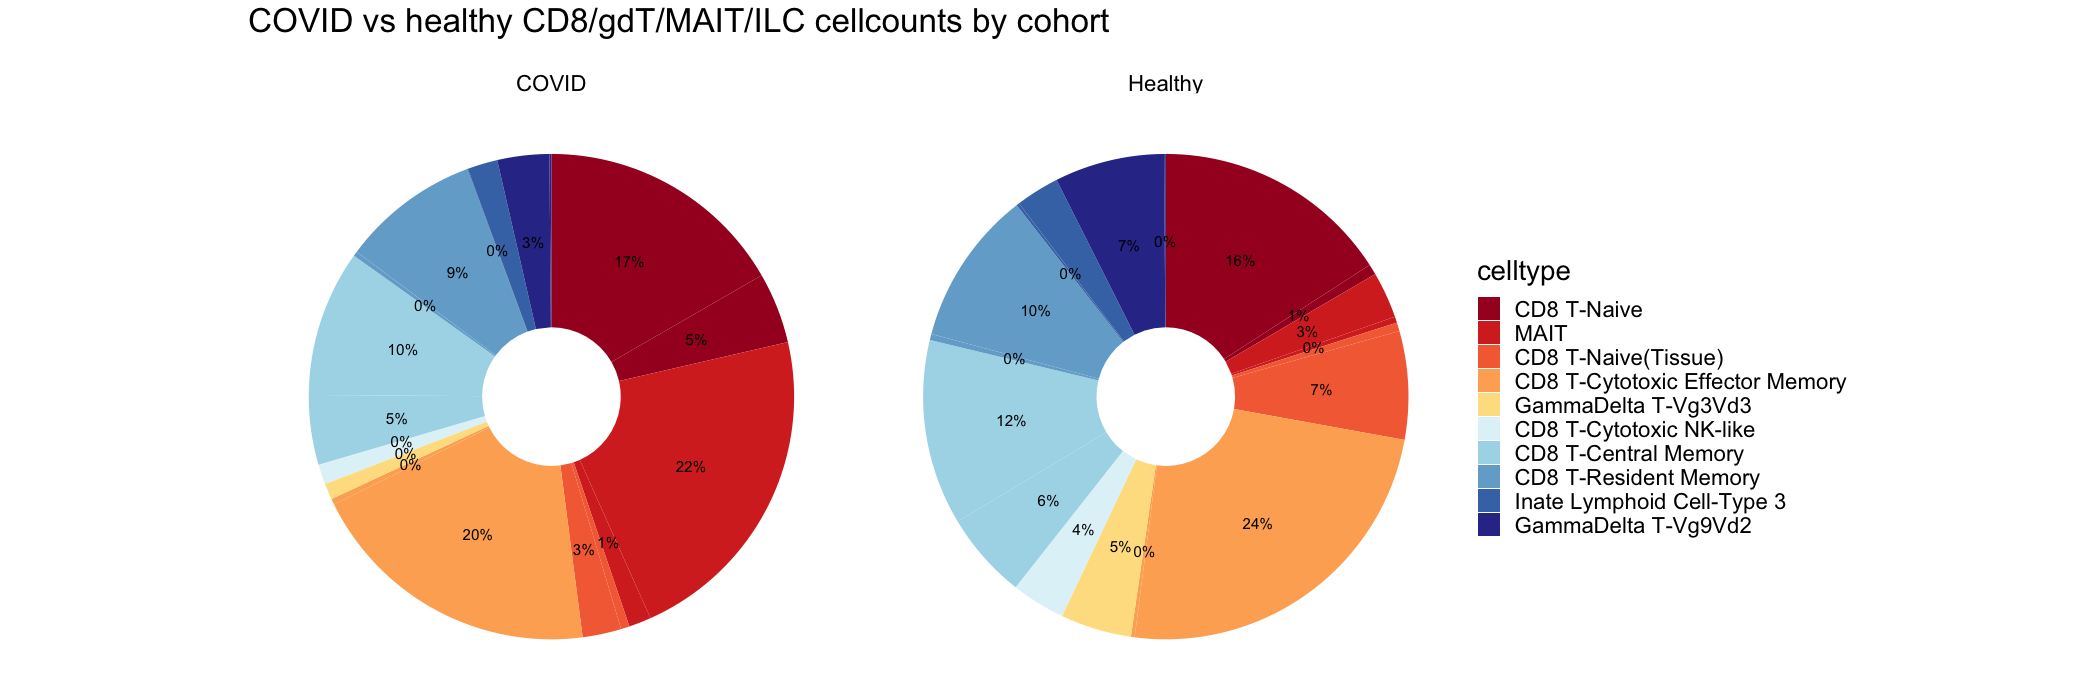

In [38]:
# Data for plot
pdatT = covidpiechartT %>% 
  group_by(cohort) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p4 <- ggplot(pdatT, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + geom_text(aes(label = paste((round(cc*100)), "%", sep = "")), check_overlap=T) +
scale_fill_brewer(palette = "RdYlBu") +
  theme_void() + facet_wrap(~cohort) + ggtitle("COVID vs healthy CD8/gdT/MAIT/ILC cellcounts by cohort", subtitle = "") + theme(text = element_text(size = 20))
p4

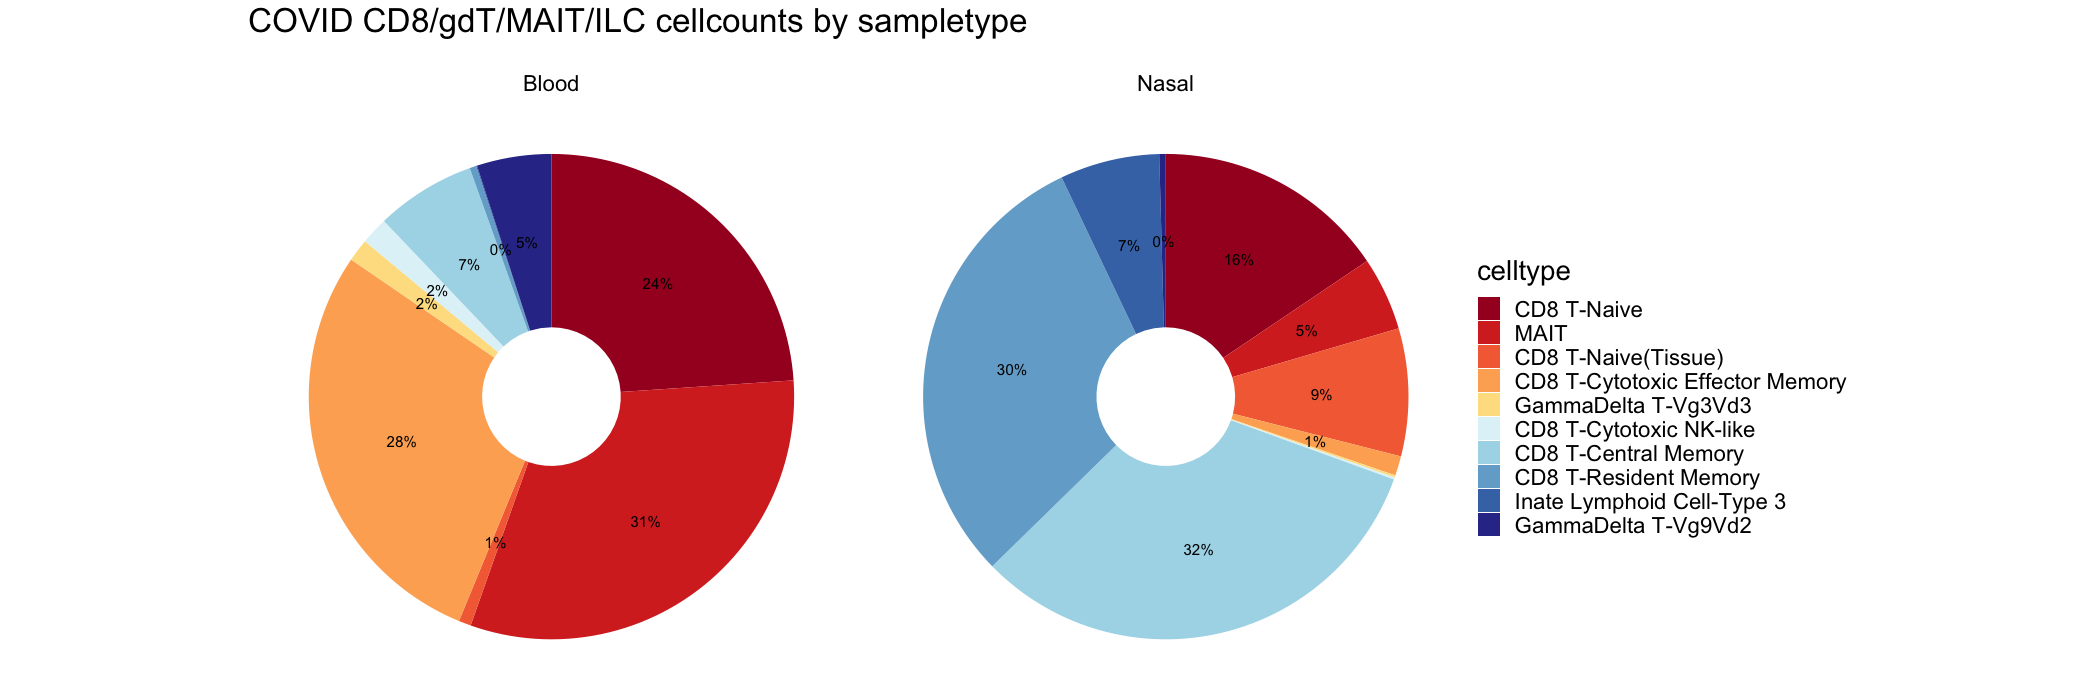

In [39]:
# Data for plot
pdatT = covidpiechartTCov %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p3 <- ggplot(pdatT, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + geom_text(aes(label = paste((round(cc*100)), "%", sep = "")), check_overlap=T) +
scale_fill_brewer(palette = "RdYlBu") +
  theme_void() + facet_wrap(~sampletype) + ggtitle("COVID CD8/gdT/MAIT/ILC cellcounts by sampletype ", subtitle = "") + theme(text = element_text(size = 20))
p3

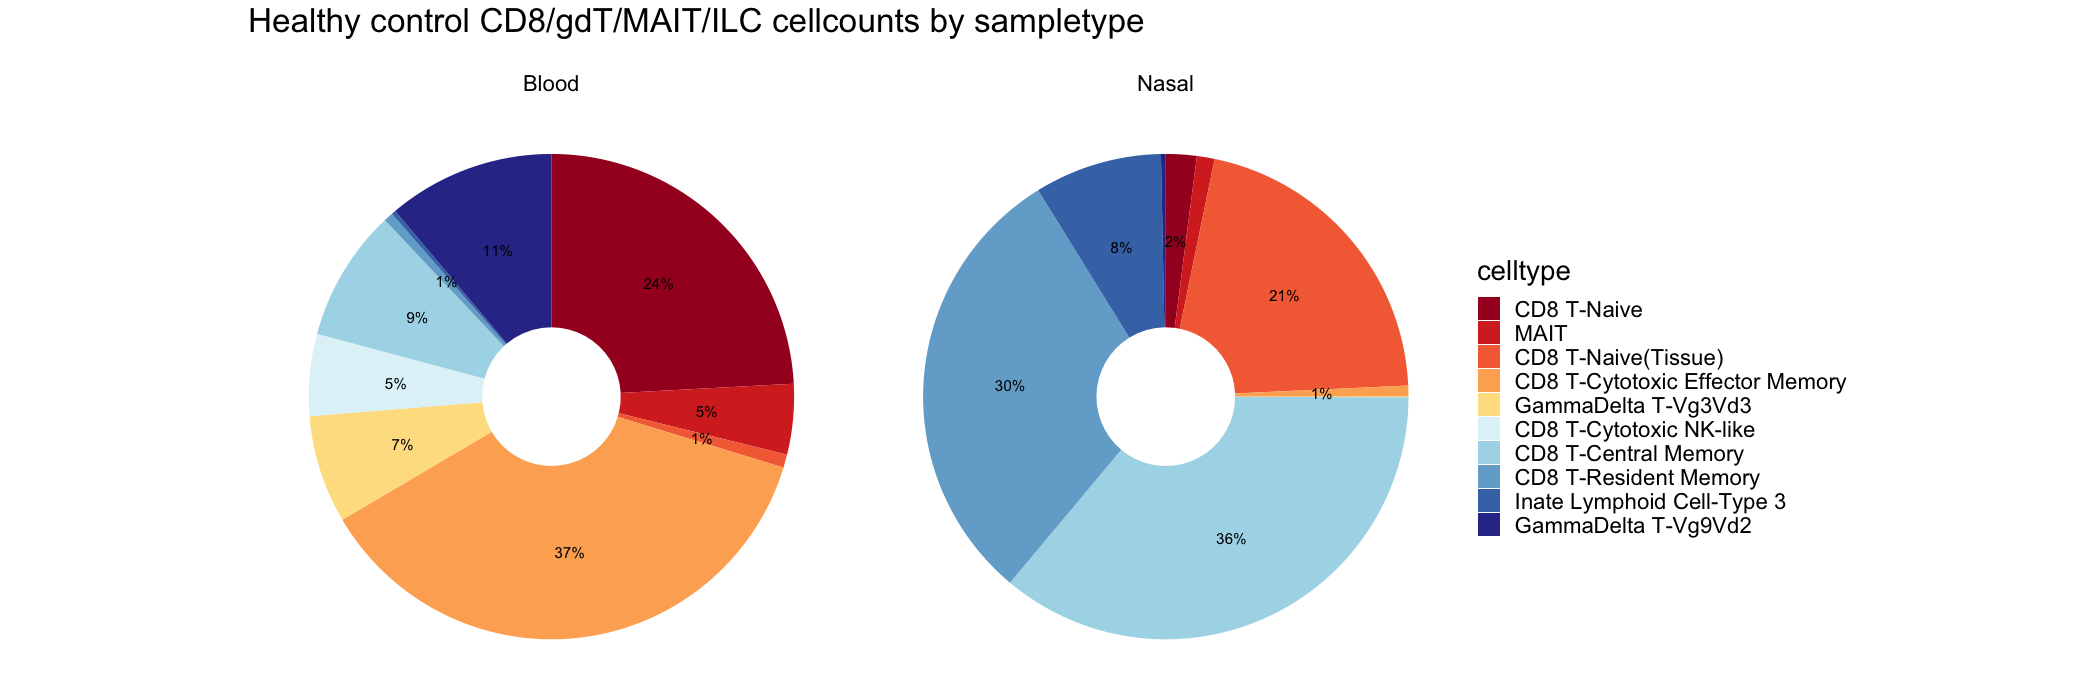

In [40]:
# Data for plot
pdatT = covidpiechartTh %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

p4 <- ggplot(pdatT, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + geom_text(aes(label = paste((round(cc*100)), "%", sep = "")), check_overlap=T) +
scale_fill_brewer(palette = "RdYlBu") +
  theme_void() + facet_wrap(~sampletype) + ggtitle("Healthy control CD8/gdT/MAIT/ILC cellcounts by sampletype", subtitle = "") + theme(text = element_text(size = 20))
p4

In [41]:
library(cowplot)

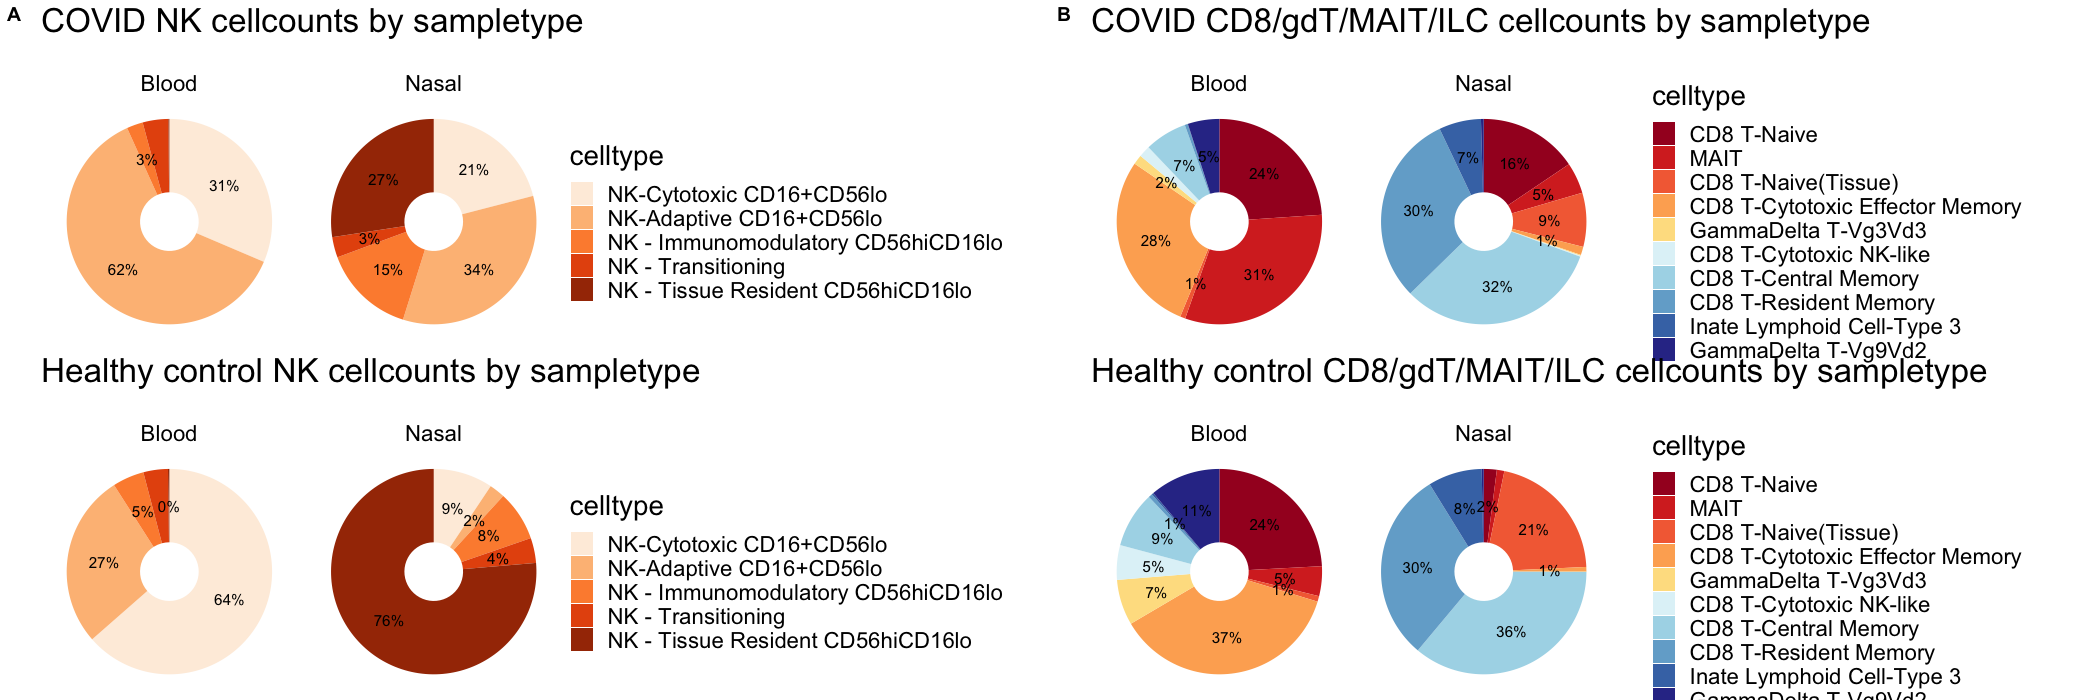

In [42]:
plot_grid(p1, p3, p2, p4, labels = c('A', 'B', '', ''), align = "v")

In [43]:
?plot_grid

In [44]:
pdf("1st year report figures/counts piecharts COVIDvhealthy.pdf", width = 20, height = 9, title = "Nasal cell yields in subjects with COVID-19 (n=3)")
plot_grid(p1, p3, p2, p4, labels = c('A', 'B', '', ''), align = "v")
dev.off()

pdf 
  2

In [45]:
#split by patient and nasal/blood.
#Covid + healthy pie to show split in number of cells + splitbar to show overall numbers of cells. 

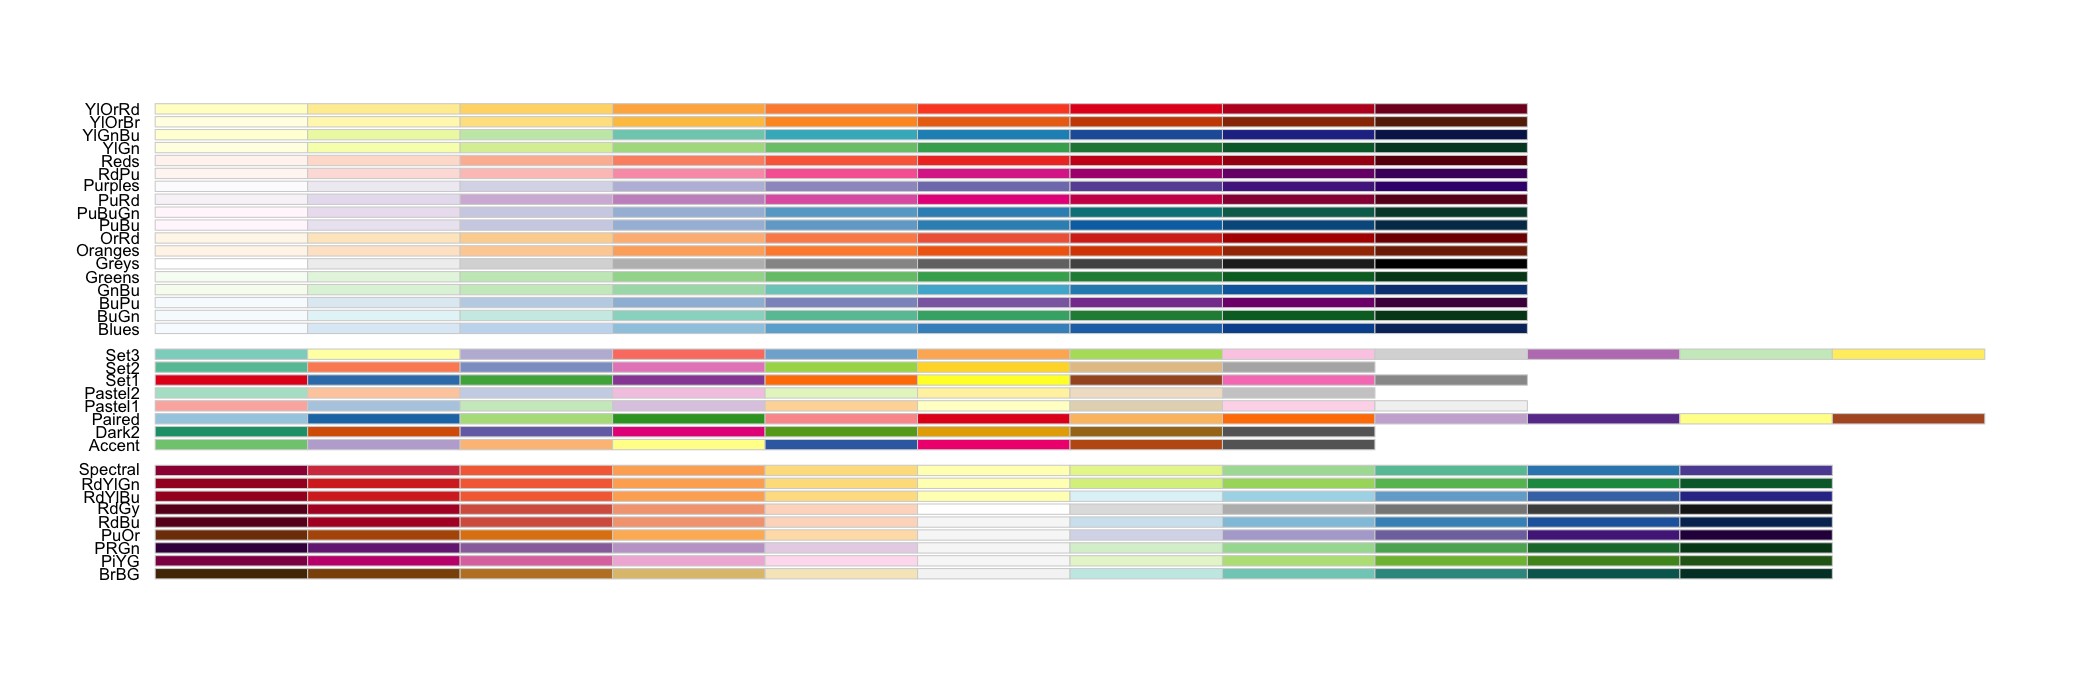

In [46]:
RColorBrewer::display.brewer.all()

In [49]:
covidpiechartdatapt <- data.frame(table(Idents(data), data@meta.data$patient, data@meta.data$cohort, data@meta.data$age_group))

In [60]:
levels(data@meta.data$patient)

[1] "1"   "2"   "3"   "C17" "C19" "C20" "C21" "C24" "C26"

In [65]:
data@meta.data[data@meta.data$patient == "C17", data@meta.data$agegroup]

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”
Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”
Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”
Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


Sample_Fq_18_AAACCTGCAAACTGTC-0
Sample_Fq_18_AAACCTGCAAGGTTTC-0
Sample_Fq_18_AAACCTGCACGAAACG-0
Sample_Fq_18_AAACCTGCATACGCCG-0
Sample_Fq_18_AAACCTGGTAAGTAGT-0
Sample_Fq_18_AAACCTGGTATGGTTC-0
Sample_Fq_18_AAACCTGGTTATCCGA-0
Sample_Fq_18_AAACCTGGTTGTCGCG-0
Sample_Fq_18_AAACCTGTCAACACAC-0
Sample_Fq_18_AAACCTGTCACCCTCA-0
Sample_Fq_18_AAACCTGTCCTTGGTC-0
Sample_Fq_18_AAACCTGTCTCCAACC-0
Sample_Fq_18_AAACGGGAGAAGGCCT-0
Sample_Fq_18_AAACGGGAGCTTCGCG-0
Sample_Fq_18_AAACGGGAGTTAACGA-0
Sample_Fq_18_AAACGGGCACGAAGCA-0
Sample_Fq_18_AAACGGGCATCGGAAG-0
Sample_Fq_18_AAACGGGGTAAATACG-0
Sample_Fq_18_AAACGGGGTAAGAGAG-0
Sample_Fq_18_AAACGGGGTGTGGCTC-0
Sample_Fq_18_AAACGGGTCAAACCGT-0
Sample_Fq_18_AAAGATGCACTATCTT-0
Sample_Fq_18_AAAGATGGTACTCAAC-0
Sample_Fq_18_AAAGATGGTCTAACGT-0
Sample_Fq_18_AAAGATGTCTCACATT-0
Sample_Fq_18_AAAGATGTCTGCCCTA-0
Sample_Fq_18_AAAGCAAAGATGGCGT-0
Sample_Fq_18_AAAGCAAAGGAGCGAG-0
Sample_Fq_18_AAAGCAACACATCTTT-0
Sample_Fq_18_AAAGCAACAGCTGCTG-0
⋮                              
Sample_Fq_19_TTTGCGCAGGGAAACA-0
Sample_Fq_19_TTTGCGCCAACGATCT-0
Sample_Fq_19_TTTGCGCCACAGACTT-0
Sample_Fq_19_TTTGCGCCACCGCTAG-0
Sample_Fq_19_TTTGCGCCACTCTGTC-0
Sample_Fq_19_TTTGCGCCAGTCAGCC-0
Sample_Fq_19_TTTGCGCCATGTAAGA-0
Sample_Fq_19_TTTGCGCGTAAGGATT-0
Sample_Fq_19_TTTGCGCGTACACCGC-0
Sample_Fq_19_TTTGCGCGTCATATCG-0
Sample_Fq_19_TTTGCGCGTCATCGGC-0
Sample_Fq_19_TTTGCGCTCAACACAC-0
Sample_Fq_19_TTTGTCAAGACCACGA-0
Sample_Fq_19_TTTGTCAAGACTAAGT-0
Sample_Fq_19_TTTGTCAAGAGTGACC-0
Sample_Fq_19_TTTGTCAAGCCAACAG-0
Sample_Fq_19_TTTGTCAAGGCATGGT-0
Sample_Fq_19_TTTGTCAAGGGTGTTG-0
Sample_Fq_19_TTTGTCAAGGTGGGTT-0
Sample_Fq_19_TTTGTCAAGTGCCATT-0
Sample_Fq_19_TTTGTCAAGTGGAGAA-0
Sample_Fq_19_TTTGTCACAAACGTGG-0
Sample_Fq_19_TTTGTCACAATTCCTT-0
Sample_Fq_19_TTTGTCACACAAGCCC-0
Sample_Fq_19_TTTGTCACACCTATCC-0
Sample_Fq_19_TTTGTCACAGCCAATT-0
Sample_Fq_19_TTTGTCACAGCTTAAC-0
Sample_Fq_19_TTTGTCAGTGACGCCT-0
Sample_Fq_19_TTTGTCAGTTAGATGA-0
Sample_Fq_19_TTTGTCAGTTCCCGAG-0

In [54]:
colnames(covidpiechartdatapt) <- c("celltype", "patient","disease", "agegroup", "cellcount")

In [55]:
covidpiechartdatapt

celltype                           patient disease type agegroup cellcount
1   NK-Cytotoxic CD16+CD56lo           1       COVID        Middle      0     
2   NK-Adaptive CD16+CD56lo            1       COVID        Middle      0     
3   CD8 T-Naive                        1       COVID        Middle      0     
4   MAIT                               1       COVID        Middle      0     
5   CD8 T-Naive(Tissue)                1       COVID        Middle      0     
6   CD8 T-Cytotoxic Effector Memory    1       COVID        Middle      0     
7   GammaDelta T-Vg3Vd3                1       COVID        Middle      0     
8   CD8 T-Cytotoxic NK-like            1       COVID        Middle      0     
9   CD8 T-Central Memory               1       COVID        Middle      0     
10  CD8 T-Resident Memory              1       COVID        Middle      0     
11  Inate Lymphoid Cell-Type 3         1       COVID        Middle      0     
12  NK - Immunomodulatory CD56hiCD16lo 1       COVID        Middle      0     
13  NK - Transitioning                 1       COVID        Middle      0     
14  NK - Tissue Resident CD56hiCD16lo  1       COVID        Middle      0     
15  GammaDelta T-Vg9Vd2                1       COVID        Middle      0     
16  NK-Cytotoxic CD16+CD56lo           2       COVID        Middle    298     
17  NK-Adaptive CD16+CD56lo            2       COVID        Middle   1164     
18  CD8 T-Naive                        2       COVID        Middle     80     
19  MAIT                               2       COVID        Middle    124     
20  CD8 T-Naive(Tissue)                2       COVID        Middle     14     
21  CD8 T-Cytotoxic Effector Memory    2       COVID        Middle    320     
22  GammaDelta T-Vg3Vd3                2       COVID        Middle     14     
23  CD8 T-Cytotoxic NK-like            2       COVID        Middle     16     
24  CD8 T-Central Memory               2       COVID        Middle     58     
25  CD8 T-Resident Memory              2       COVID        Middle    104     
26  Inate Lymphoid Cell-Type 3         2       COVID        Middle      5     
27  NK - Immunomodulatory CD56hiCD16lo 2       COVID        Middle     12     
28  NK - Transitioning                 2       COVID        Middle     33     
29  NK - Tissue Resident CD56hiCD16lo  2       COVID        Middle      8     
30  GammaDelta T-Vg9Vd2                2       COVID        Middle     15     
⋮   ⋮                                  ⋮       ⋮            ⋮        ⋮        
781 NK-Cytotoxic CD16+CD56lo           C24     Healthy      Young      0      
782 NK-Adaptive CD16+CD56lo            C24     Healthy      Young      0      
783 CD8 T-Naive                        C24     Healthy      Young      0      
784 MAIT                               C24     Healthy      Young      0      
785 CD8 T-Naive(Tissue)                C24     Healthy      Young      0      
786 CD8 T-Cytotoxic Effector Memory    C24     Healthy      Young      0      
787 GammaDelta T-Vg3Vd3                C24     Healthy      Young      0      
788 CD8 T-Cytotoxic NK-like            C24     Healthy      Young      0      
789 CD8 T-Central Memory               C24     Healthy      Young      0      
790 CD8 T-Resident Memory              C24     Healthy      Young      0      
791 Inate Lymphoid Cell-Type 3         C24     Healthy      Young      0      
792 NK - Immunomodulatory CD56hiCD16lo C24     Healthy      Young      0      
793 NK - Transitioning                 C24     Healthy      Young      0      
794 NK - Tissue Resident CD56hiCD16lo  C24     Healthy      Young      0      
795 GammaDelta T-Vg9Vd2                C24     Healthy      Young      0      
796 NK-Cytotoxic CD16+CD56lo           C26     Healthy      Young      3      
797 NK-Adaptive CD16+CD56lo            C26     Healthy      Young      2      
798 CD8 T-Naive                        C26     Healthy      Young     13      
799 MAIT                               C26     Healthy

In [75]:
covidpiechart2 <- subset(covidpiechartdatapt, patient == "C21")
covidpiechart2

celltype                           patient disease type agegroup cellcount
91  NK-Cytotoxic CD16+CD56lo           C21     COVID        Middle   0        
92  NK-Adaptive CD16+CD56lo            C21     COVID        Middle   0        
93  CD8 T-Naive                        C21     COVID        Middle   0        
94  MAIT                               C21     COVID        Middle   0        
95  CD8 T-Naive(Tissue)                C21     COVID        Middle   0        
96  CD8 T-Cytotoxic Effector Memory    C21     COVID        Middle   0        
97  GammaDelta T-Vg3Vd3                C21     COVID        Middle   0        
98  CD8 T-Cytotoxic NK-like            C21     COVID        Middle   0        
99  CD8 T-Central Memory               C21     COVID        Middle   0        
100 CD8 T-Resident Memory              C21     COVID        Middle   0        
101 Inate Lymphoid Cell-Type 3         C21     COVID        Middle   0        
102 NK - Immunomodulatory CD56hiCD16lo C21     COVID        Middle   0        
103 NK - Transitioning                 C21     COVID        Middle   0        
104 NK - Tissue Resident CD56hiCD16lo  C21     COVID        Middle   0        
105 GammaDelta T-Vg9Vd2                C21     COVID        Middle   0        
226 NK-Cytotoxic CD16+CD56lo           C21     Healthy      Middle   0        
227 NK-Adaptive CD16+CD56lo            C21     Healthy      Middle   0        
228 CD8 T-Naive                        C21     Healthy      Middle   0        
229 MAIT                               C21     Healthy      Middle   0        
230 CD8 T-Naive(Tissue)                C21     Healthy      Middle   0        
231 CD8 T-Cytotoxic Effector Memory    C21     Healthy      Middle   0        
232 GammaDelta T-Vg3Vd3                C21     Healthy      Middle   0        
233 CD8 T-Cytotoxic NK-like            C21     Healthy      Middle   0        
234 CD8 T-Central Memory               C21     Healthy      Middle   0        
235 CD8 T-Resident Memory              C21     Healthy      Middle   0        
236 Inate Lymphoid Cell-Type 3         C21     Healthy      Middle   0        
237 NK - Immunomodulatory CD56hiCD16lo C21     Healthy      Middle   0        
238 NK - Transitioning                 C21     Healthy      Middle   0        
239 NK - Tissue Resident CD56hiCD16lo  C21     Healthy      Middle   0        
240 GammaDelta T-Vg9Vd2                C21     Healthy      Middle   0        
⋮   ⋮                                  ⋮       ⋮            ⋮        ⋮        
631 NK-Cytotoxic CD16+CD56lo           C21     COVID        Young    0        
632 NK-Adaptive CD16+CD56lo            C21     COVID        Young    0        
633 CD8 T-Naive                        C21     COVID        Young    0        
634 MAIT                               C21     COVID        Young    0        
635 CD8 T-Naive(Tissue)                C21     COVID        Young    0        
636 CD8 T-Cytotoxic Effector Memory    C21     COVID        Young    0        
637 GammaDelta T-Vg3Vd3                C21     COVID        Young    0        
638 CD8 T-Cytotoxic NK-like            C21     COVID        Young    0        
639 CD8 T-Central Memory               C21     COVID        Young    0        
640 CD8 T-Resident Memory              C21     COVID        Young    0        
641 Inate Lymphoid Cell-Type 3         C21     COVID        Young    0        
642 NK - Immunomodulatory CD56hiCD16lo C21     COVID        Young    0        
643 NK - Transitioning                 C21     COVID        Young    0        
644 NK - Tissue Resident CD56hiCD16lo  C21     COVID        Young    0        
645 GammaDelta T-Vg9Vd2                C21     COVID        Young    0        
766 NK-Cytotoxic CD16+CD56lo           C21     Healthy      Young    0        
767 NK-Adaptive CD16+CD56lo            C21     Healthy      Young    0        
768 CD8 T-Naive                        C21     Healthy      Young    0        
769 MAIT                               C21     Healthy

In [56]:
summary(covidpiechartdatapt)

                            celltype      patient     disease type   agegroup  
 NK-Cytotoxic CD16+CD56lo       : 54   1      : 90   COVID  :405   Middle:270  
 NK-Adaptive CD16+CD56lo        : 54   2      : 90   Healthy:405   Old   :270  
 CD8 T-Naive                    : 54   3      : 90                 Young :270  
 MAIT                           : 54   C17    : 90                             
 CD8 T-Naive(Tissue)            : 54   C19    : 90                             
 CD8 T-Cytotoxic Effector Memory: 54   C20    : 90                             
 (Other)                        :486   (Other):270                             
   cellcount      
 Min.   :   0.00  
 1st Qu.:   0.00  
 Median :   0.00  
 Mean   :  17.51  
 3rd Qu.:   0.00  
 Max.   :1164.00  
                  

In [56]:
covidpiechartptNK <- covidpiechartdatapt %>% filter(celltype %in% c("NK - Immunomodulatory CD56hiCD16lo", 
                                                                  "NK - Tissue Resident CD56hiCD16lo", "NK - Transitioning",
                                                                 "NK-Cytotoxic CD16+CD56lo", "NK-Adaptive CD16+CD56lo"))
covidpiechartptNK

celltype                           patient cellcount
1  NK-Cytotoxic CD16+CD56lo           1          5     
2  NK-Adaptive CD16+CD56lo            1         13     
3  NK - Immunomodulatory CD56hiCD16lo 1          2     
4  NK - Transitioning                 1          0     
5  NK - Tissue Resident CD56hiCD16lo  1          1     
6  NK-Cytotoxic CD16+CD56lo           2        298     
7  NK-Adaptive CD16+CD56lo            2       1164     
8  NK - Immunomodulatory CD56hiCD16lo 2         12     
9  NK - Transitioning                 2         33     
10 NK - Tissue Resident CD56hiCD16lo  2          8     
11 NK-Cytotoxic CD16+CD56lo           3        324     
12 NK-Adaptive CD16+CD56lo            3         53     
13 NK - Immunomodulatory CD56hiCD16lo 3         45     
14 NK - Transitioning                 3         48     
15 NK - Tissue Resident CD56hiCD16lo  3         11     
16 NK-Cytotoxic CD16+CD56lo           C17      269     
17 NK-Adaptive CD16+CD56lo            C17       35     
18 NK - Immunomodulatory CD56hiCD16lo C17       72     
19 NK - Transitioning                 C17       32     
20 NK - Tissue Resident CD56hiCD16lo  C17       91     
21 NK-Cytotoxic CD16+CD56lo           C19      792     
22 NK-Adaptive CD16+CD56lo            C19      125     
23 NK - Immunomodulatory CD56hiCD16lo C19       41     
24 NK - Transitioning                 C19       41     
25 NK - Tissue Resident CD56hiCD16lo  C19       41     
26 NK-Cytotoxic CD16+CD56lo           C20      442     
27 NK-Adaptive CD16+CD56lo            C20      316     
28 NK - Immunomodulatory CD56hiCD16lo C20        6     
29 NK - Transitioning                 C20       28     
30 NK - Tissue Resident CD56hiCD16lo  C20        5     
31 NK-Cytotoxic CD16+CD56lo           C21      192     
32 NK-Adaptive CD16+CD56lo            C21      378     
33 NK - Immunomodulatory CD56hiCD16lo C21       18     
34 NK - Transitioning                 C21       20     
35 NK - Tissue Resident CD56hiCD16lo  C21       19     
36 NK-Cytotoxic CD16+CD56lo           C24      392     
37 NK-Adaptive CD16+CD56lo            C24       42     
38 NK - Immunomodulatory CD56hiCD16lo C24       40     
39 NK - Transitioning                 C24       13     
40 NK - Tissue Resident CD56hiCD16lo  C24        3     
41 NK-Cytotoxic CD16+CD56lo           C26        3     
42 NK-Adaptive CD16+CD56lo            C26        2     
43 NK - Immunomodulatory CD56hiCD16lo C26        1     
44 NK - Transitioning                 C26        0     
45 NK - Tissue Resident CD56hiCD16lo  C26        3

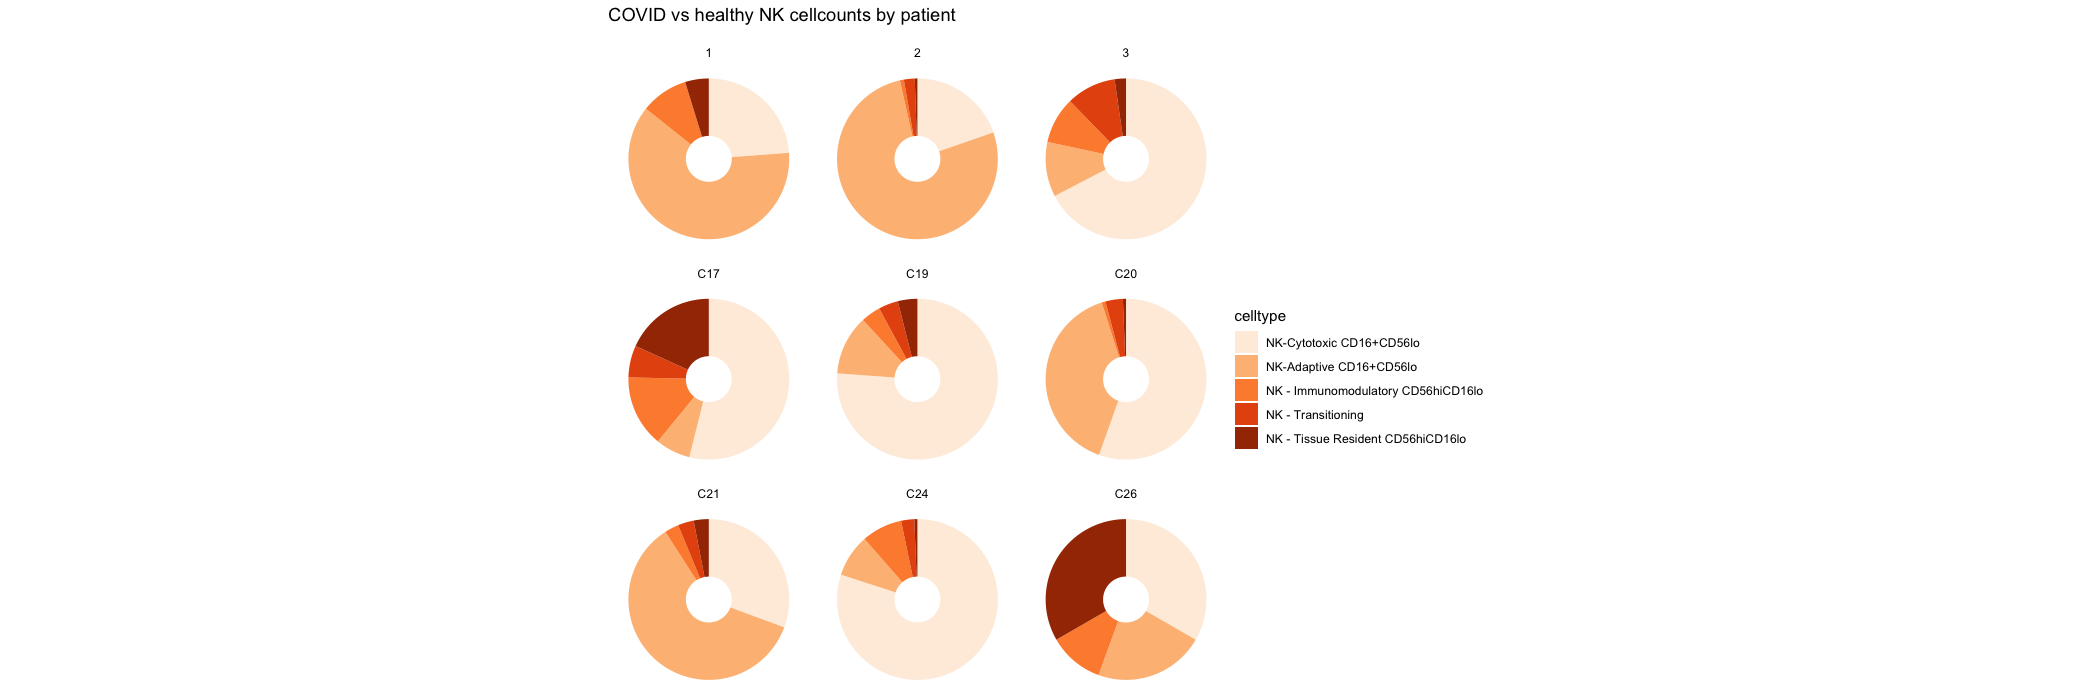

In [57]:

# Data for plot
pdatNKpt = covidpiechartptNK %>% 
  group_by(patient) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatNKpt, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + scale_fill_brewer(palette = "Oranges") +
  theme_void() + facet_wrap(~patient) + ggtitle("COVID vs healthy NK cellcounts by patient", subtitle = "")

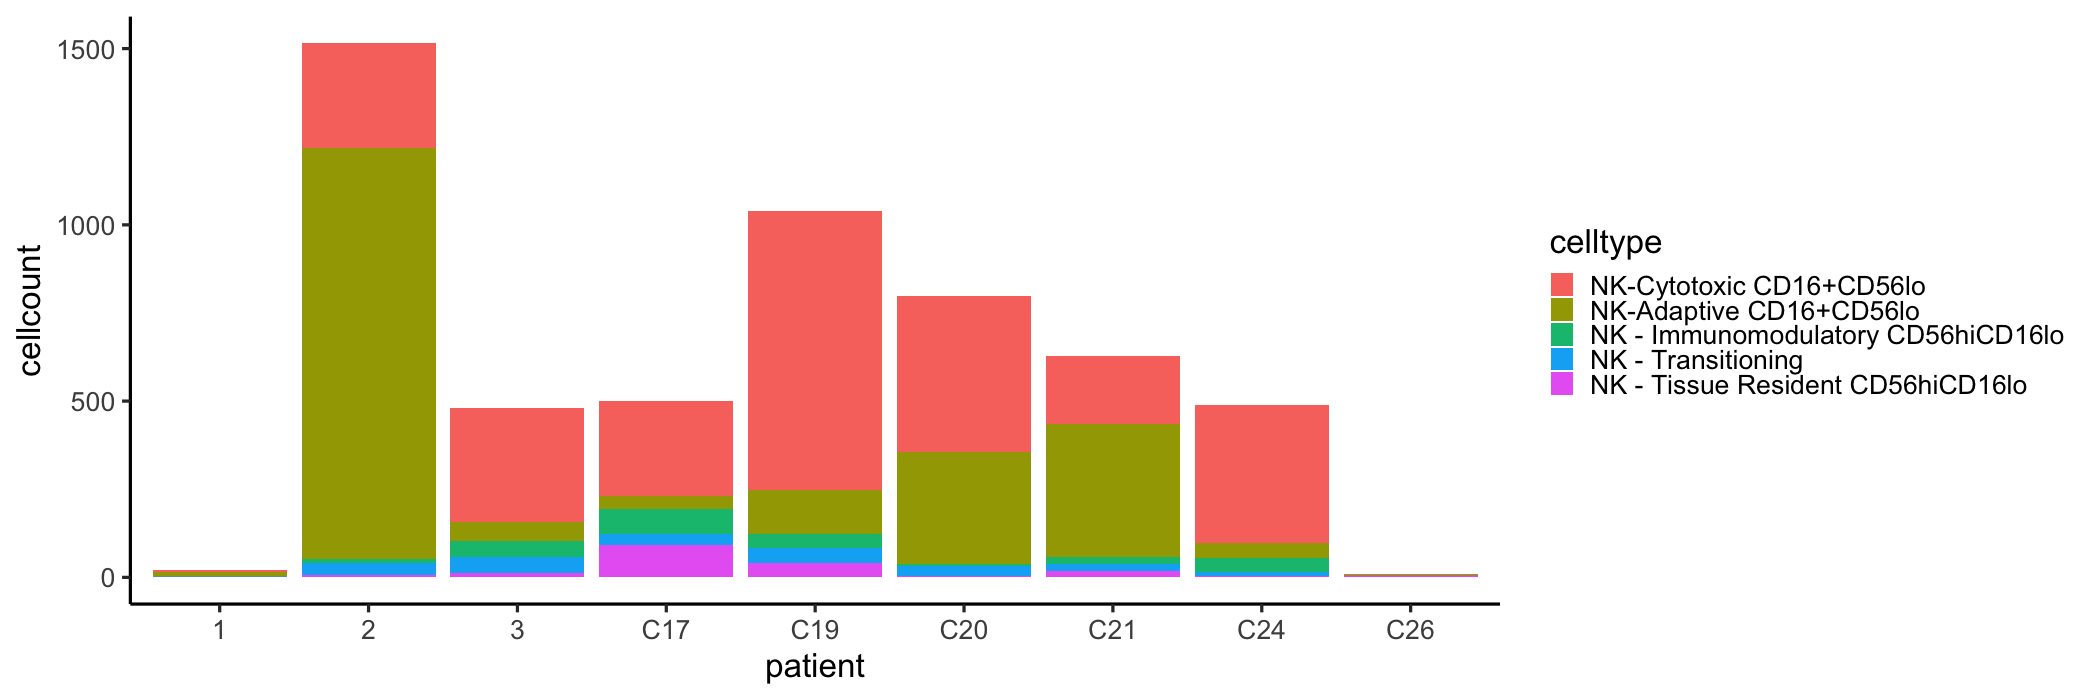

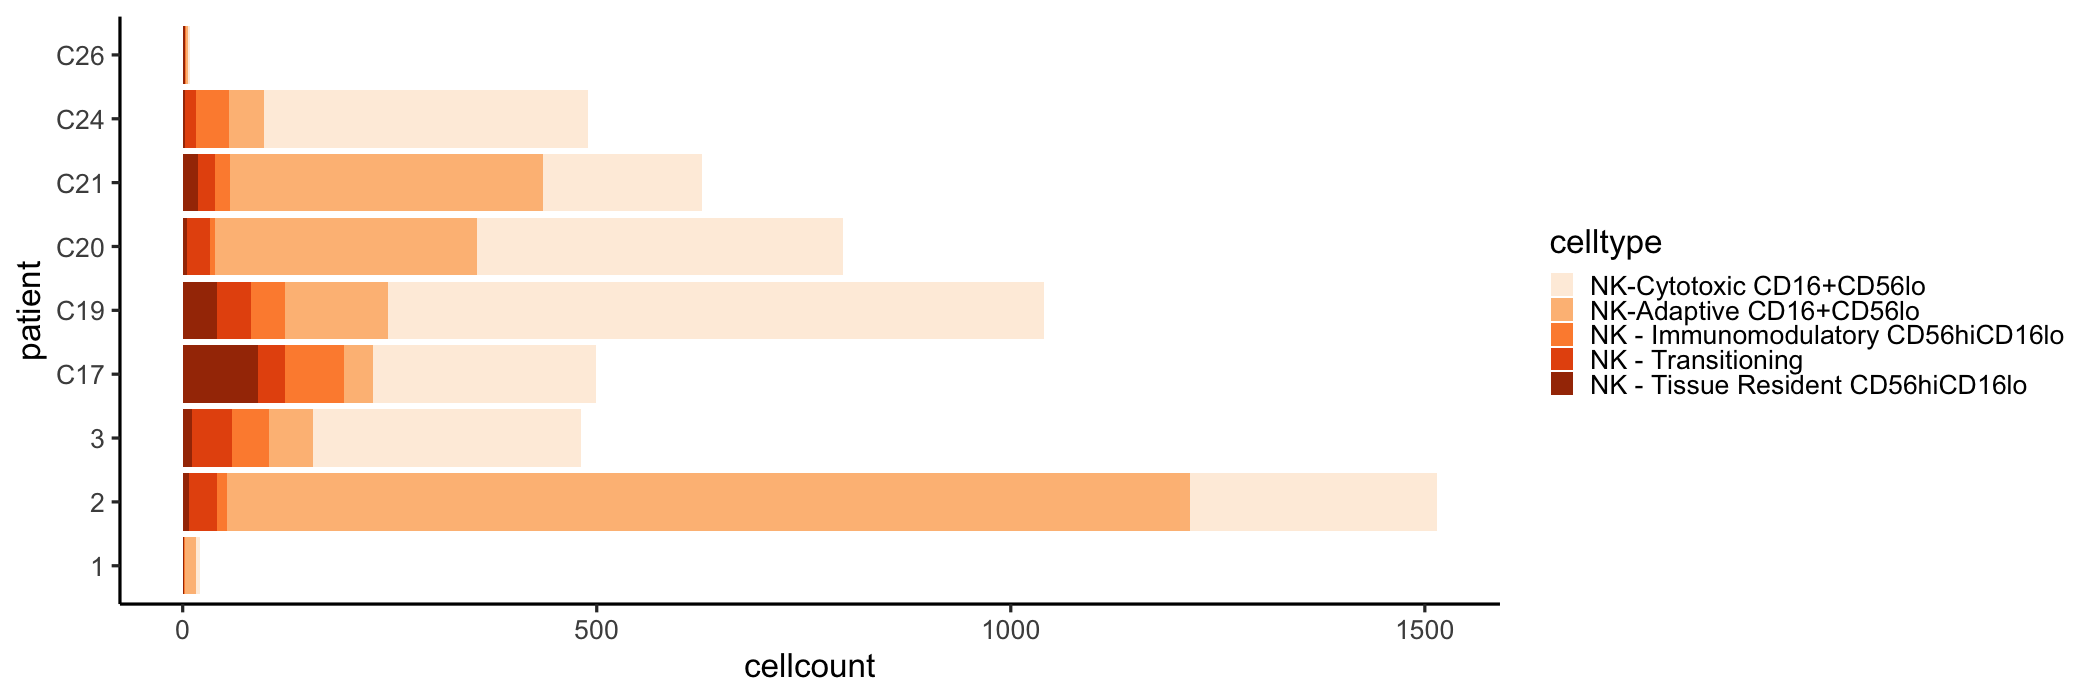

In [58]:

# Basic barplot
p<-ggplot(data=covidpiechartptNK, aes(x=patient, y=cellcount, fill = celltype)) +
  geom_bar(stat="identity")
p
   
# Horizontal bar plot
p + coord_flip() + scale_fill_brewer(palette = "Oranges") 

In [59]:
levels(Idents(data))

[1] "NK-Cytotoxic CD16+CD56lo"           "NK-Adaptive CD16+CD56lo"           
 [3] "CD8 T-Naive"                        "MAIT"                              
 [5] "CD8 T-Naive(Tissue)"                "CD8 T-Cytotoxic Effector Memory"   
 [7] "GammaDelta T-Vg3Vd3"                "CD8 T-Cytotoxic NK-like"           
 [9] "CD8 T-Central Memory"               "CD8 T-Resident Memory"             
[11] "Inate Lymphoid Cell-Type 3"         "NK - Immunomodulatory CD56hiCD16lo"
[13] "NK - Transitioning"                 "NK - Tissue Resident CD56hiCD16lo" 
[15] "GammaDelta T-Vg9Vd2"

In [60]:
covidpiechartptT <- covidpiechartdatapt %>% filter(celltype %in% c('CD8 T-Naive','MAIT','CD8 T-Naive(Tissue)',
                                                                    'CD8 T-Cytotoxic Effector Memory','GammaDelta T-Vg3Vd3','CD8 T-Cytotoxic NK-like','CD8 T-Central Memory',
                                                                    'CD8 T-Resident Memory','Inate Lymphoid Cell-Type 3','GammaDelta T-Vg9Vd2'))
covidpiechartptT

celltype                        patient cellcount
1  CD8 T-Naive                     1         6      
2  MAIT                            1        11      
3  CD8 T-Naive(Tissue)             1         4      
4  CD8 T-Cytotoxic Effector Memory 1        27      
5  GammaDelta T-Vg3Vd3             1         2      
6  CD8 T-Cytotoxic NK-like         1         1      
7  CD8 T-Central Memory            1        97      
8  CD8 T-Resident Memory           1        50      
9  Inate Lymphoid Cell-Type 3      1         8      
10 GammaDelta T-Vg9Vd2             1         2      
11 CD8 T-Naive                     2        80      
12 MAIT                            2       124      
13 CD8 T-Naive(Tissue)             2        14      
14 CD8 T-Cytotoxic Effector Memory 2       320      
15 GammaDelta T-Vg3Vd3             2        14      
16 CD8 T-Cytotoxic NK-like         2        16      
17 CD8 T-Central Memory            2        58      
18 CD8 T-Resident Memory           2       104      
19 Inate Lymphoid Cell-Type 3      2         5      
20 GammaDelta T-Vg9Vd2             2        15      
21 CD8 T-Naive                     3       403      
22 MAIT                            3       400      
23 CD8 T-Naive(Tissue)             3        54      
24 CD8 T-Cytotoxic Effector Memory 3       113      
25 GammaDelta T-Vg3Vd3             3         9      
26 CD8 T-Cytotoxic NK-like         3        13      
27 CD8 T-Central Memory            3       174      
28 CD8 T-Resident Memory           3        63      
29 Inate Lymphoid Cell-Type 3      3        34      
30 GammaDelta T-Vg9Vd2             3        65      
⋮  ⋮                               ⋮       ⋮        
61 CD8 T-Naive                     C21       22     
62 MAIT                            C21       46     
63 CD8 T-Naive(Tissue)             C21        7     
64 CD8 T-Cytotoxic Effector Memory C21     1135     
65 GammaDelta T-Vg3Vd3             C21       27     
66 CD8 T-Cytotoxic NK-like         C21       21     
67 CD8 T-Central Memory            C21      335     
68 CD8 T-Resident Memory           C21       41     
69 Inate Lymphoid Cell-Type 3      C21        8     
70 GammaDelta T-Vg9Vd2             C21        7     
71 CD8 T-Naive                     C24        7     
72 MAIT                            C24       16     
73 CD8 T-Naive(Tissue)             C24        3     
74 CD8 T-Cytotoxic Effector Memory C24       88     
75 GammaDelta T-Vg3Vd3             C24        6     
76 CD8 T-Cytotoxic NK-like         C24        4     
77 CD8 T-Central Memory            C24       94     
78 CD8 T-Resident Memory           C24       40     
79 Inate Lymphoid Cell-Type 3      C24        7     
80 GammaDelta T-Vg9Vd2             C24        7     
81 CD8 T-Naive                     C26       13     
82 MAIT                            C26        6     
83 CD8 T-Naive(Tissue)             C26       26     
84 CD8 T-Cytotoxic Effector Memory C26        8     
85 GammaDelta T-Vg3Vd3             C26        1     
86 CD8 T-Cytotoxic NK-like         C26        0     
87 CD8 T-Central Memory            C26       54     
88 CD8 T-Resident Memory           C26      114     
89 Inate Lymphoid Cell-Type 3      C26       23     
90 GammaDelta T-Vg9Vd2             C26        3

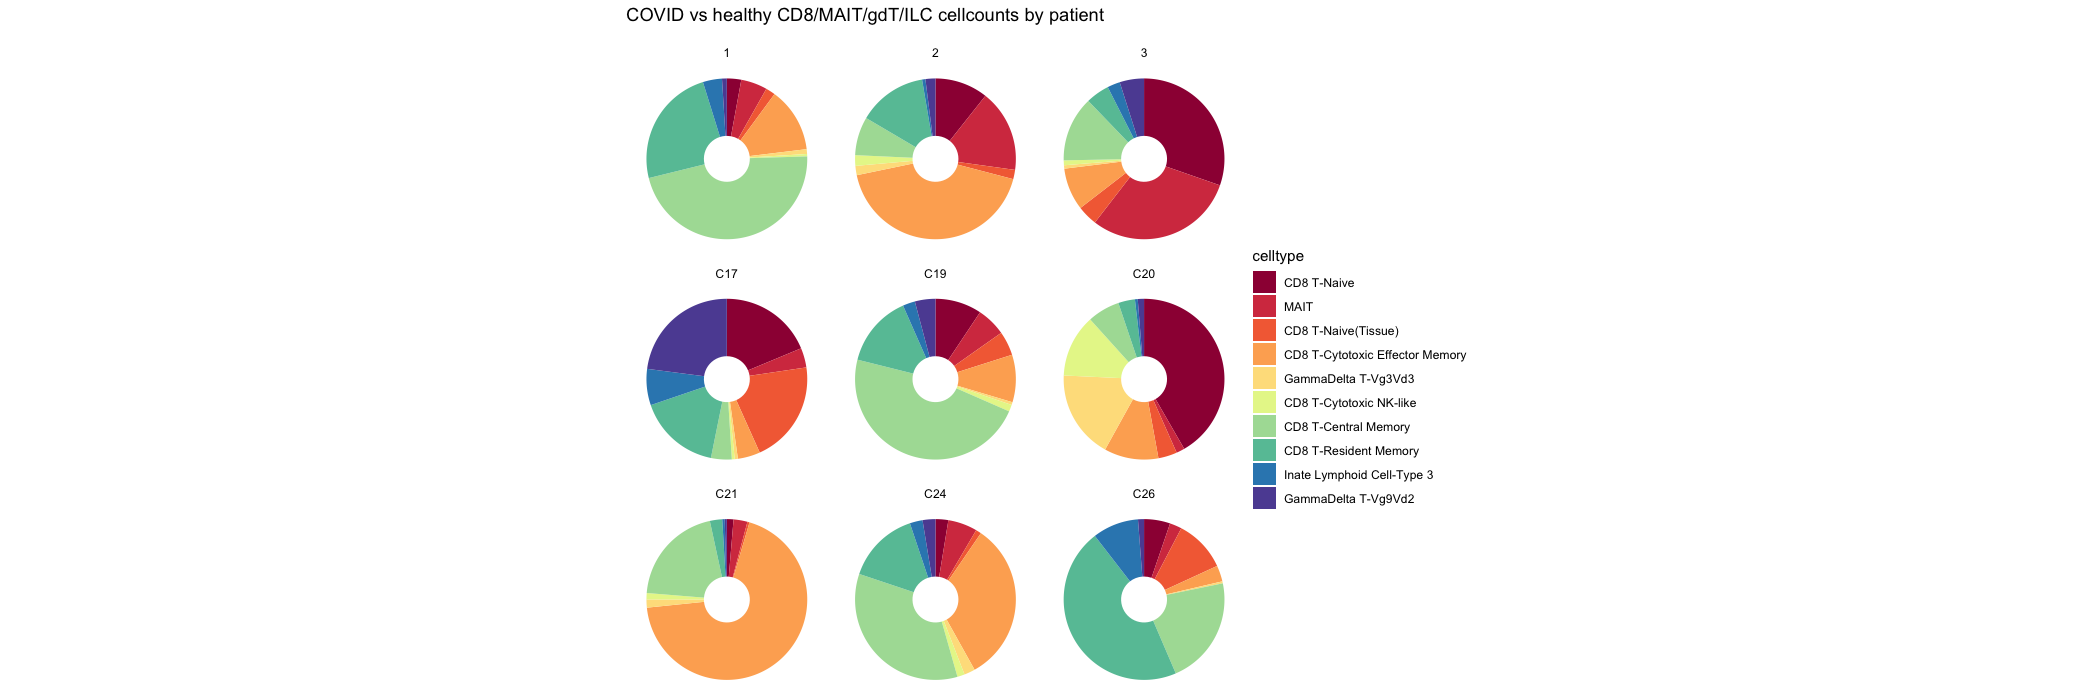

In [61]:

# Data for plot
pdatTpt = covidpiechartptT %>% 
  group_by(patient) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatTpt, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) + scale_fill_brewer(palette = "Spectral") +
  theme_void() + facet_wrap(~patient) + ggtitle("COVID vs healthy CD8/MAIT/gdT/ILC cellcounts by patient", subtitle = "")

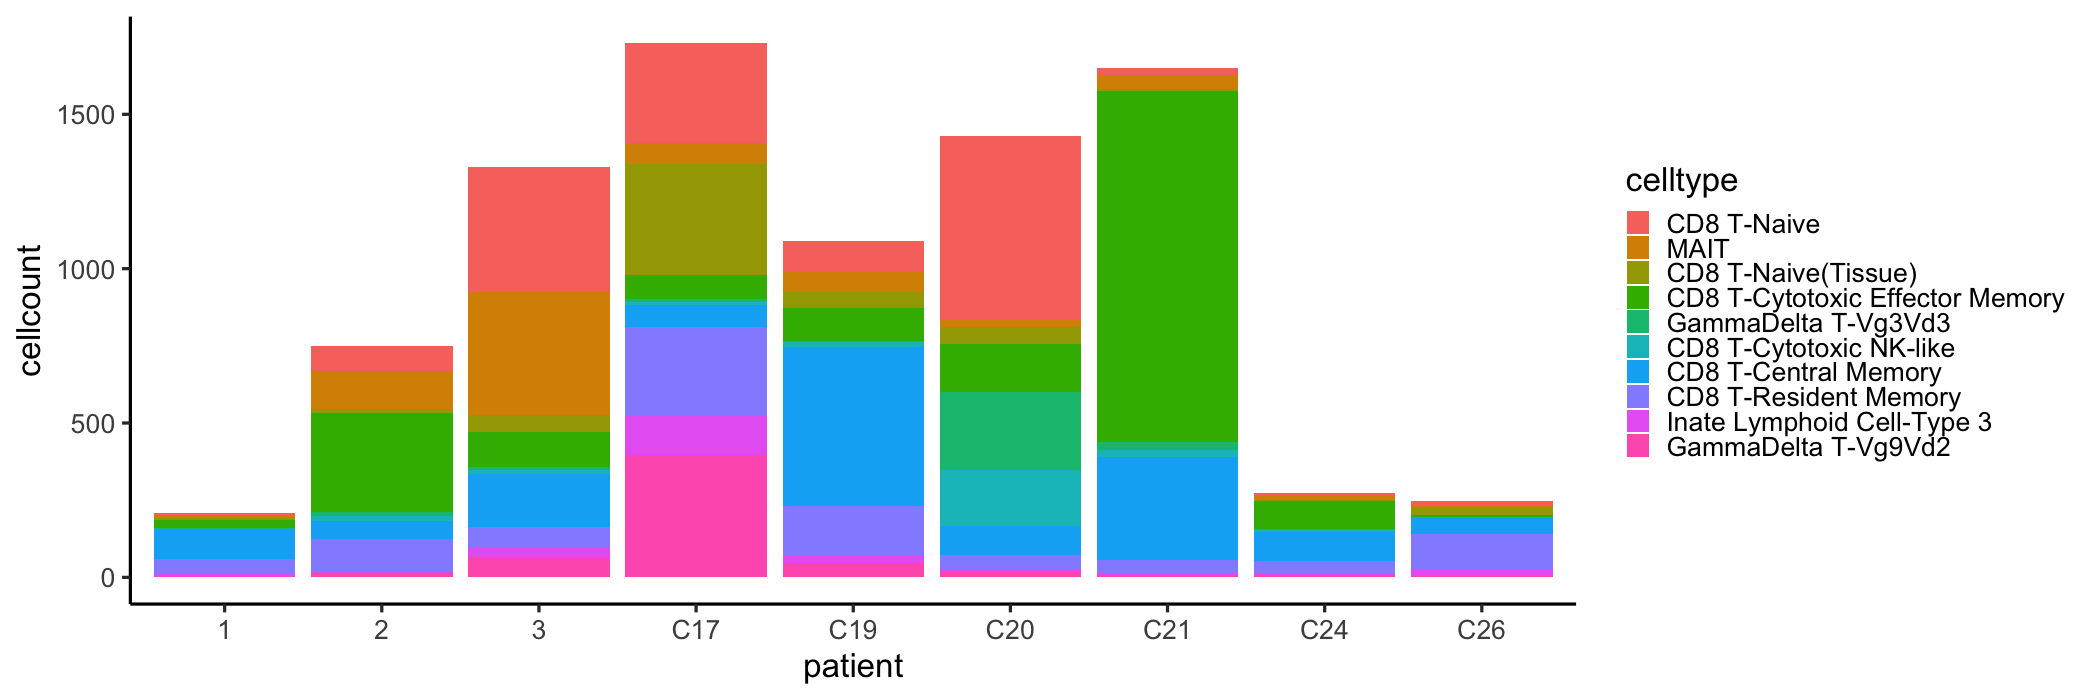

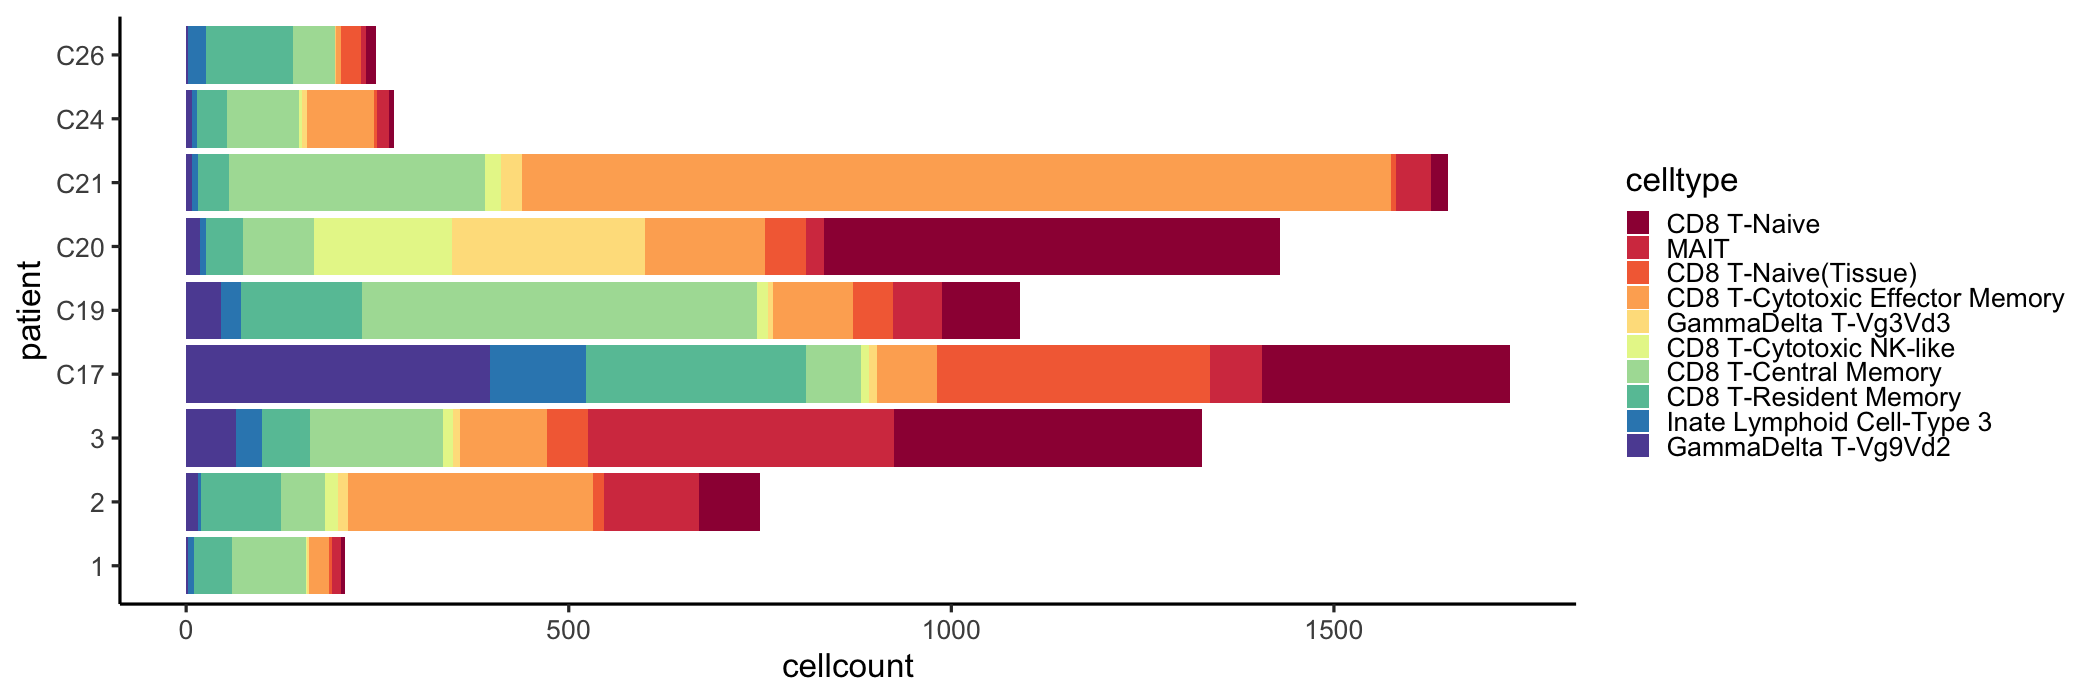

In [62]:

# Basic barplot
p<-ggplot(data=covidpiechartptT, aes(x=patient, y=cellcount, fill = celltype)) +
  geom_bar(stat="identity")
p
   
# Horizontal bar plot
p + coord_flip() + scale_fill_brewer(palette = "Spectral") 

In [63]:
covidpiechartsitecht <- data.frame(table(Idents(data), data@meta.data$cohort, data@meta.data$sampletype))
covidpiechartsitecht

Var1                               Var2    Var3  Freq
1  NK-Cytotoxic CD16+CD56lo           COVID   Blood  614
2  NK-Adaptive CD16+CD56lo            COVID   Blood 1209
3  CD8 T-Naive                        COVID   Blood  381
4  MAIT                               COVID   Blood  501
5  CD8 T-Naive(Tissue)                COVID   Blood   13
6  CD8 T-Cytotoxic Effector Memory    COVID   Blood  451
7  GammaDelta T-Vg3Vd3                COVID   Blood   24
8  CD8 T-Cytotoxic NK-like            COVID   Blood   29
9  CD8 T-Central Memory               COVID   Blood  106
10 CD8 T-Resident Memory              COVID   Blood    7
11 Inate Lymphoid Cell-Type 3         COVID   Blood    1
12 NK - Immunomodulatory CD56hiCD16lo COVID   Blood   50
13 NK - Transitioning                 COVID   Blood   79
14 NK - Tissue Resident CD56hiCD16lo  COVID   Blood    3
15 GammaDelta T-Vg9Vd2                COVID   Blood   79
16 NK-Cytotoxic CD16+CD56lo           Healthy Blood 2071
17 NK-Adaptive CD16+CD56lo            Healthy Blood  893
18 CD8 T-Naive                        Healthy Blood 1019
19 MAIT                               Healthy Blood  198
20 CD8 T-Naive(Tissue)                Healthy Blood   37
21 CD8 T-Cytotoxic Effector Memory    Healthy Blood 1553
22 GammaDelta T-Vg3Vd3                Healthy Blood  303
23 CD8 T-Cytotoxic NK-like            Healthy Blood  230
24 CD8 T-Central Memory               Healthy Blood  371
25 CD8 T-Resident Memory              Healthy Blood   26
26 Inate Lymphoid Cell-Type 3         Healthy Blood   12
27 NK - Immunomodulatory CD56hiCD16lo Healthy Blood  162
28 NK - Transitioning                 Healthy Blood  126
29 NK - Tissue Resident CD56hiCD16lo  Healthy Blood    7
30 GammaDelta T-Vg9Vd2                Healthy Blood  470
31 NK-Cytotoxic CD16+CD56lo           COVID   Nasal   13
32 NK-Adaptive CD16+CD56lo            COVID   Nasal   21
33 CD8 T-Naive                        COVID   Nasal  108
34 MAIT                               COVID   Nasal   34
35 CD8 T-Naive(Tissue)                COVID   Nasal   59
36 CD8 T-Cytotoxic Effector Memory    COVID   Nasal    9
37 GammaDelta T-Vg3Vd3                COVID   Nasal    1
38 CD8 T-Cytotoxic NK-like            COVID   Nasal    1
39 CD8 T-Central Memory               COVID   Nasal  223
40 CD8 T-Resident Memory              COVID   Nasal  210
41 Inate Lymphoid Cell-Type 3         COVID   Nasal   46
42 NK - Immunomodulatory CD56hiCD16lo COVID   Nasal    9
43 NK - Transitioning                 COVID   Nasal    2
44 NK - Tissue Resident CD56hiCD16lo  COVID   Nasal   17
45 GammaDelta T-Vg9Vd2                COVID   Nasal    3
46 NK-Cytotoxic CD16+CD56lo           Healthy Nasal   19
47 NK-Adaptive CD16+CD56lo            Healthy Nasal    5
48 CD8 T-Naive                        Healthy Nasal   45
49 MAIT                               Healthy Nasal   26
50 CD8 T-Naive(Tissue)                Healthy Nasal  463
51 CD8 T-Cytotoxic Effector Memory    Healthy Nasal   16
52 GammaDelta T-Vg3Vd3                Healthy Nasal    1
53 CD8 T-Cytotoxic NK-like            Healthy Nasal    0
54 CD8 T-Central Memory               Healthy Nasal  793
55 CD8 T-Resident Memory              Healthy Nasal  662
56 Inate Lymphoid Cell-Type 3         Healthy Nasal  187
57 NK - Immunomodulatory CD56hiCD16lo Healthy Nasal   16
58 NK - Transitioning                 Healthy Nasal    8
59 NK - Tissue Resident CD56hiCD16lo  Healthy Nasal  155
60 GammaDelta T-Vg9Vd2                Healthy Nasal    7

In [64]:
colnames(covidpiechartsitecht) <- c("celltype", "cohort", "sampletype", "cellcount")

In [65]:
covidpiechartsitecht

celltype                           cohort  sampletype cellcount
1  NK-Cytotoxic CD16+CD56lo           COVID   Blood       614     
2  NK-Adaptive CD16+CD56lo            COVID   Blood      1209     
3  CD8 T-Naive                        COVID   Blood       381     
4  MAIT                               COVID   Blood       501     
5  CD8 T-Naive(Tissue)                COVID   Blood        13     
6  CD8 T-Cytotoxic Effector Memory    COVID   Blood       451     
7  GammaDelta T-Vg3Vd3                COVID   Blood        24     
8  CD8 T-Cytotoxic NK-like            COVID   Blood        29     
9  CD8 T-Central Memory               COVID   Blood       106     
10 CD8 T-Resident Memory              COVID   Blood         7     
11 Inate Lymphoid Cell-Type 3         COVID   Blood         1     
12 NK - Immunomodulatory CD56hiCD16lo COVID   Blood        50     
13 NK - Transitioning                 COVID   Blood        79     
14 NK - Tissue Resident CD56hiCD16lo  COVID   Blood         3     
15 GammaDelta T-Vg9Vd2                COVID   Blood        79     
16 NK-Cytotoxic CD16+CD56lo           Healthy Blood      2071     
17 NK-Adaptive CD16+CD56lo            Healthy Blood       893     
18 CD8 T-Naive                        Healthy Blood      1019     
19 MAIT                               Healthy Blood       198     
20 CD8 T-Naive(Tissue)                Healthy Blood        37     
21 CD8 T-Cytotoxic Effector Memory    Healthy Blood      1553     
22 GammaDelta T-Vg3Vd3                Healthy Blood       303     
23 CD8 T-Cytotoxic NK-like            Healthy Blood       230     
24 CD8 T-Central Memory               Healthy Blood       371     
25 CD8 T-Resident Memory              Healthy Blood        26     
26 Inate Lymphoid Cell-Type 3         Healthy Blood        12     
27 NK - Immunomodulatory CD56hiCD16lo Healthy Blood       162     
28 NK - Transitioning                 Healthy Blood       126     
29 NK - Tissue Resident CD56hiCD16lo  Healthy Blood         7     
30 GammaDelta T-Vg9Vd2                Healthy Blood       470     
31 NK-Cytotoxic CD16+CD56lo           COVID   Nasal        13     
32 NK-Adaptive CD16+CD56lo            COVID   Nasal        21     
33 CD8 T-Naive                        COVID   Nasal       108     
34 MAIT                               COVID   Nasal        34     
35 CD8 T-Naive(Tissue)                COVID   Nasal        59     
36 CD8 T-Cytotoxic Effector Memory    COVID   Nasal         9     
37 GammaDelta T-Vg3Vd3                COVID   Nasal         1     
38 CD8 T-Cytotoxic NK-like            COVID   Nasal         1     
39 CD8 T-Central Memory               COVID   Nasal       223     
40 CD8 T-Resident Memory              COVID   Nasal       210     
41 Inate Lymphoid Cell-Type 3         COVID   Nasal        46     
42 NK - Immunomodulatory CD56hiCD16lo COVID   Nasal         9     
43 NK - Transitioning                 COVID   Nasal         2     
44 NK - Tissue Resident CD56hiCD16lo  COVID   Nasal        17     
45 GammaDelta T-Vg9Vd2                COVID   Nasal         3     
46 NK-Cytotoxic CD16+CD56lo           Healthy Nasal        19     
47 NK-Adaptive CD16+CD56lo            Healthy Nasal         5     
48 CD8 T-Naive                        Healthy Nasal        45     
49 MAIT                               Healthy Nasal        26     
50 CD8 T-Naive(Tissue)                Healthy Nasal       463     
51 CD8 T-Cytotoxic Effector Memory    Healthy Nasal        16     
52 GammaDelta T-Vg3Vd3                Healthy Nasal         1     
53 CD8 T-Cytotoxic NK-like            Healthy Nasal         0     
54 CD8 T-Central Memory               Healthy Nasal       793     
55 CD8 T-Resident Memory              Healthy Nasal       662     
56 Inate Lymphoid Cell-Type 3         Healthy Nasal       187     
57 NK - Immunomodulatory CD56hiCD16lo Healthy Nasal        16     
58 NK - Transitioning                 Healthy Nasal         8     
59 NK - Tissue Resident CD56hiCD16lo  Healthy Nasa

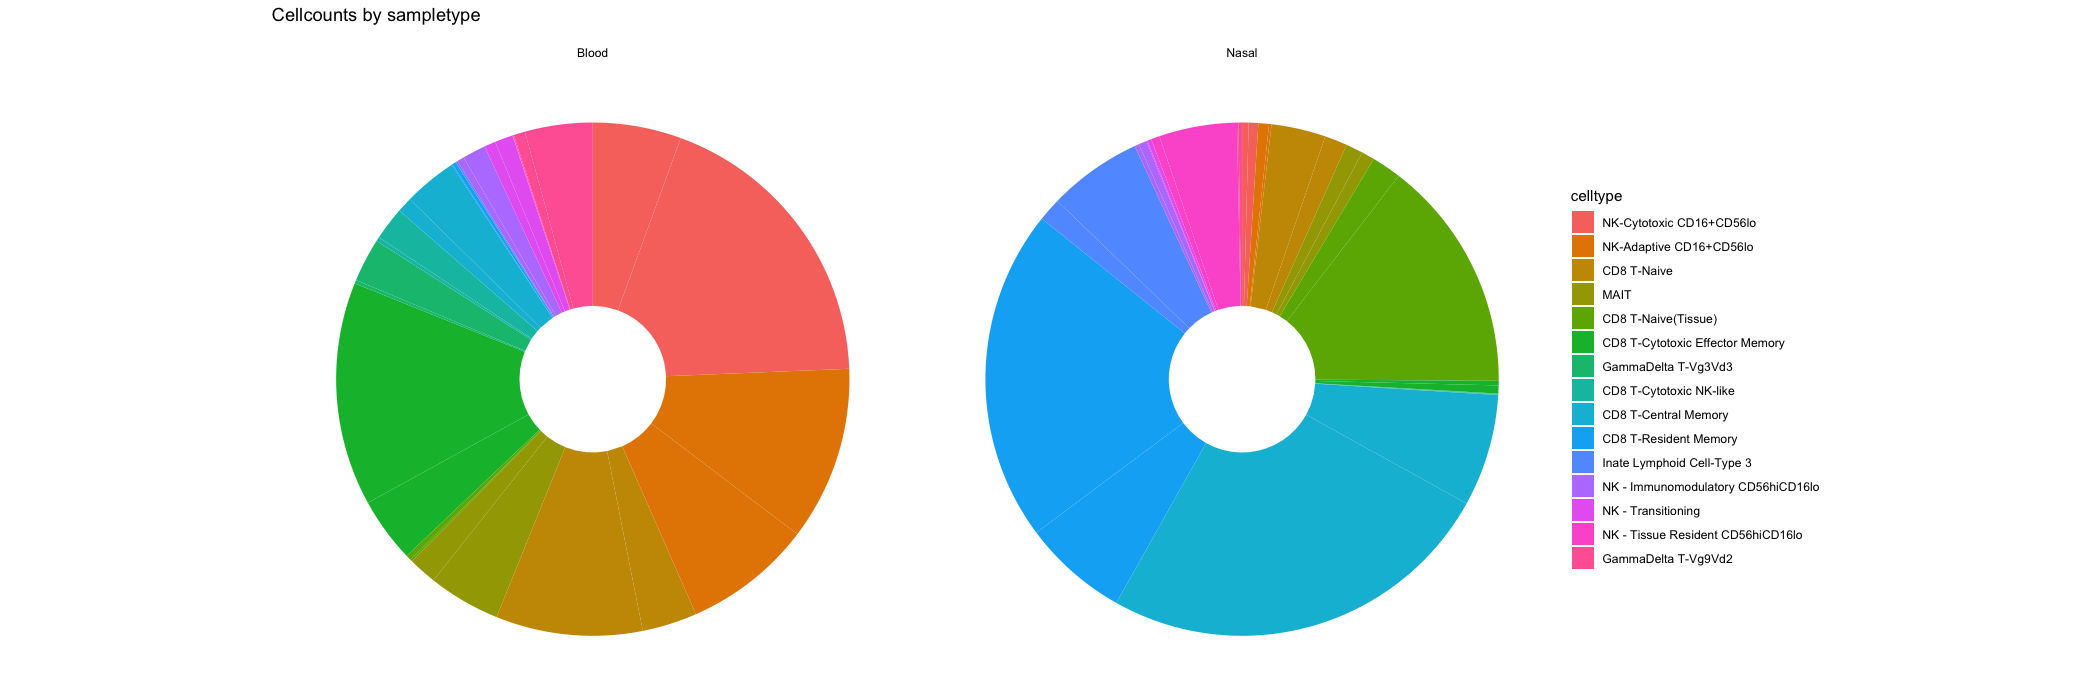

In [66]:

# Data for plot
pdatscht = covidpiechartsitecht %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatscht, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~sampletype) + ggtitle("Cellcounts by sampletype", subtitle = "")

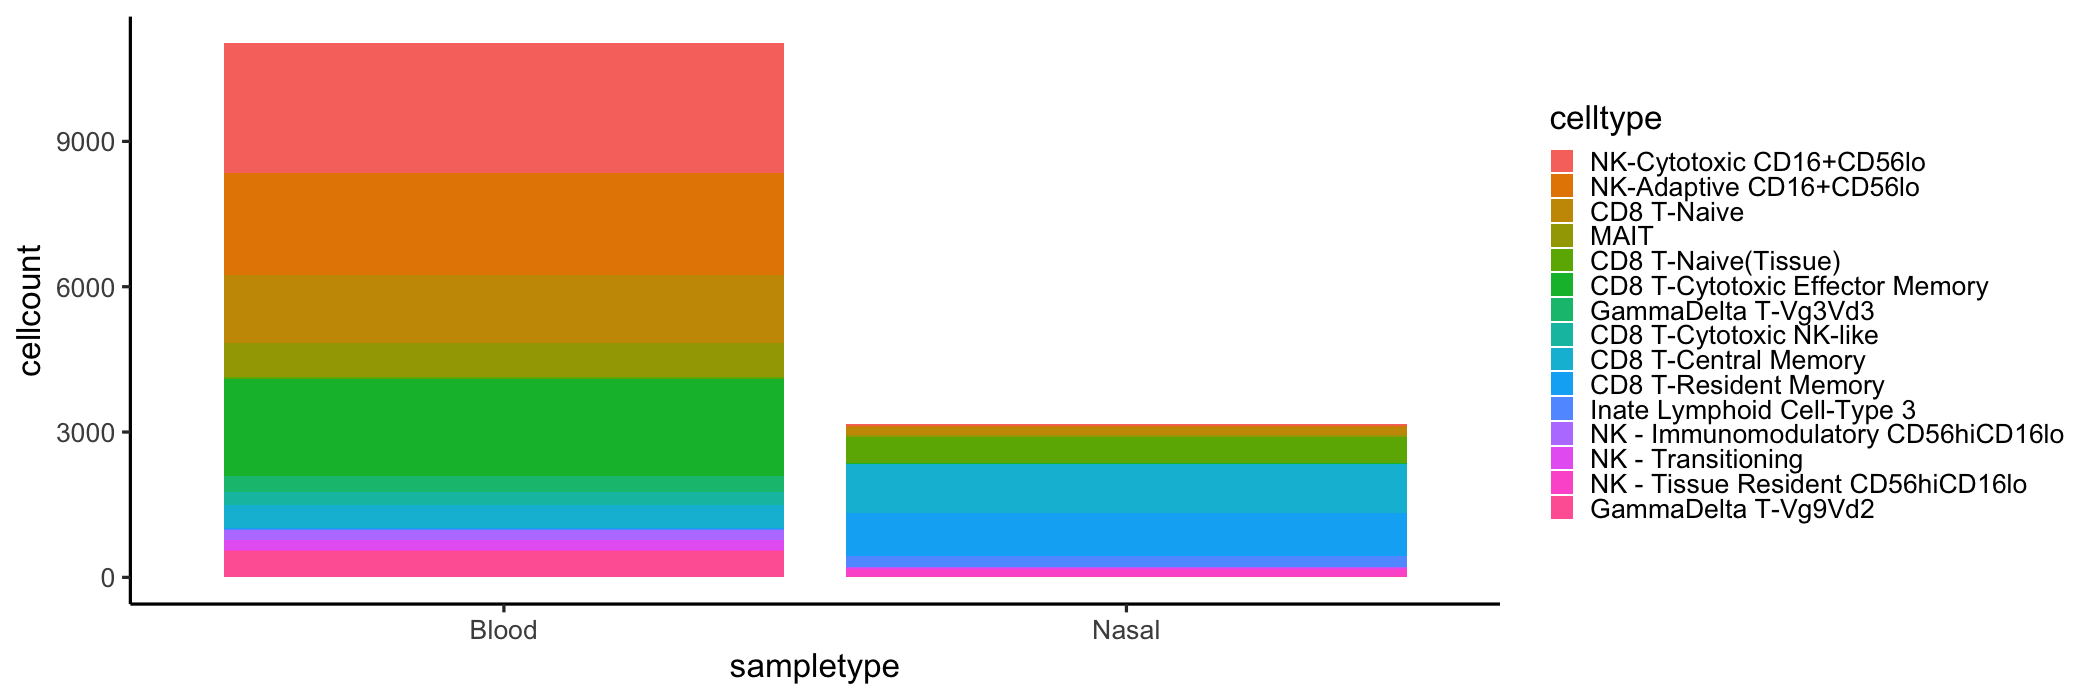

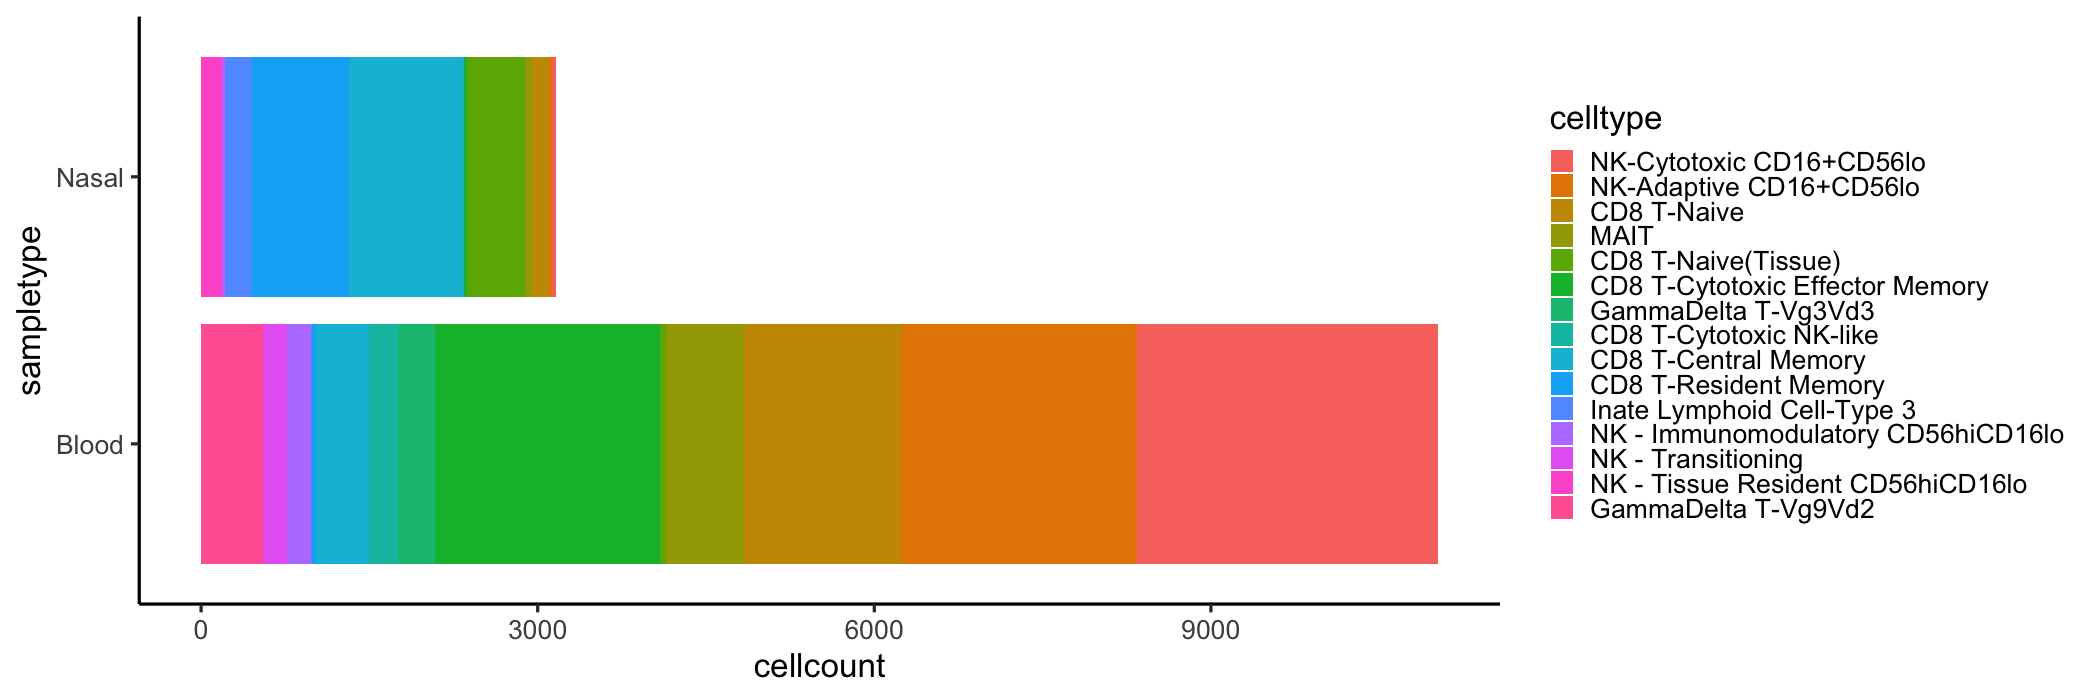

In [67]:

# Basic barplot
p<-ggplot(data=covidpiechartsitecht, aes(x=sampletype, y=cellcount, fill = celltype)) +
  geom_bar(stat="identity")
p
   
# Horizontal bar plot
p + coord_flip() 

In [68]:
covidpiechartsitechtCOVID <- covidpiechartsitecht %>% filter(cohort %in% "COVID")
covidpiechartsitechtCOVID

celltype                           cohort sampletype cellcount
1  NK-Cytotoxic CD16+CD56lo           COVID  Blood       614     
2  NK-Adaptive CD16+CD56lo            COVID  Blood      1209     
3  CD8 T-Naive                        COVID  Blood       381     
4  MAIT                               COVID  Blood       501     
5  CD8 T-Naive(Tissue)                COVID  Blood        13     
6  CD8 T-Cytotoxic Effector Memory    COVID  Blood       451     
7  GammaDelta T-Vg3Vd3                COVID  Blood        24     
8  CD8 T-Cytotoxic NK-like            COVID  Blood        29     
9  CD8 T-Central Memory               COVID  Blood       106     
10 CD8 T-Resident Memory              COVID  Blood         7     
11 Inate Lymphoid Cell-Type 3         COVID  Blood         1     
12 NK - Immunomodulatory CD56hiCD16lo COVID  Blood        50     
13 NK - Transitioning                 COVID  Blood        79     
14 NK - Tissue Resident CD56hiCD16lo  COVID  Blood         3     
15 GammaDelta T-Vg9Vd2                COVID  Blood        79     
16 NK-Cytotoxic CD16+CD56lo           COVID  Nasal        13     
17 NK-Adaptive CD16+CD56lo            COVID  Nasal        21     
18 CD8 T-Naive                        COVID  Nasal       108     
19 MAIT                               COVID  Nasal        34     
20 CD8 T-Naive(Tissue)                COVID  Nasal        59     
21 CD8 T-Cytotoxic Effector Memory    COVID  Nasal         9     
22 GammaDelta T-Vg3Vd3                COVID  Nasal         1     
23 CD8 T-Cytotoxic NK-like            COVID  Nasal         1     
24 CD8 T-Central Memory               COVID  Nasal       223     
25 CD8 T-Resident Memory              COVID  Nasal       210     
26 Inate Lymphoid Cell-Type 3         COVID  Nasal        46     
27 NK - Immunomodulatory CD56hiCD16lo COVID  Nasal         9     
28 NK - Transitioning                 COVID  Nasal         2     
29 NK - Tissue Resident CD56hiCD16lo  COVID  Nasal        17     
30 GammaDelta T-Vg9Vd2                COVID  Nasal         3

In [69]:
covidpiechartsitechthealthy <- covidpiechartsitecht %>% filter(cohort %in% "Healthy")
covidpiechartsitechthealthy

celltype                           cohort  sampletype cellcount
1  NK-Cytotoxic CD16+CD56lo           Healthy Blood      2071     
2  NK-Adaptive CD16+CD56lo            Healthy Blood       893     
3  CD8 T-Naive                        Healthy Blood      1019     
4  MAIT                               Healthy Blood       198     
5  CD8 T-Naive(Tissue)                Healthy Blood        37     
6  CD8 T-Cytotoxic Effector Memory    Healthy Blood      1553     
7  GammaDelta T-Vg3Vd3                Healthy Blood       303     
8  CD8 T-Cytotoxic NK-like            Healthy Blood       230     
9  CD8 T-Central Memory               Healthy Blood       371     
10 CD8 T-Resident Memory              Healthy Blood        26     
11 Inate Lymphoid Cell-Type 3         Healthy Blood        12     
12 NK - Immunomodulatory CD56hiCD16lo Healthy Blood       162     
13 NK - Transitioning                 Healthy Blood       126     
14 NK - Tissue Resident CD56hiCD16lo  Healthy Blood         7     
15 GammaDelta T-Vg9Vd2                Healthy Blood       470     
16 NK-Cytotoxic CD16+CD56lo           Healthy Nasal        19     
17 NK-Adaptive CD16+CD56lo            Healthy Nasal         5     
18 CD8 T-Naive                        Healthy Nasal        45     
19 MAIT                               Healthy Nasal        26     
20 CD8 T-Naive(Tissue)                Healthy Nasal       463     
21 CD8 T-Cytotoxic Effector Memory    Healthy Nasal        16     
22 GammaDelta T-Vg3Vd3                Healthy Nasal         1     
23 CD8 T-Cytotoxic NK-like            Healthy Nasal         0     
24 CD8 T-Central Memory               Healthy Nasal       793     
25 CD8 T-Resident Memory              Healthy Nasal       662     
26 Inate Lymphoid Cell-Type 3         Healthy Nasal       187     
27 NK - Immunomodulatory CD56hiCD16lo Healthy Nasal        16     
28 NK - Transitioning                 Healthy Nasal         8     
29 NK - Tissue Resident CD56hiCD16lo  Healthy Nasal       155     
30 GammaDelta T-Vg9Vd2                Healthy Nasal         7

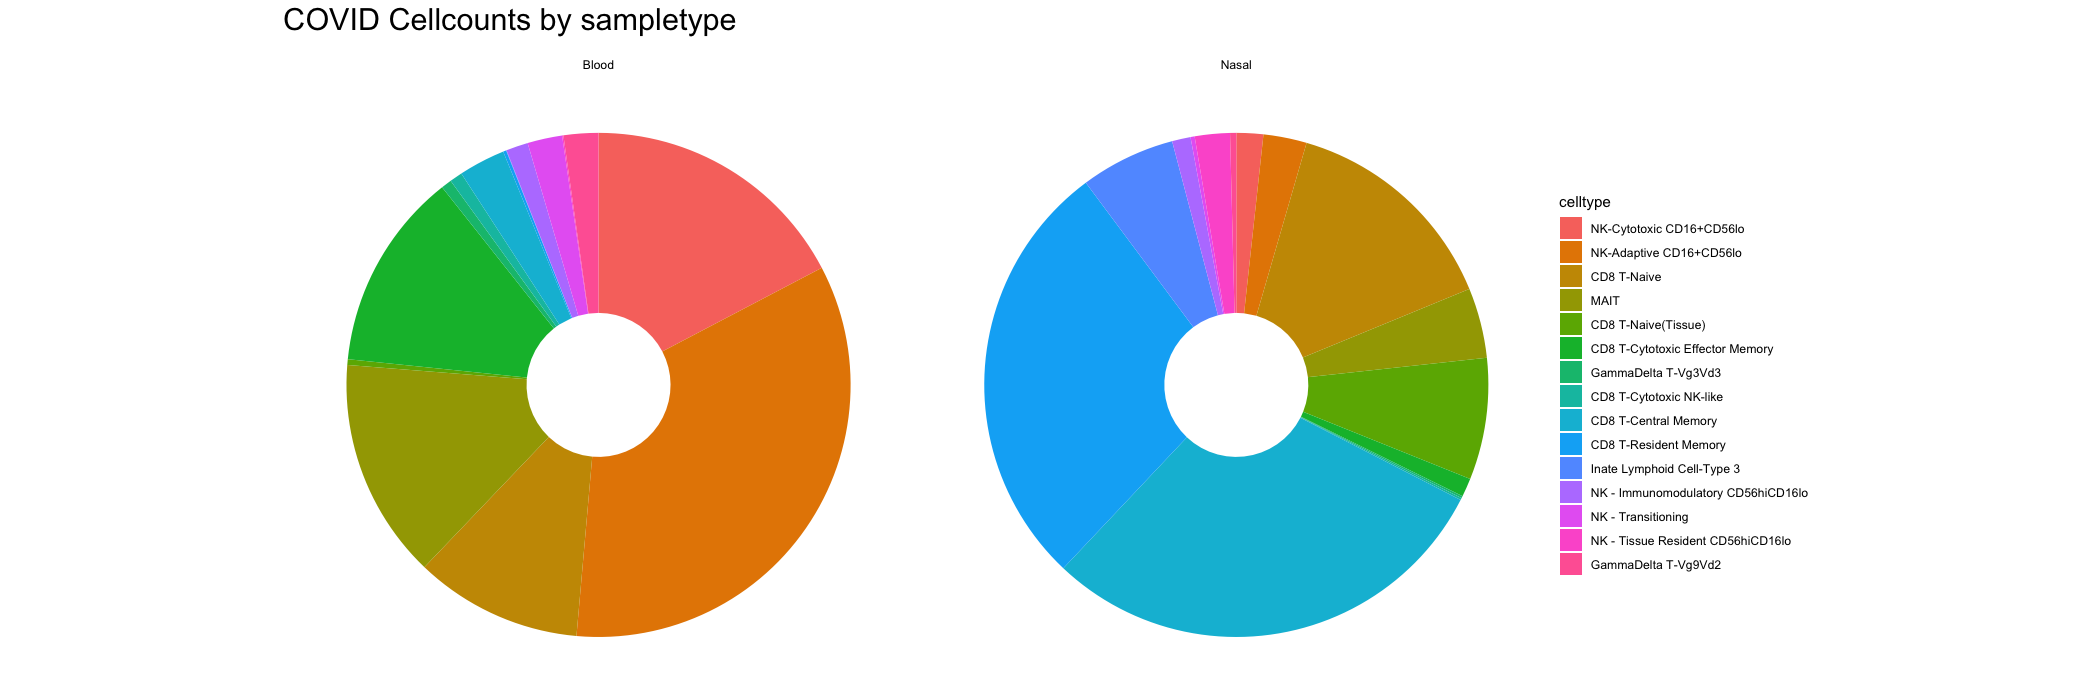

In [70]:

# Data for plot
pdatCOVID = covidpiechartsitechtCOVID %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatCOVID, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + theme(plot.title = element_text(size=22)) + facet_wrap(~sampletype) + ggtitle("COVID Cellcounts by sampletype", subtitle = "")

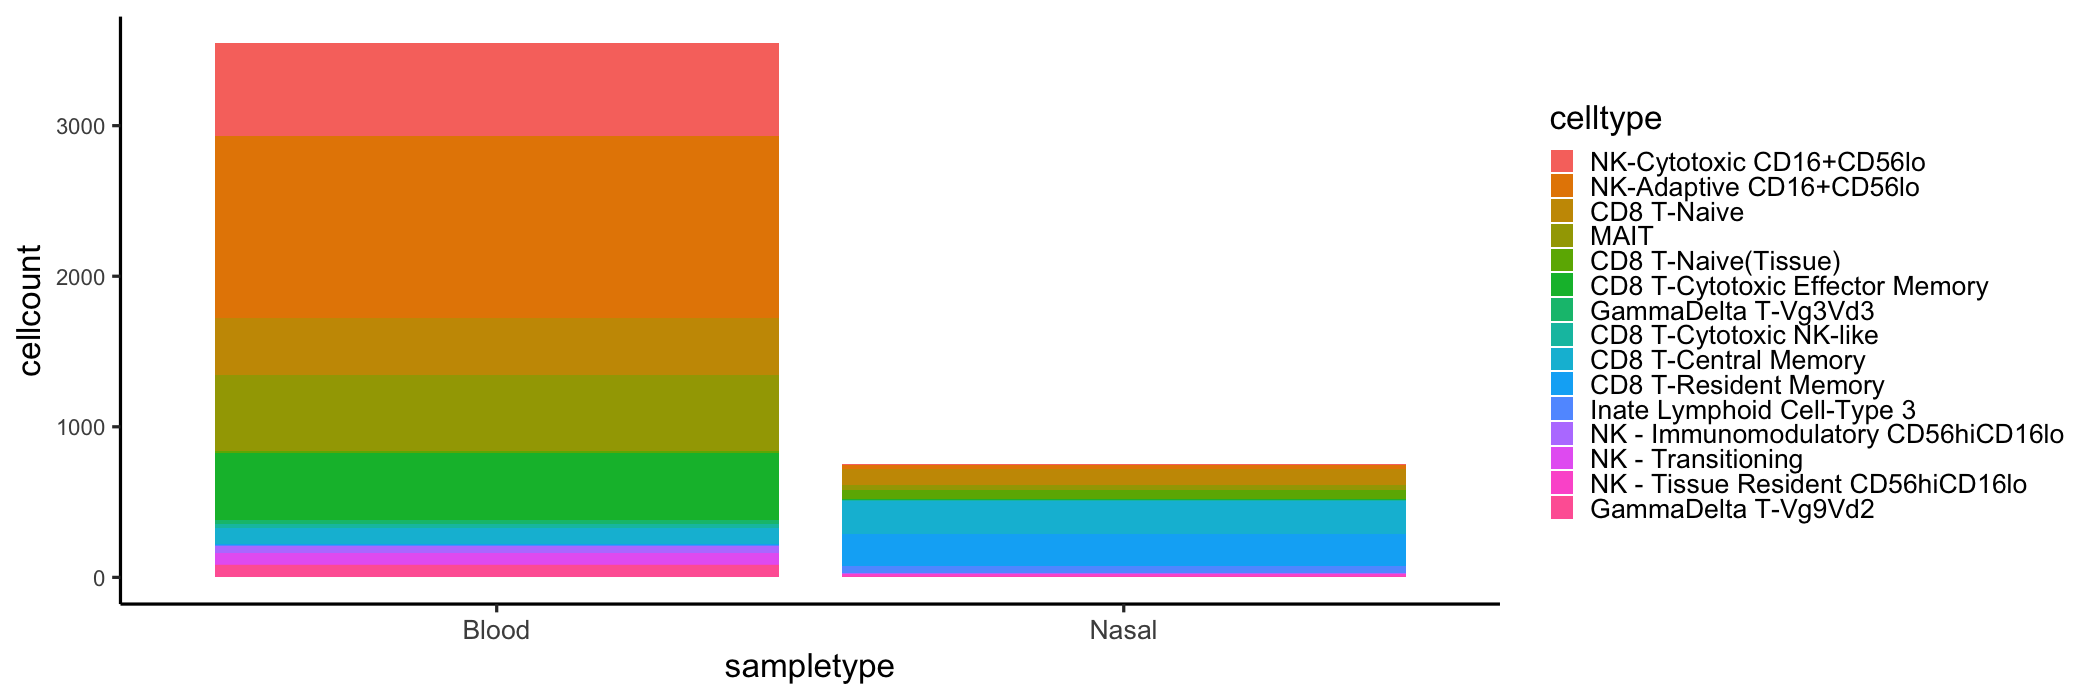

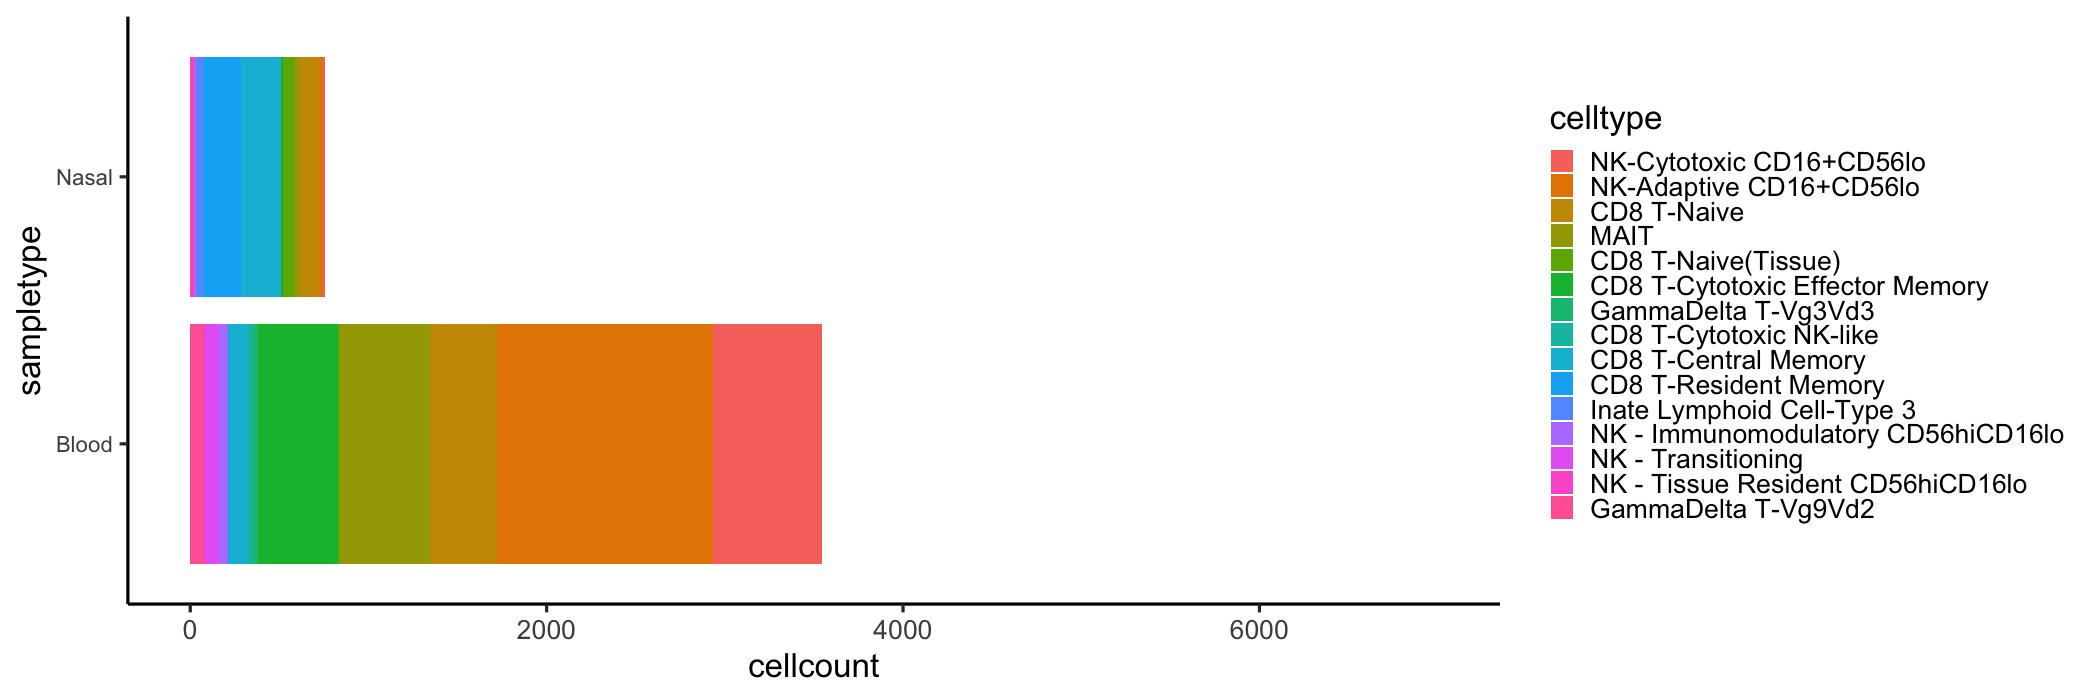

In [71]:

# Basic barplot
p<-ggplot(data=covidpiechartsitechtCOVID, aes(x=sampletype, y=cellcount, fill = celltype)) +
  geom_bar(stat="identity") + theme(axis.text.y = element_text(size = 16)) 
p
   
# Horizontal bar plot
p + coord_flip() + scale_y_continuous(limits = c(0, 7000))

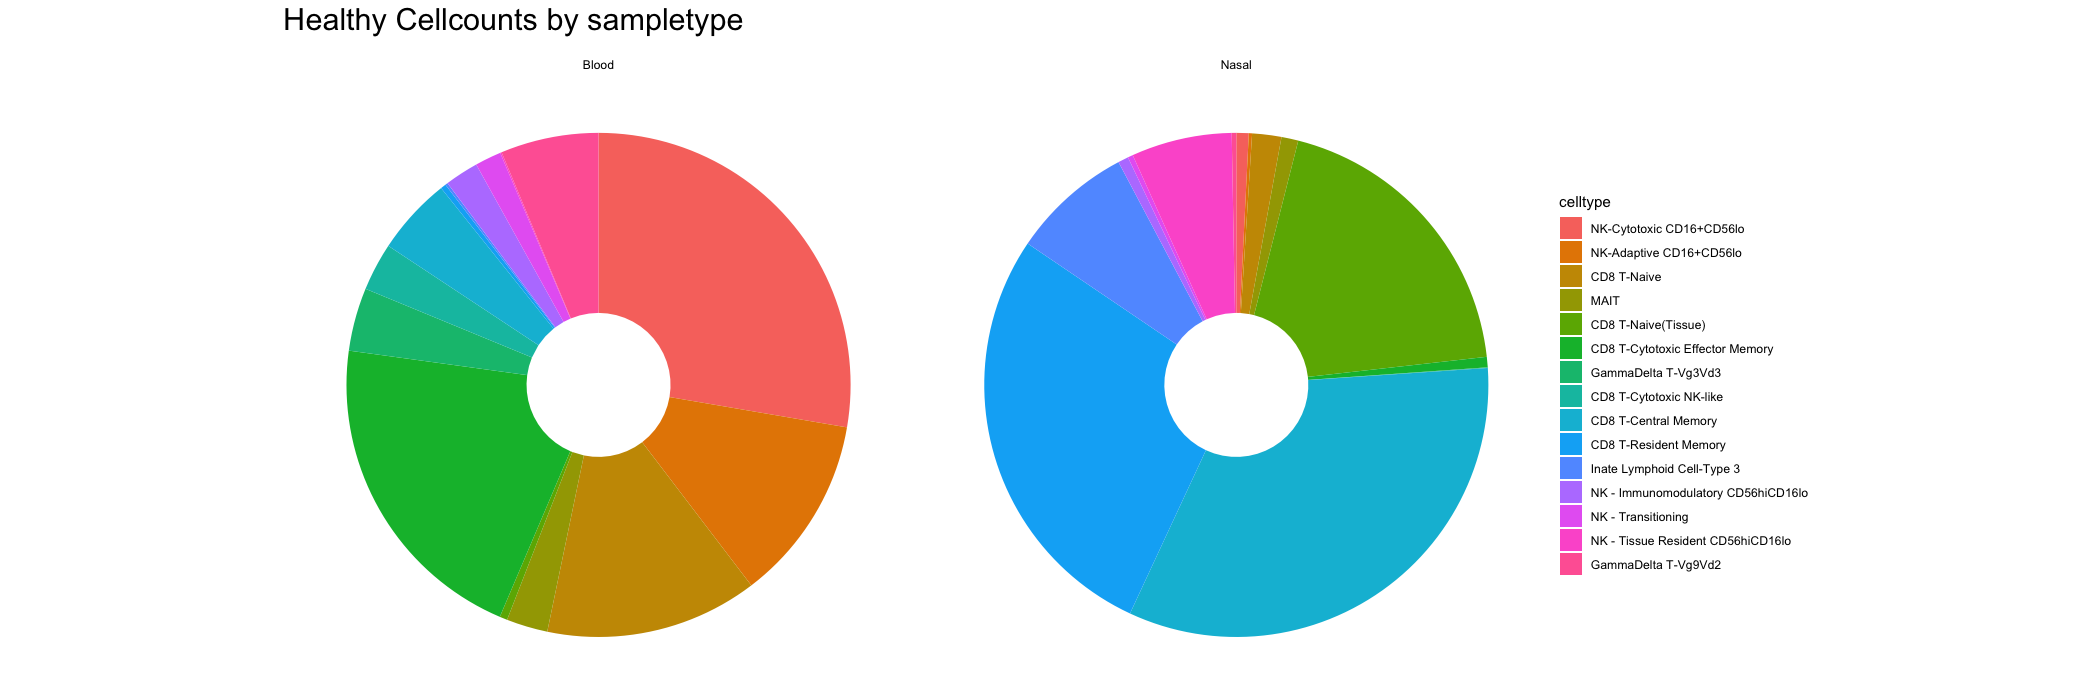

In [72]:

# Data for plot
pdatH = covidpiechartsitechthealthy %>% 
  group_by(sampletype) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatH, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + theme(plot.title = element_text(size=22)) + facet_wrap(~sampletype) + ggtitle("Healthy Cellcounts by sampletype", subtitle = "")

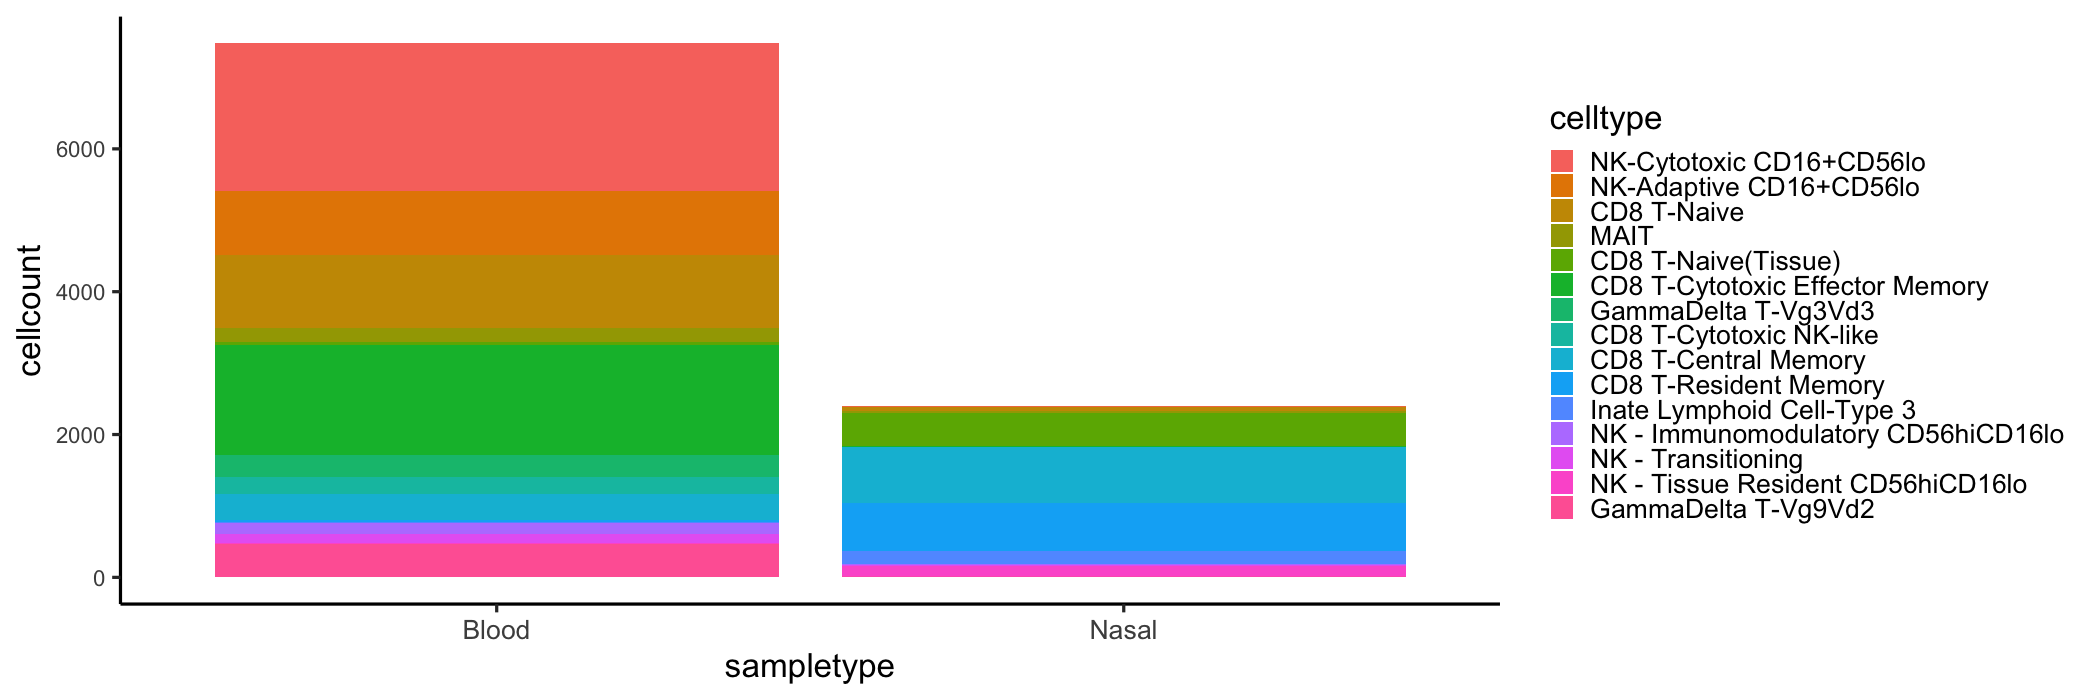

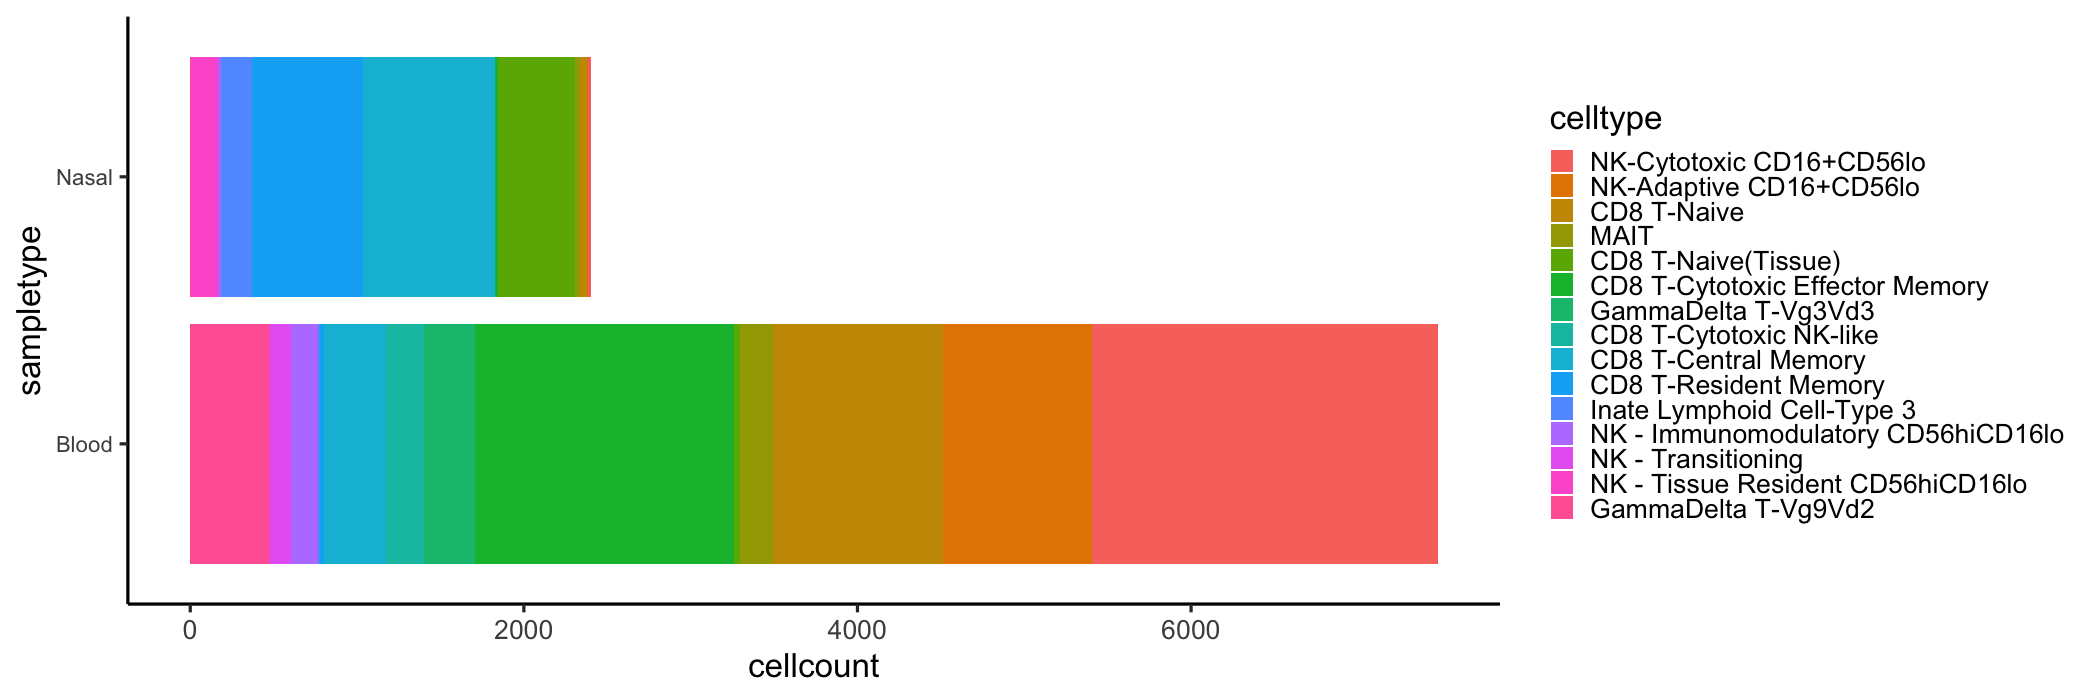

In [73]:

# Basic barplot
p<-ggplot(data=covidpiechartsitechthealthy, aes(x=sampletype, y=cellcount, fill = celltype)) +
  geom_bar(stat="identity") + theme(axis.text.y = element_text(size = 16))
p
   
# Horizontal bar plot
p + coord_flip() 

In [74]:
#covidpiechartdata$fraction <- covidpiechartdata$Freq / sum(covidpiechartdata$Freq)

In [75]:
#covidpiechartdata$ymax = cumsum(covidpiechartdata$fraction)

In [76]:
#covidpiechartdata$ymin <- c(0, head(covidpiechartdata$ymax, n=-1))

In [77]:
#piechartPerC <- covidpiechartdata$fraction

In [78]:
#piechartPerC$cluster <- rownames(covidpiechartdata)

In [79]:
#str(covidpiechartdata)

In [80]:
colnames(covidpiechartdatapt) <- c("celltype", "patient", "cellcount")

In [81]:
covidpiechartdatapt

celltype                           patient cellcount
1   NK-Cytotoxic CD16+CD56lo           1          5     
2   NK-Adaptive CD16+CD56lo            1         13     
3   CD8 T-Naive                        1          6     
4   MAIT                               1         11     
5   CD8 T-Naive(Tissue)                1          4     
6   CD8 T-Cytotoxic Effector Memory    1         27     
7   GammaDelta T-Vg3Vd3                1          2     
8   CD8 T-Cytotoxic NK-like            1          1     
9   CD8 T-Central Memory               1         97     
10  CD8 T-Resident Memory              1         50     
11  Inate Lymphoid Cell-Type 3         1          8     
12  NK - Immunomodulatory CD56hiCD16lo 1          2     
13  NK - Transitioning                 1          0     
14  NK - Tissue Resident CD56hiCD16lo  1          1     
15  GammaDelta T-Vg9Vd2                1          2     
16  NK-Cytotoxic CD16+CD56lo           2        298     
17  NK-Adaptive CD16+CD56lo            2       1164     
18  CD8 T-Naive                        2         80     
19  MAIT                               2        124     
20  CD8 T-Naive(Tissue)                2         14     
21  CD8 T-Cytotoxic Effector Memory    2        320     
22  GammaDelta T-Vg3Vd3                2         14     
23  CD8 T-Cytotoxic NK-like            2         16     
24  CD8 T-Central Memory               2         58     
25  CD8 T-Resident Memory              2        104     
26  Inate Lymphoid Cell-Type 3         2          5     
27  NK - Immunomodulatory CD56hiCD16lo 2         12     
28  NK - Transitioning                 2         33     
29  NK - Tissue Resident CD56hiCD16lo  2          8     
30  GammaDelta T-Vg9Vd2                2         15     
⋮   ⋮                                  ⋮       ⋮        
106 NK-Cytotoxic CD16+CD56lo           C24     392      
107 NK-Adaptive CD16+CD56lo            C24      42      
108 CD8 T-Naive                        C24       7      
109 MAIT                               C24      16      
110 CD8 T-Naive(Tissue)                C24       3      
111 CD8 T-Cytotoxic Effector Memory    C24      88      
112 GammaDelta T-Vg3Vd3                C24       6      
113 CD8 T-Cytotoxic NK-like            C24       4      
114 CD8 T-Central Memory               C24      94      
115 CD8 T-Resident Memory              C24      40      
116 Inate Lymphoid Cell-Type 3         C24       7      
117 NK - Immunomodulatory CD56hiCD16lo C24      40      
118 NK - Transitioning                 C24      13      
119 NK - Tissue Resident CD56hiCD16lo  C24       3      
120 GammaDelta T-Vg9Vd2                C24       7      
121 NK-Cytotoxic CD16+CD56lo           C26       3      
122 NK-Adaptive CD16+CD56lo            C26       2      
123 CD8 T-Naive                        C26      13      
124 MAIT                               C26       6      
125 CD8 T-Naive(Tissue)                C26      26      
126 CD8 T-Cytotoxic Effector Memory    C26       8      
127 GammaDelta T-Vg3Vd3                C26       1      
128 CD8 T-Cytotoxic NK-like            C26       0      
129 CD8 T-Central Memory               C26      54      
130 CD8 T-Resident Memory              C26     114      
131 Inate Lymphoid Cell-Type 3         C26      23      
132 NK - Immunomodulatory CD56hiCD16lo C26       1      
133 NK - Transitioning                 C26       0      
134 NK - Tissue Resident CD56hiCD16lo  C26       3      
135 GammaDelta T-Vg9Vd2                C26       3

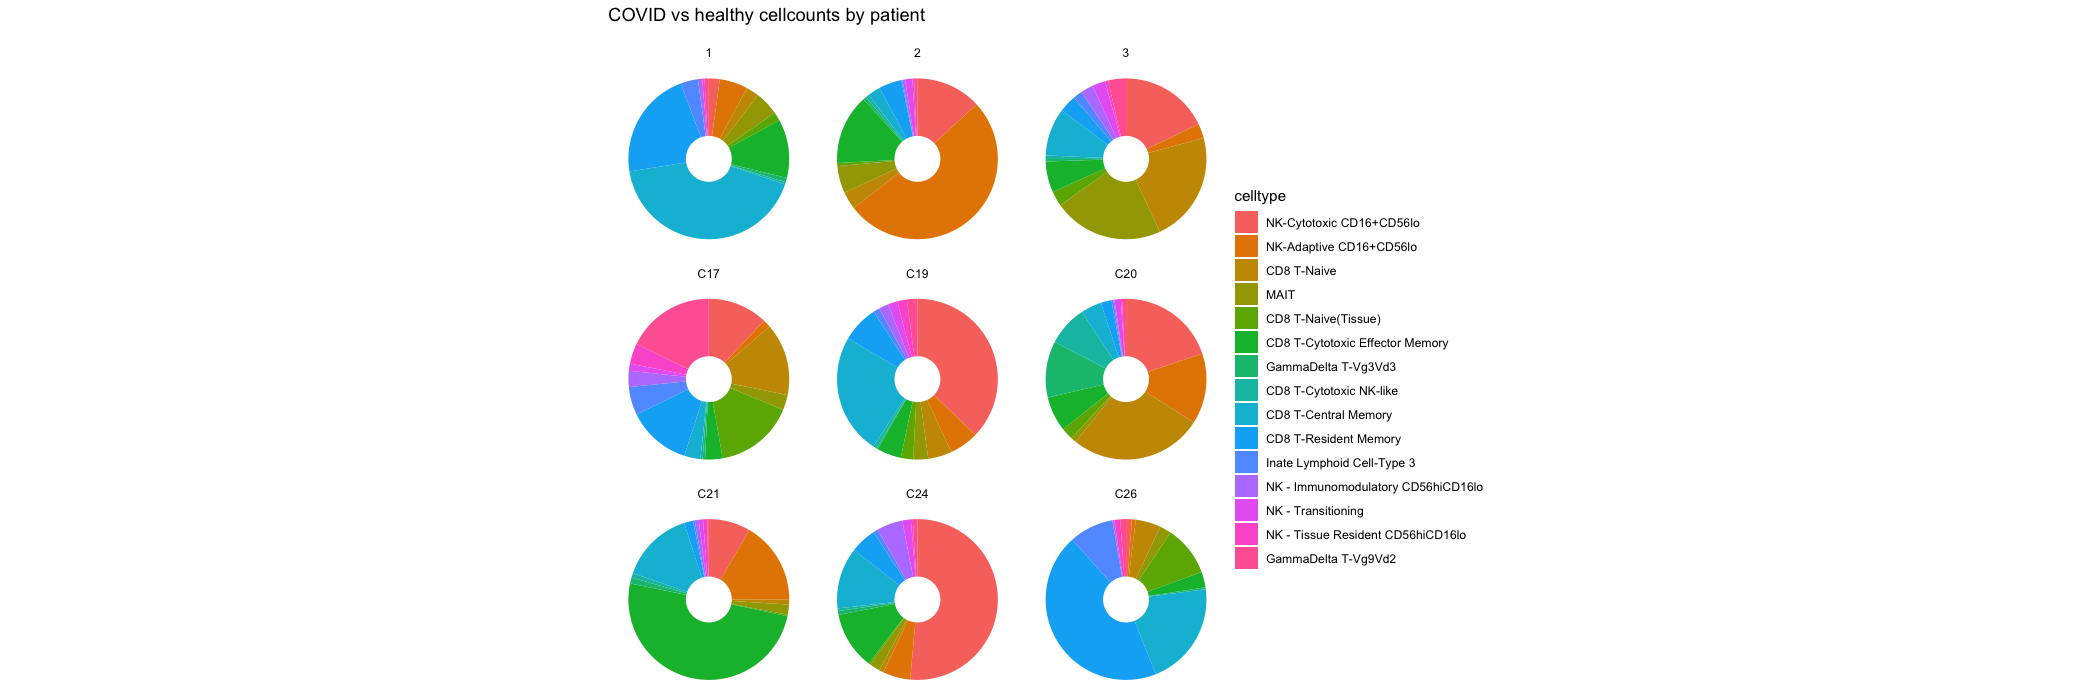

In [82]:

# Data for plot
pdatpt = covidpiechartdatapt %>% 
  group_by(patient) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatpt, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~patient) + ggtitle("COVID vs healthy cellcounts by patient", subtitle = "")

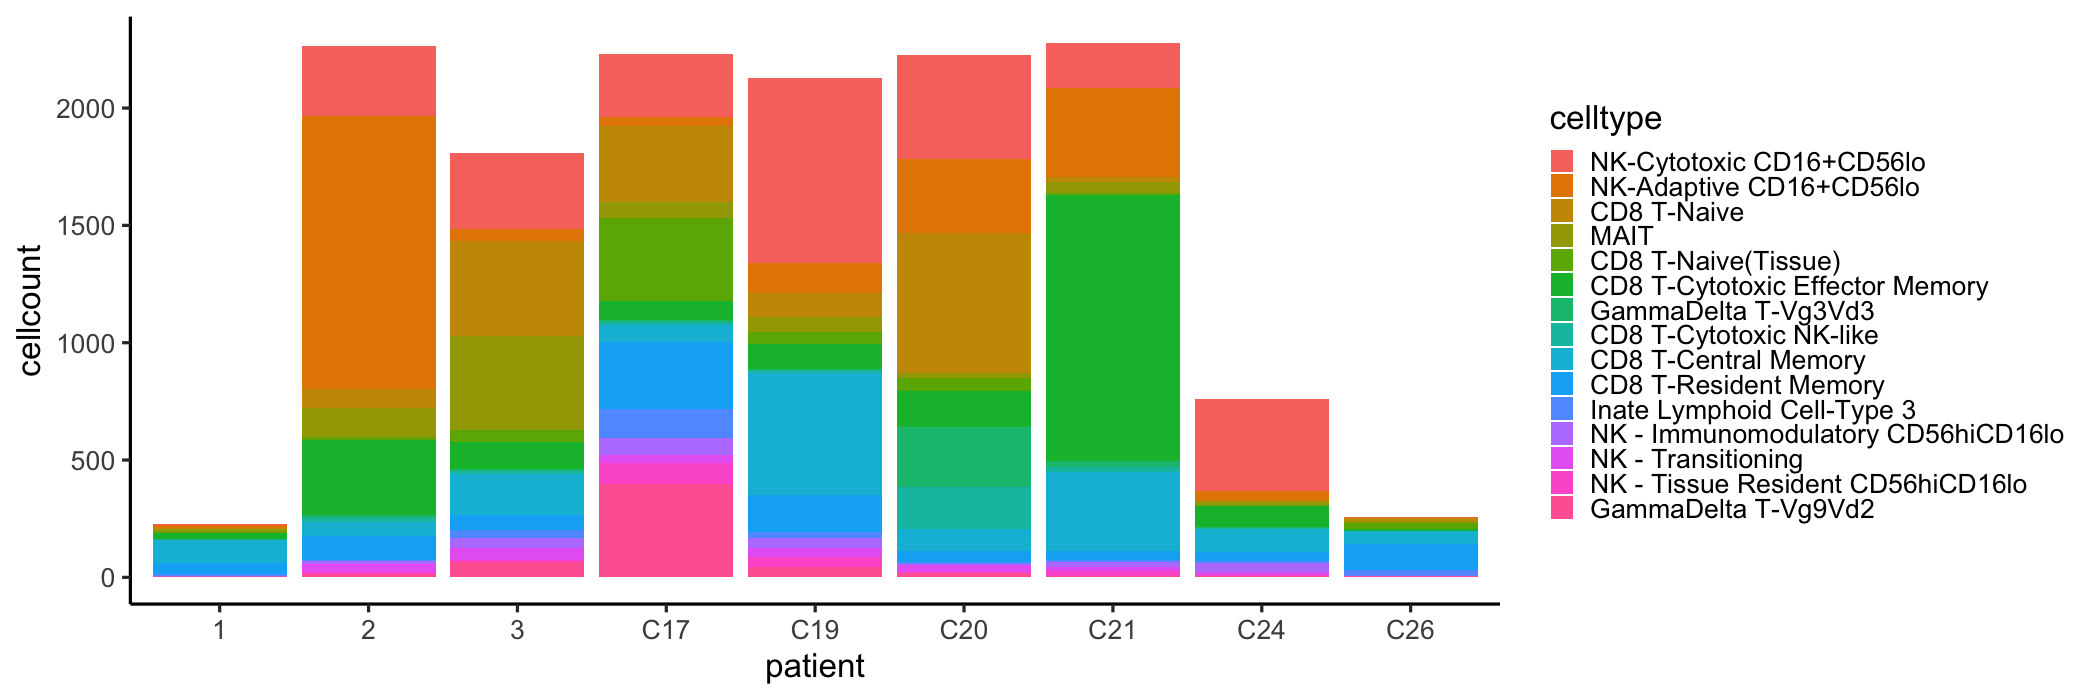

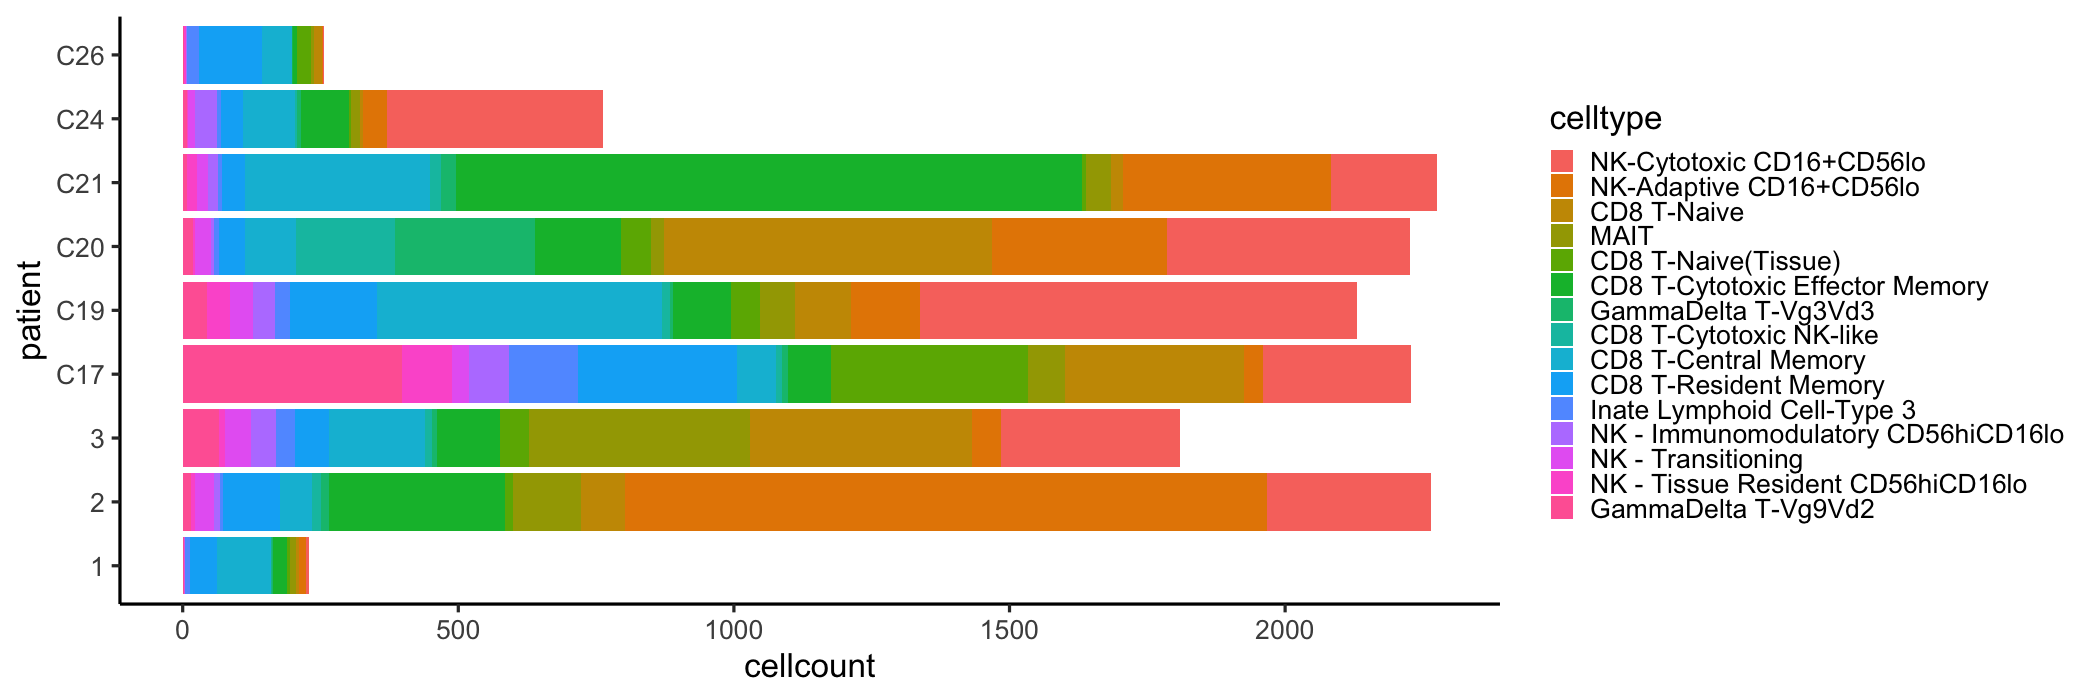

In [83]:

# Basic barplot
p<-ggplot(data=covidpiechartdatapt, aes(x=patient, y=cellcount, fill = celltype)) +
  geom_bar(stat="identity")
p
   
# Horizontal bar plot
p + coord_flip()

In [84]:
dataNK <- readRDS("data_finalNKsubsetannotations6.RDS")
dataNK

An object of class Seurat 
18504 features across 67873 samples within 1 assay 
Active assay: RNA (18504 features, 1000 variable features)
 2 dimensional reductions calculated: pca, umap

In [85]:
levels(Idents(dataNK))

[1] "CD16+ cNK"                              
[2] "Cytotoxic NKT-like"                     
[3] "CD16dimCD56brCD62Lbr signalling NK"     
[4] "CD16dimCD56dimCD62Lint tissue-homing NK"
[5] "Transitioning NK"                       
[6] "Dying cells"

In [86]:
covidpiechartdatank <- data.frame(table(Idents(dataNK), dataNK@meta.data$cohort))

In [87]:
covidpiechartdatank

Var1                                    Var2    Freq
1  CD16+ cNK                               COVID    690
2  Cytotoxic NKT-like                      COVID    967
3  CD16dimCD56brCD62Lbr signalling NK      COVID    149
4  CD16dimCD56dimCD62Lint tissue-homing NK COVID     58
5  Transitioning NK                        COVID    124
6  Dying cells                             COVID      0
7  CD16+ cNK                               Healthy 1968
8  Cytotoxic NKT-like                      Healthy  804
9  CD16dimCD56brCD62Lbr signalling NK      Healthy  261
10 CD16dimCD56dimCD62Lint tissue-homing NK Healthy  258
11 Transitioning NK                        Healthy  168
12 Dying cells                             Healthy    5

In [88]:
colnames(covidpiechartdatank) <- c("celltype", "category", "cellcount")

In [89]:
covidpiechartdatank

celltype                                category cellcount
1  CD16+ cNK                               COVID     690     
2  Cytotoxic NKT-like                      COVID     967     
3  CD16dimCD56brCD62Lbr signalling NK      COVID     149     
4  CD16dimCD56dimCD62Lint tissue-homing NK COVID      58     
5  Transitioning NK                        COVID     124     
6  Dying cells                             COVID       0     
7  CD16+ cNK                               Healthy  1968     
8  Cytotoxic NKT-like                      Healthy   804     
9  CD16dimCD56brCD62Lbr signalling NK      Healthy   261     
10 CD16dimCD56dimCD62Lint tissue-homing NK Healthy   258     
11 Transitioning NK                        Healthy   168     
12 Dying cells                             Healthy     5

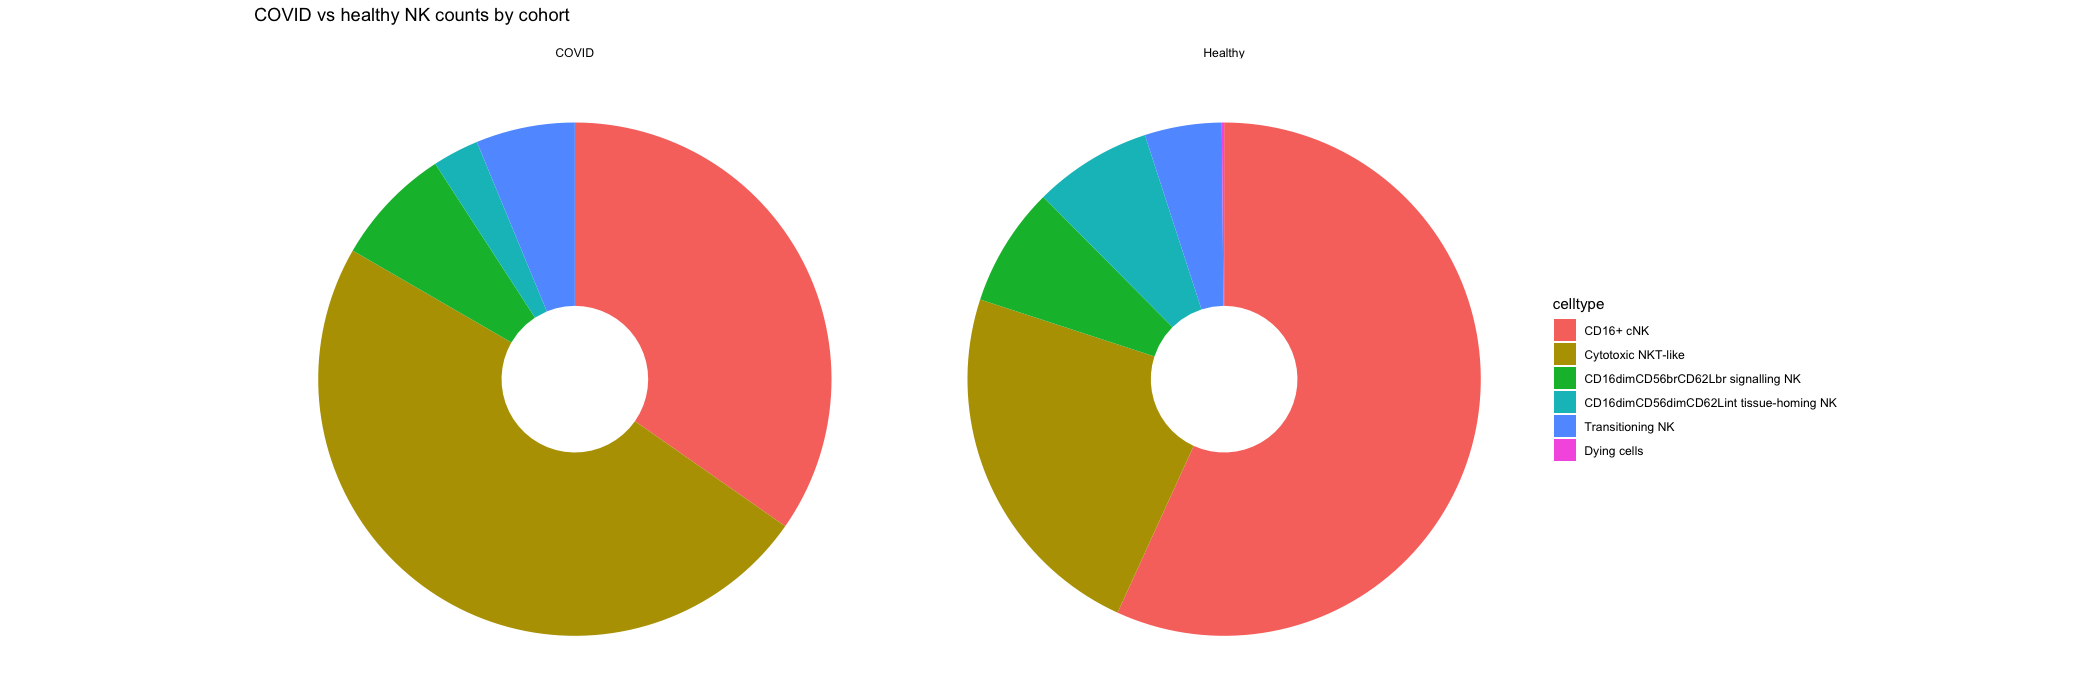

In [90]:

# Data for plot
pdatnk = covidpiechartdatank %>% 
  group_by(category) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatnk, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~category) + ggtitle("COVID vs healthy NK counts by cohort", subtitle = "")

In [91]:
covidpiechartdatankpt <- data.frame(table(Idents(dataNK), dataNK@meta.data$patient))

In [92]:
covidpiechartdatankpt

Var1                                    Var2 Freq
1  CD16+ cNK                               1      4 
2  Cytotoxic NKT-like                      1     13 
3  CD16dimCD56brCD62Lbr signalling NK      1      0 
4  CD16dimCD56dimCD62Lint tissue-homing NK 1      5 
5  Transitioning NK                        1      0 
6  Dying cells                             1      0 
7  CD16+ cNK                               2    435 
8  Cytotoxic NKT-like                      2    886 
9  CD16dimCD56brCD62Lbr signalling NK      2     52 
10 CD16dimCD56dimCD62Lint tissue-homing NK 2     36 
11 Transitioning NK                        2     51 
12 Dying cells                             2      0 
13 CD16+ cNK                               3    251 
14 Cytotoxic NKT-like                      3     68 
15 CD16dimCD56brCD62Lbr signalling NK      3     97 
16 CD16dimCD56dimCD62Lint tissue-homing NK 3     17 
17 Transitioning NK                        3     73 
18 Dying cells                             3      0 
19 CD16+ cNK                               C17  247 
20 Cytotoxic NKT-like                      C17   42 
21 CD16dimCD56brCD62Lbr signalling NK      C17   90 
22 CD16dimCD56dimCD62Lint tissue-homing NK C17  103 
23 Transitioning NK                        C17   19 
24 Dying cells                             C17    3 
25 CD16+ cNK                               C19  683 
26 Cytotoxic NKT-like                      C19  141 
27 CD16dimCD56brCD62Lbr signalling NK      C19   70 
28 CD16dimCD56dimCD62Lint tissue-homing NK C19   87 
29 Transitioning NK                        C19   70 
30 Dying cells                             C19    0 
31 CD16+ cNK                               C20  398 
32 Cytotoxic NKT-like                      C20  305 
33 CD16dimCD56brCD62Lbr signalling NK      C20   30 
34 CD16dimCD56dimCD62Lint tissue-homing NK C20   22 
35 Transitioning NK                        C20   50 
36 Dying cells                             C20    0 
37 CD16+ cNK                               C21  258 
38 Cytotoxic NKT-like                      C21  277 
39 CD16dimCD56brCD62Lbr signalling NK      C21   29 
40 CD16dimCD56dimCD62Lint tissue-homing NK C21   32 
41 Transitioning NK                        C21   11 
42 Dying cells                             C21    2 
43 CD16+ cNK                               C24  382 
44 Cytotoxic NKT-like                      C24   39 
45 CD16dimCD56brCD62Lbr signalling NK      C24   42 
46 CD16dimCD56dimCD62Lint tissue-homing NK C24   11 
47 Transitioning NK                        C24   18 
48 Dying cells                             C24    0 
49 CD16+ cNK                               C26    0 
50 Cytotoxic NKT-like                      C26    0 
51 CD16dimCD56brCD62Lbr signalling NK      C26    0 
52 CD16dimCD56dimCD62Lint tissue-homing NK C26    3 
53 Transitioning NK                        C26    0 
54 Dying cells                             C26    0

In [93]:
#covidpiechartdata$fraction <- covidpiechartdata$Freq / sum(covidpiechartdata$Freq)

In [94]:
#covidpiechartdata$ymax = cumsum(covidpiechartdata$fraction)

In [95]:
#covidpiechartdata$ymin <- c(0, head(covidpiechartdata$ymax, n=-1))

In [96]:
#piechartPerC <- covidpiechartdata$fraction

In [97]:
#piechartPerC$cluster <- rownames(covidpiechartdata)

In [98]:
#str(covidpiechartdata)

In [99]:
colnames(covidpiechartdatankpt) <- c("celltype", "patient", "cellcount")

In [100]:
covidpiechartdatankpt

celltype                                patient cellcount
1  CD16+ cNK                               1         4      
2  Cytotoxic NKT-like                      1        13      
3  CD16dimCD56brCD62Lbr signalling NK      1         0      
4  CD16dimCD56dimCD62Lint tissue-homing NK 1         5      
5  Transitioning NK                        1         0      
6  Dying cells                             1         0      
7  CD16+ cNK                               2       435      
8  Cytotoxic NKT-like                      2       886      
9  CD16dimCD56brCD62Lbr signalling NK      2        52      
10 CD16dimCD56dimCD62Lint tissue-homing NK 2        36      
11 Transitioning NK                        2        51      
12 Dying cells                             2         0      
13 CD16+ cNK                               3       251      
14 Cytotoxic NKT-like                      3        68      
15 CD16dimCD56brCD62Lbr signalling NK      3        97      
16 CD16dimCD56dimCD62Lint tissue-homing NK 3        17      
17 Transitioning NK                        3        73      
18 Dying cells                             3         0      
19 CD16+ cNK                               C17     247      
20 Cytotoxic NKT-like                      C17      42      
21 CD16dimCD56brCD62Lbr signalling NK      C17      90      
22 CD16dimCD56dimCD62Lint tissue-homing NK C17     103      
23 Transitioning NK                        C17      19      
24 Dying cells                             C17       3      
25 CD16+ cNK                               C19     683      
26 Cytotoxic NKT-like                      C19     141      
27 CD16dimCD56brCD62Lbr signalling NK      C19      70      
28 CD16dimCD56dimCD62Lint tissue-homing NK C19      87      
29 Transitioning NK                        C19      70      
30 Dying cells                             C19       0      
31 CD16+ cNK                               C20     398      
32 Cytotoxic NKT-like                      C20     305      
33 CD16dimCD56brCD62Lbr signalling NK      C20      30      
34 CD16dimCD56dimCD62Lint tissue-homing NK C20      22      
35 Transitioning NK                        C20      50      
36 Dying cells                             C20       0      
37 CD16+ cNK                               C21     258      
38 Cytotoxic NKT-like                      C21     277      
39 CD16dimCD56brCD62Lbr signalling NK      C21      29      
40 CD16dimCD56dimCD62Lint tissue-homing NK C21      32      
41 Transitioning NK                        C21      11      
42 Dying cells                             C21       2      
43 CD16+ cNK                               C24     382      
44 Cytotoxic NKT-like                      C24      39      
45 CD16dimCD56brCD62Lbr signalling NK      C24      42      
46 CD16dimCD56dimCD62Lint tissue-homing NK C24      11      
47 Transitioning NK                        C24      18      
48 Dying cells                             C24       0      
49 CD16+ cNK                               C26       0      
50 Cytotoxic NKT-like                      C26       0      
51 CD16dimCD56brCD62Lbr signalling NK      C26       0      
52 CD16dimCD56dimCD62Lint tissue-homing NK C26       3      
53 Transitioning NK                        C26       0      
54 Dying cells                             C26       0

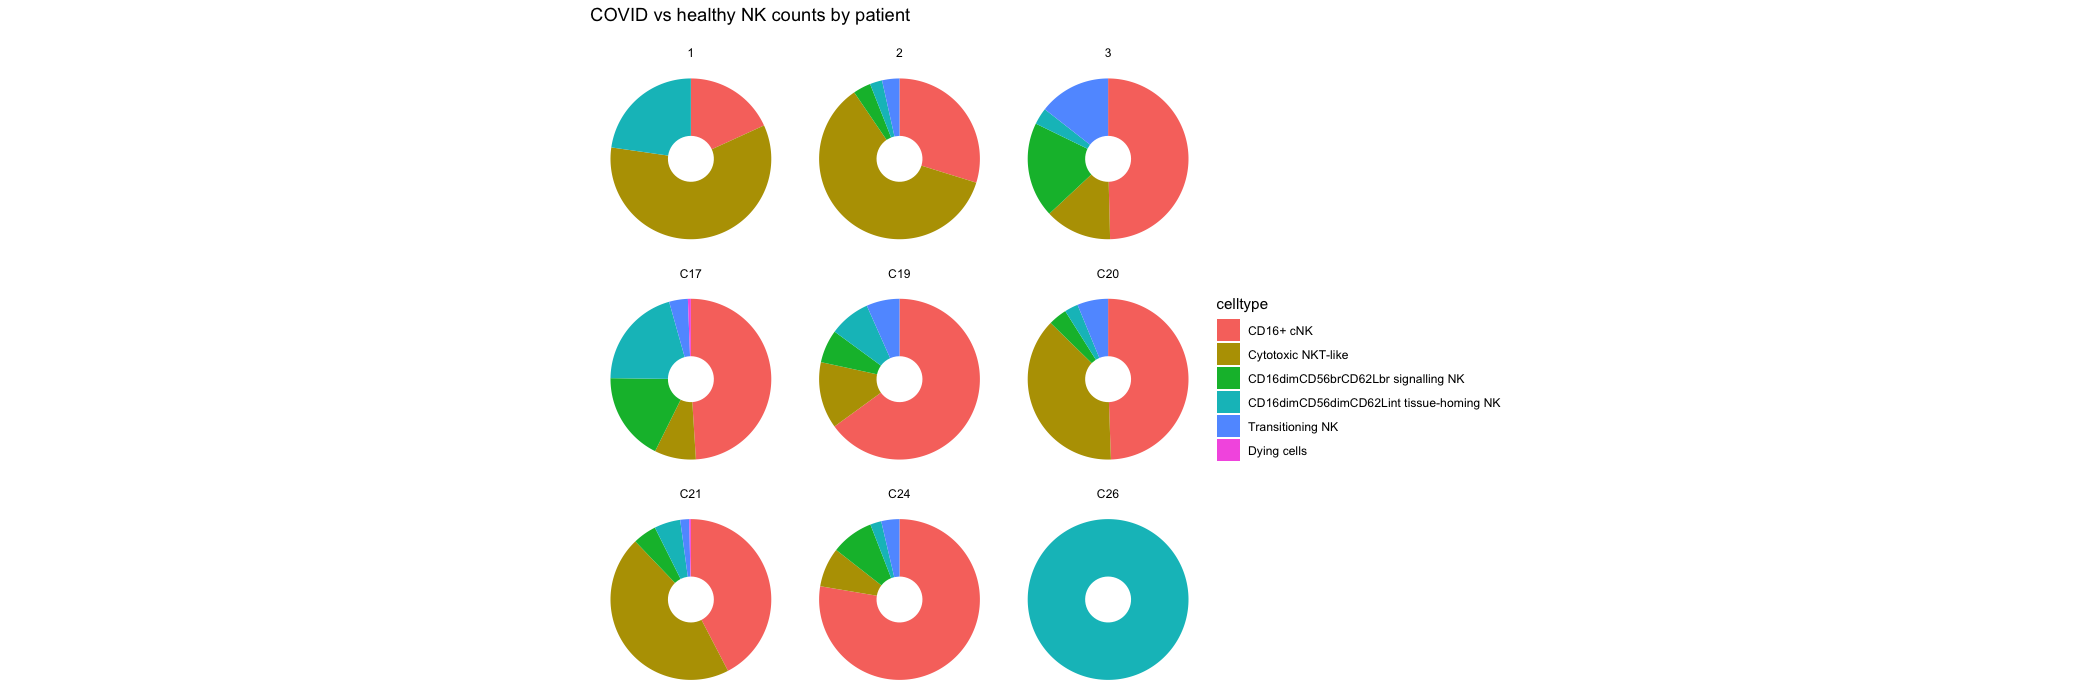

In [101]:

# Data for plot
pdatnkpt = covidpiechartdatankpt %>% 
  group_by(patient) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatnkpt, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~patient) + ggtitle("COVID vs healthy NK counts by patient", subtitle = "")

In [102]:
library(viridis)
library(RColorBrewer)

Loading required package: viridisLite



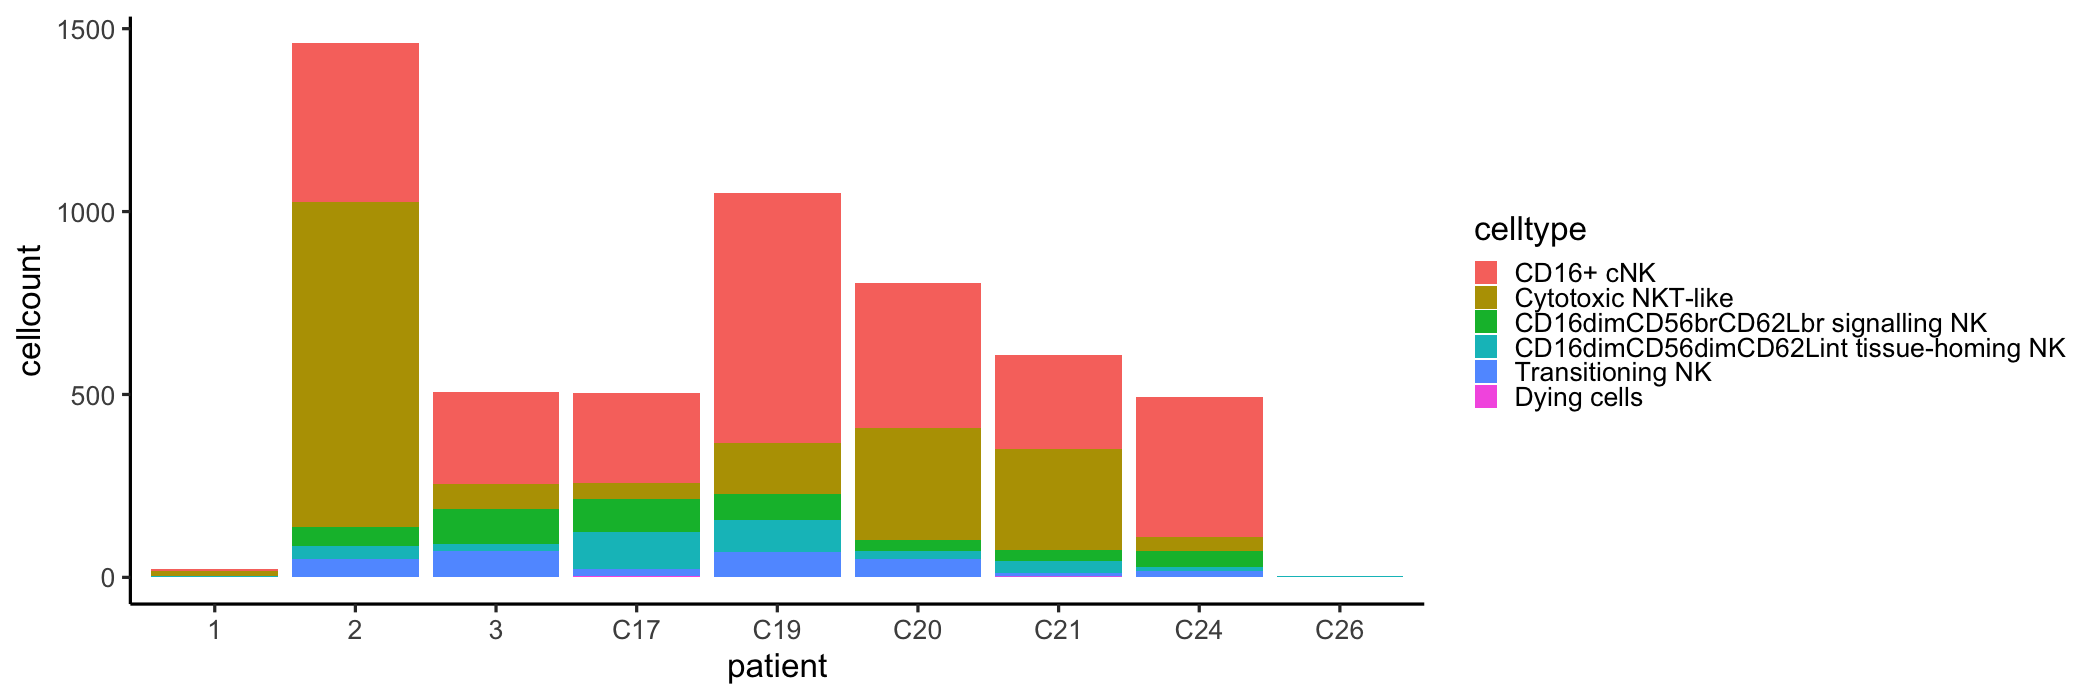

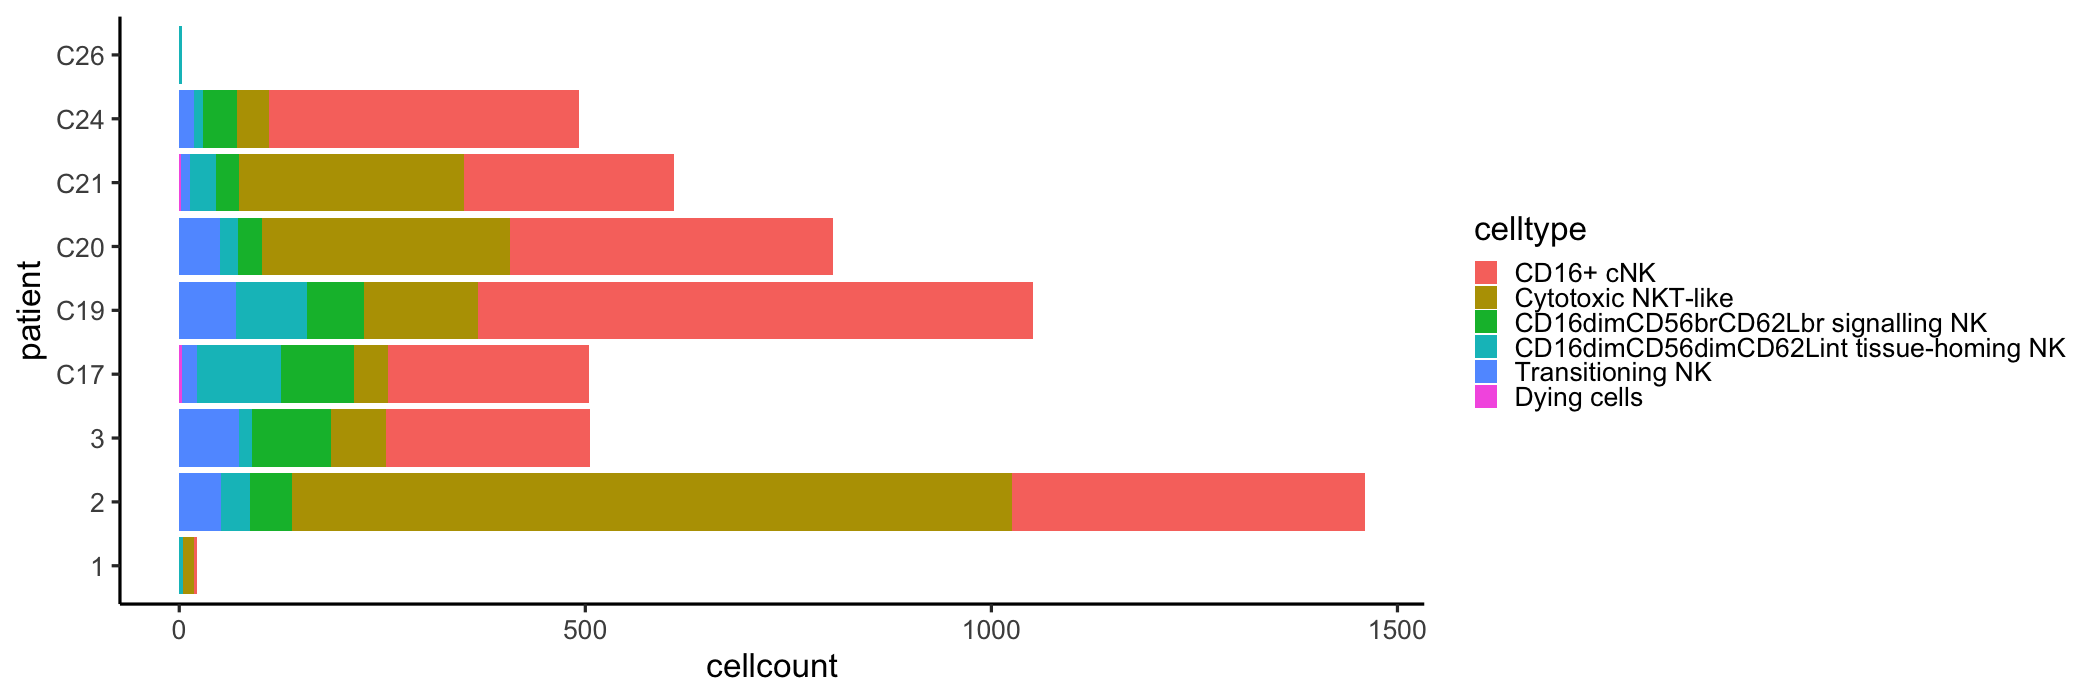

In [103]:

# Basic barplot
p<-ggplot(data=covidpiechartdatankpt, aes(x=patient, y=cellcount, fill = celltype)) +
  geom_bar(stat="identity") 
p 
        
   
# Horizontal bar plot
p + coord_flip()

In [104]:
Idents(dataNK) <- dataNK@meta.data$subset_annotations3

In [105]:
covidpiechartdataSS3 <- data.frame(table(Idents(dataNK), dataNK@meta.data$patient))

In [106]:
colnames(covidpiechartdataSS3) <- c("celltype", "patient", "cellcount")

In [107]:
covidpiechartdataSS3

celltype                  patient cellcount
1   CD16+CD56dimCX3CR1hi cNK  1         6      
2   CD16+CD56dim gNK          1        11      
3   CD16+CD56dim cNK          1         2      
4   CD8 Tn                    1         4      
5   MAIT cell                 1        12      
6   Tissue homing CD8 Tn      1         1      
7   CD8 cT                    1        14      
8   NKT-like CD8 cT           1         2      
9   HLADR+ CD8 cT             1        11      
10  Vd3gdT                    1         5      
11  CD8 Trm                   1        41      
12  CCL4+CD8 Tem              1        55      
13  CD8 Tem                   1        51      
14  CD16dimCD56dimCD62Lint NK 1         0      
15  CD16negCD56brCD62Lbr NK   1         0      
16  CD16negCD56intCD62Lint NK 1         3      
17  dV2gV9 gdT cell           1         7      
18  CD16+CD56dimCX3CR1hi cNK  2       349      
19  CD16+CD56dim gNK          2       646      
20  CD16+CD56dim cNK          2       512      
21  CD8 Tn                    2        80      
22  MAIT cell                 2       121      
23  Tissue homing CD8 Tn      2        11      
24  CD8 cT                    2       161      
25  NKT-like CD8 cT           2        48      
26  HLADR+ CD8 cT             2       110      
27  Vd3gdT                    2        38      
28  CD8 Trm                   2        99      
29  CCL4+CD8 Tem              2        15      
30  CD8 Tem                   2        58      
⋮   ⋮                         ⋮       ⋮        
124 MAIT cell                 C24      15      
125 Tissue homing CD8 Tn      C24       4      
126 CD8 cT                    C24      54      
127 NKT-like CD8 cT           C24      16      
128 HLADR+ CD8 cT             C24      11      
129 Vd3gdT                    C24      14      
130 CD8 Trm                   C24      28      
131 CCL4+CD8 Tem              C24      53      
132 CD8 Tem                   C24      51      
133 CD16dimCD56dimCD62Lint NK C24      16      
134 CD16negCD56brCD62Lbr NK   C24      47      
135 CD16negCD56intCD62Lint NK C24       4      
136 dV2gV9 gdT cell           C24      21      
137 CD16+CD56dimCX3CR1hi cNK  C26       4      
138 CD16+CD56dim gNK          C26       3      
139 CD16+CD56dim cNK          C26       1      
140 CD8 Tn                    C26      13      
141 MAIT cell                 C26       7      
142 Tissue homing CD8 Tn      C26      22      
143 CD8 cT                    C26       3      
144 NKT-like CD8 cT           C26       0      
145 HLADR+ CD8 cT             C26       3      
146 Vd3gdT                    C26       1      
147 CD8 Trm                   C26     113      
148 CCL4+CD8 Tem              C26      41      
149 CD8 Tem                   C26      12      
150 CD16dimCD56dimCD62Lint NK C26       0      
151 CD16negCD56brCD62Lbr NK   C26       0      
152 CD16negCD56intCD62Lint NK C26       4      
153 dV2gV9 gdT cell           C26       5

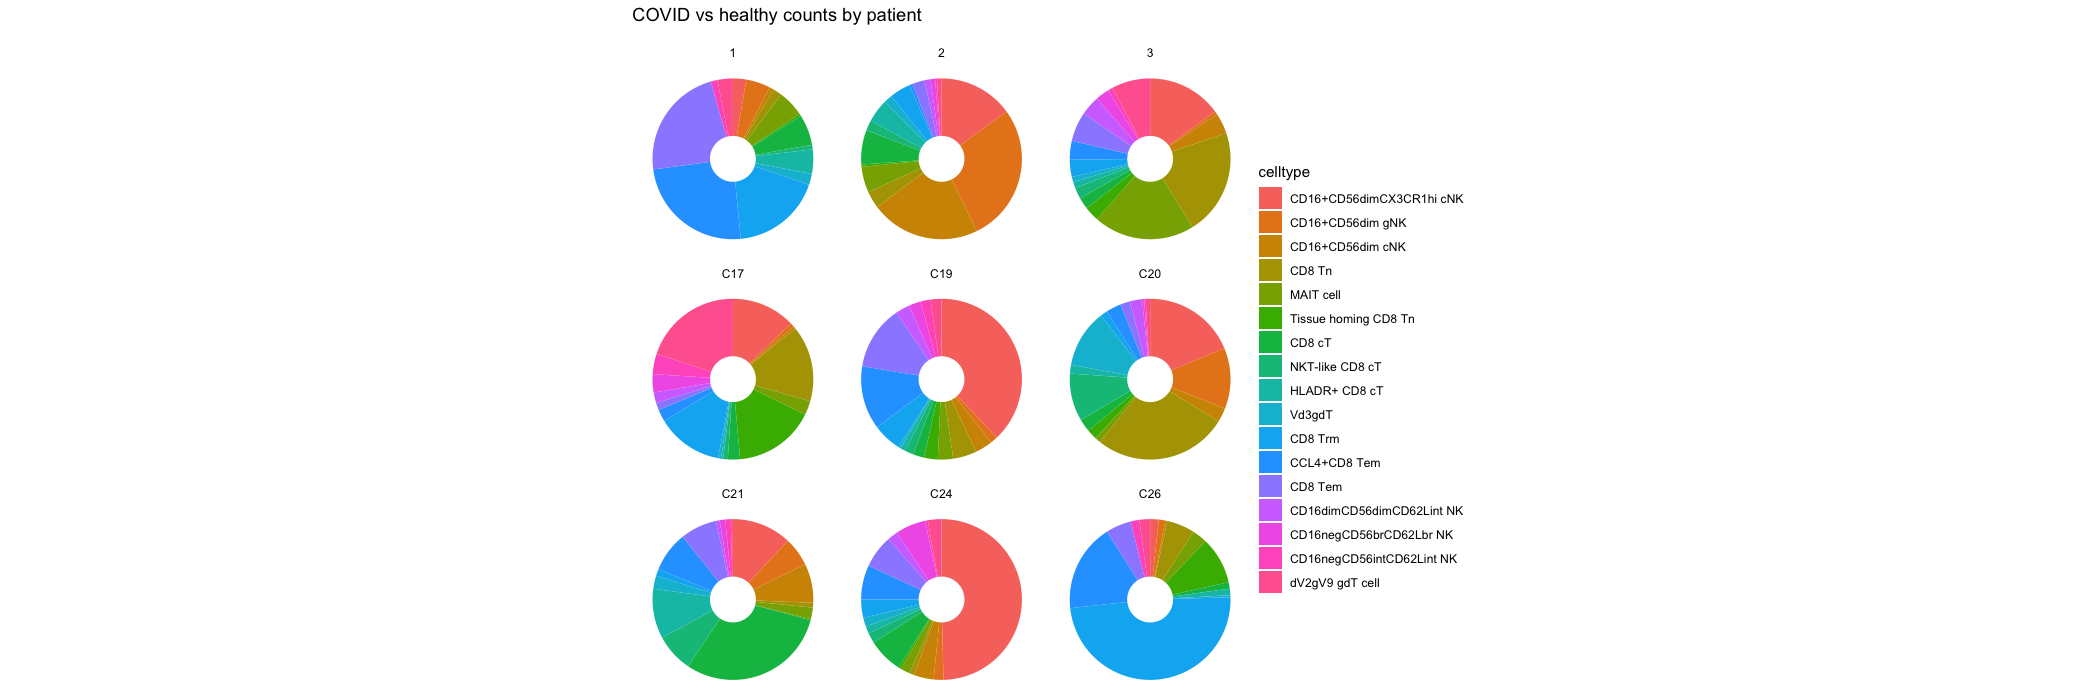

In [108]:

# Data for plot
pdatSS3 = covidpiechartdataSS3 %>% 
  group_by(patient) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatSS3, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~patient) + ggtitle("COVID vs healthy counts by patient", subtitle = "")

In [109]:
covidpiechartdataSS3ct <- data.frame(table(Idents(dataNK), dataNK@meta.data$cohort))

In [110]:
covidpiechartdataSS3ct

Var1                      Var2    Freq
1  CD16+CD56dimCX3CR1hi cNK  COVID    638
2  CD16+CD56dim gNK          COVID    670
3  CD16+CD56dim cNK          COVID    592
4  CD8 Tn                    COVID    486
5  MAIT cell                 COVID    518
6  Tissue homing CD8 Tn      COVID     68
7  CD8 cT                    COVID    219
8  NKT-like CD8 cT           COVID     92
9  HLADR+ CD8 cT             COVID    145
10 Vd3gdT                    COVID     63
11 CD8 Trm                   COVID    205
12 CCL4+CD8 Tem              COVID    141
13 CD8 Tem                   COVID    221
14 CD16dimCD56dimCD62Lint NK COVID    102
15 CD16negCD56brCD62Lbr NK   COVID     74
16 CD16negCD56intCD62Lint NK COVID     30
17 dV2gV9 gdT cell           COVID    175
18 CD16+CD56dimCX3CR1hi cNK  Healthy 2162
19 CD16+CD56dim gNK          Healthy  474
20 CD16+CD56dim cNK          Healthy  361
21 CD8 Tn                    Healthy 1070
22 MAIT cell                 Healthy  228
23 Tissue homing CD8 Tn      Healthy  481
24 CD8 cT                    Healthy  908
25 NKT-like CD8 cT           Healthy  464
26 HLADR+ CD8 cT             Healthy  313
27 Vd3gdT                    Healthy  358
28 CD8 Trm                   Healthy  613
29 CCL4+CD8 Tem              Healthy  673
30 CD8 Tem                   Healthy  582
31 CD16dimCD56dimCD62Lint NK Healthy  195
32 CD16negCD56brCD62Lbr NK   Healthy  211
33 CD16negCD56intCD62Lint NK Healthy  170
34 dV2gV9 gdT cell           Healthy  526

In [111]:
#covidpiechartdata$fraction <- covidpiechartdata$Freq / sum(covidpiechartdata$Freq)

In [112]:
#covidpiechartdata$ymax = cumsum(covidpiechartdata$fraction)

In [113]:
#covidpiechartdata$ymin <- c(0, head(covidpiechartdata$ymax, n=-1))

In [114]:
#piechartPerC <- covidpiechartdata$fraction

In [115]:
#piechartPerC$cluster <- rownames(covidpiechartdata)

In [116]:
#str(covidpiechartdata)

In [117]:
colnames(covidpiechartdataSS3ct) <- c("celltype", "cohort", "cellcount")

In [118]:
covidpiechartdataSS3ct

celltype                  cohort  cellcount
1  CD16+CD56dimCX3CR1hi cNK  COVID    638     
2  CD16+CD56dim gNK          COVID    670     
3  CD16+CD56dim cNK          COVID    592     
4  CD8 Tn                    COVID    486     
5  MAIT cell                 COVID    518     
6  Tissue homing CD8 Tn      COVID     68     
7  CD8 cT                    COVID    219     
8  NKT-like CD8 cT           COVID     92     
9  HLADR+ CD8 cT             COVID    145     
10 Vd3gdT                    COVID     63     
11 CD8 Trm                   COVID    205     
12 CCL4+CD8 Tem              COVID    141     
13 CD8 Tem                   COVID    221     
14 CD16dimCD56dimCD62Lint NK COVID    102     
15 CD16negCD56brCD62Lbr NK   COVID     74     
16 CD16negCD56intCD62Lint NK COVID     30     
17 dV2gV9 gdT cell           COVID    175     
18 CD16+CD56dimCX3CR1hi cNK  Healthy 2162     
19 CD16+CD56dim gNK          Healthy  474     
20 CD16+CD56dim cNK          Healthy  361     
21 CD8 Tn                    Healthy 1070     
22 MAIT cell                 Healthy  228     
23 Tissue homing CD8 Tn      Healthy  481     
24 CD8 cT                    Healthy  908     
25 NKT-like CD8 cT           Healthy  464     
26 HLADR+ CD8 cT             Healthy  313     
27 Vd3gdT                    Healthy  358     
28 CD8 Trm                   Healthy  613     
29 CCL4+CD8 Tem              Healthy  673     
30 CD8 Tem                   Healthy  582     
31 CD16dimCD56dimCD62Lint NK Healthy  195     
32 CD16negCD56brCD62Lbr NK   Healthy  211     
33 CD16negCD56intCD62Lint NK Healthy  170     
34 dV2gV9 gdT cell           Healthy  526

In [119]:
sum(covidpiechartdataSS3$cellcount)

[1] 14228

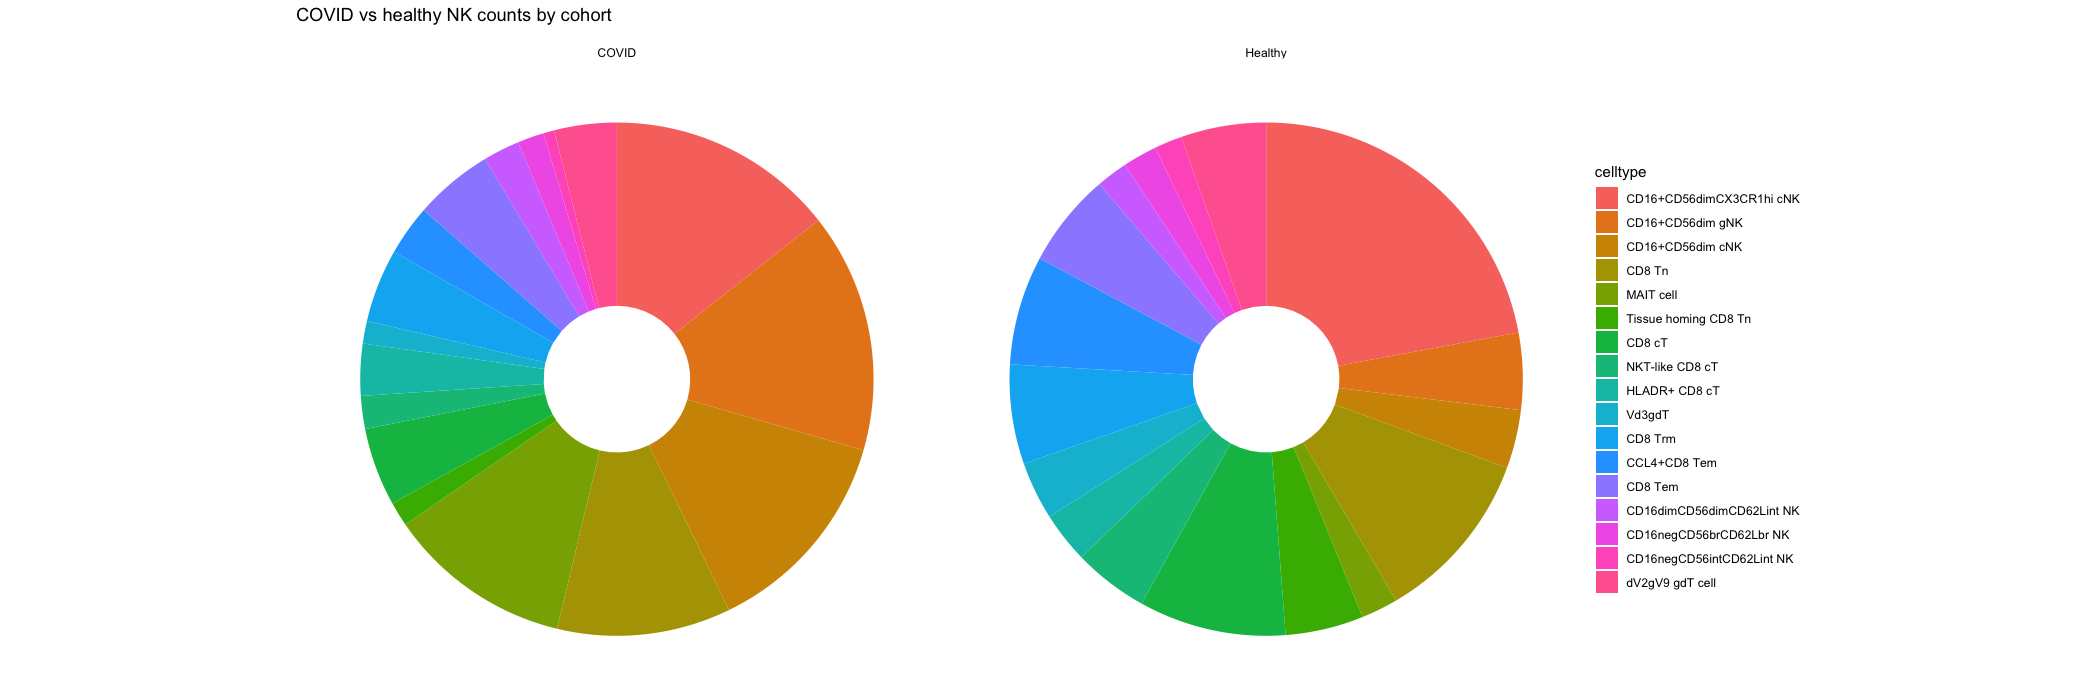

In [120]:

# Data for plot
pdatSS3ct = covidpiechartdataSS3ct %>% 
  group_by(cohort) %>% 
  mutate(cc = cellcount/sum(cellcount)) %>% 
  arrange(celltype) %>% 
  # Get cumulative value of cc
  mutate(cc_cum = cumsum(cc) - 0.5*cc) %>% 
  ungroup

ggplot(pdatSS3ct, aes(x=cc_cum, y=1, fill=celltype)) +
  geom_tile(aes(width=cc), size=0.4) +
  coord_polar() + ylim(0.1,1.5) +
  theme_void() + facet_wrap(~cohort) + ggtitle("COVID vs healthy NK counts by cohort", subtitle = "")

In [121]:
library(viridis)
library(RColorBrewer)

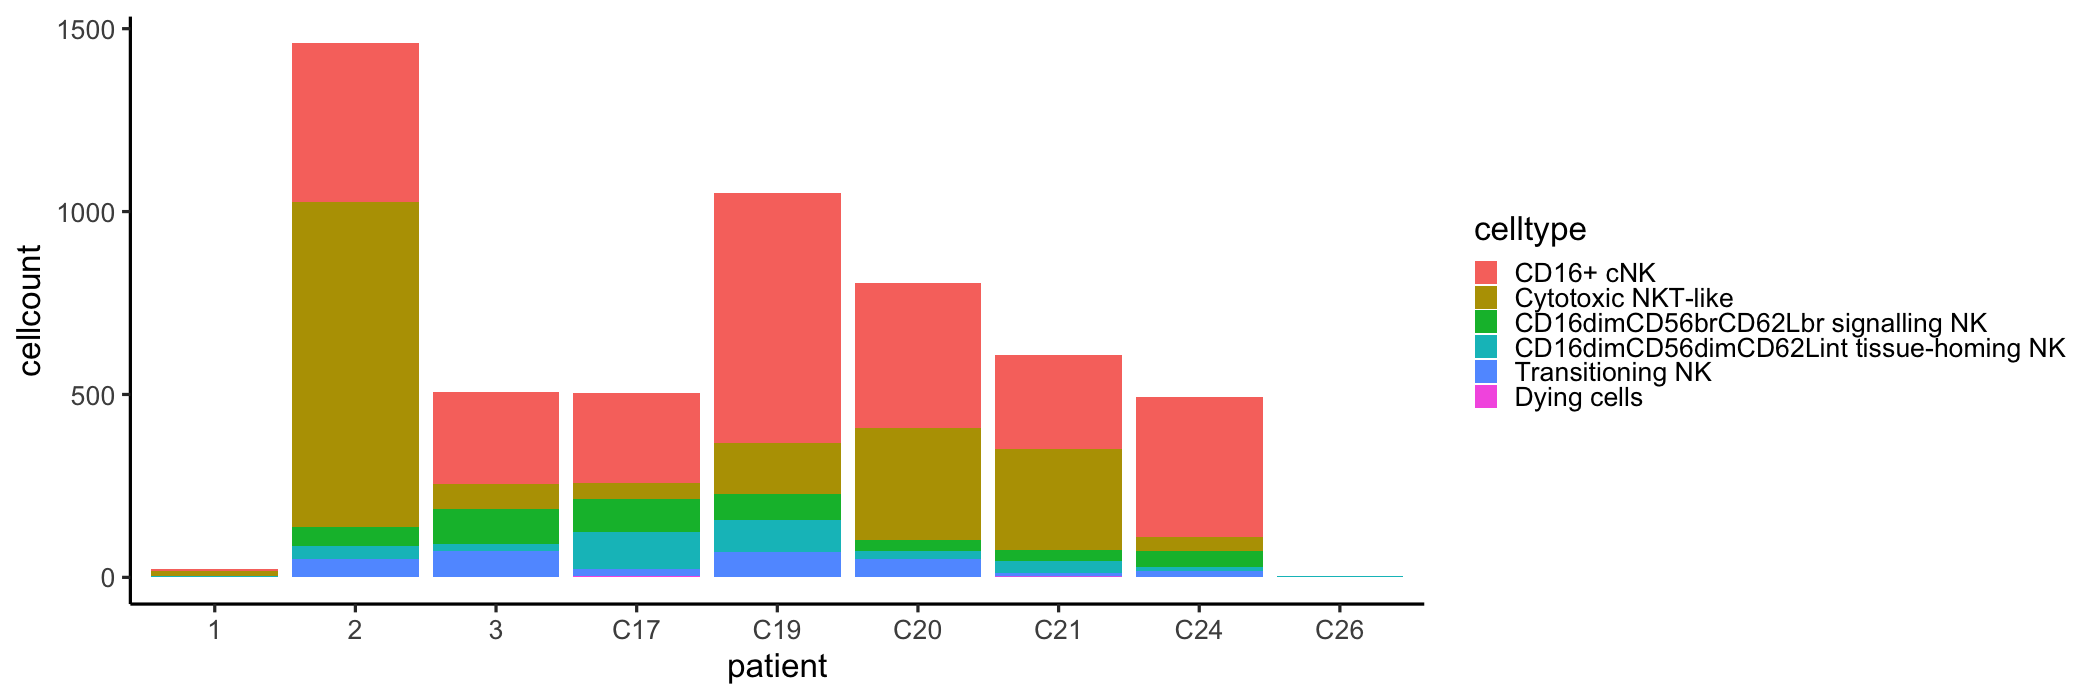

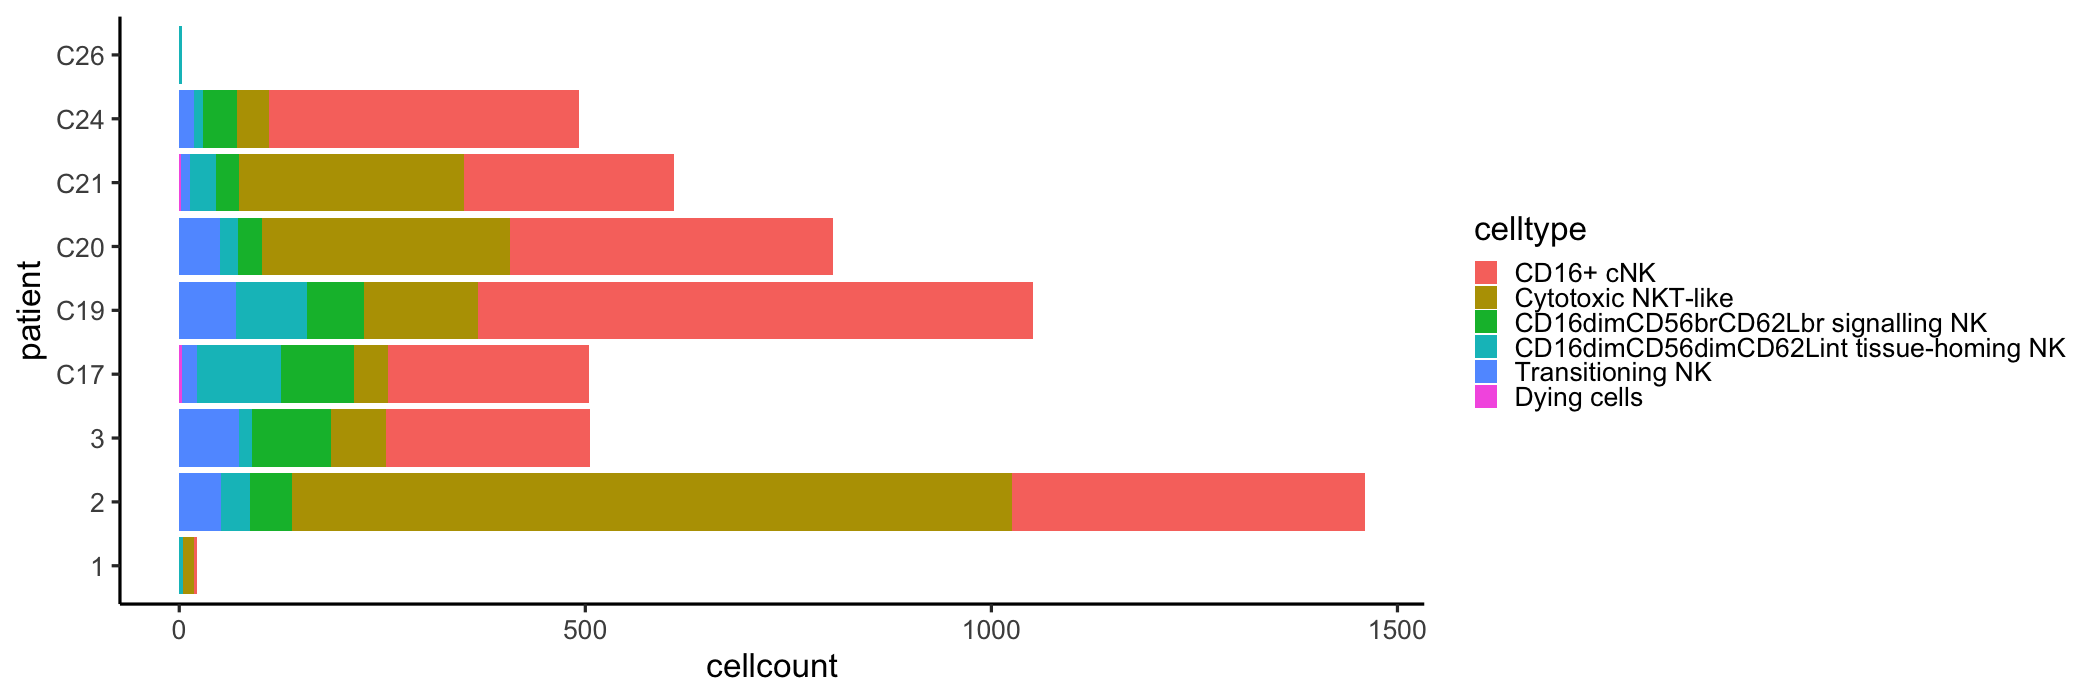

In [122]:

# Basic barplot
p<-ggplot(data=covidpiechartdatankpt, aes(x=patient, y=cellcount, fill = celltype)) +
  geom_bar(stat="identity") 
p 
        
   
# Horizontal bar plot
p + coord_flip()